# **Desafio Final - Bullying**

Turma 7 | Data Analytics <br>
Squad Katherine Johnson

**Integrantes:**

-   Dayna Lilian Figueiredo
-   Fernanda Soares Lima
-   Gabriela Pontes Crespo
-   Maria Elisa Scovino da Silva
-   Nadia Bertoldo Germano dos Santos
-   Nathália Macedo

---

## **Sobre o conjunto de dados**

O Global School-Based Student Health Survey (GSHS) é uma pesquisa escolar que usa um questionário autoaplicável para obter dados sobre o comportamento de saúde dos jovens e fatores de proteção relacionados às principais causas de morbidade e mortalidade.

A pesquisa foi realizada na Argentina em 2018. Um total de 56.981 alunos participaram.

A taxa de resposta da escola foi de 86%, a taxa de resposta do aluno foi de 74% e a taxa de resposta geral foi de 63%.

### **Sobre o desenvolvimento de um modelo de previsão de bullying**

A partir do GHSH, foram selecionadas as perguntas da pesquisa relacionadas ao bullying. Isto com o objetivo de desenvolver um modelo que permita preveni-la.

Alguns dos indicadores de bullying têm sido relacionados a sentimentos de solidão, falta de amigos íntimos, má comunicação com os pais, ausência nas aulas. (por exemplo, Nansel et al. Comportamentos de bullying entre jovens americanos: Prevalência e associação com ajustamento psicossocial). Da mesma forma, jovens identificados por agressores como abaixo do peso, acima do peso e obesos foram vítimas de bullying.

A base de dados contém as seguintes informações:

    • record: código identificador
    • Bullied_on_school_property_in_past_12_months: Sofreu bullying na propriedade da escola nos últimos 12 meses
    • Bullied_not_on_school_property_in_past_12_months: sofreu bullying fora da propriedade da escola nos últimos 12_meses
    • Cyber_bullied_in_past_12_months: Cyberbullying nos últimos 12 meses
    • Custom_Age: Idade
    • Sex: Sexo
    • Physically_attacked: Ataque físico
    • Physical_fighting: Briga Física
    • Felt_lonely: Sentiu-se sozinho
    • Close_friends: Amigos próximos
    • Miss_school_no_permission: Faltam à escola sem permissão
    • Other_students_kind_and_helpful: Outros alunos gentis e prestativos
    • Parents_understand_problems: Os pais entendem os problemas
    • Most_of_the_time_or_always_felt_lonely: Na maioria das vezes ou sempre se sentiu sozinho
    • Missed_classes_or_school_without_permission: Perdeu aulas ou escola sem permissão
    • Were_underweight: Estava abaixo do peso
    • Were_overweight: Estava acima do peso
    • Were_obese: Estava obeso

---

## **Etapas da análise de dados**

A análise da base de bullying foi desenvolvida com os seguintes focos:

### **0 - Tratamento da Base**
- **Limpeza e Tratamento de Nulos**:  
  Devido à quantidade e relevância dos valores nulos nas últimas três colunas, foram criados três modelos diferentes de datasets para fins de análise de diferentes cenários:
  - `df_final`
  - `df_removendo_nulos`
  - `df_categoricos`

  *Consulte o changelog na seção 'recursos importantes' para mais detalhes sobre cada dataset.*

### **1 - Análise dos Dados**
- **Matriz de Correlação**:  
  Cálculo da matriz de correlação para identificar variáveis com relações mais fortes e mais fracas.
- **Análise Exploratória**:  
  - Análise de dados categóricos com visualizações.  
  - Moda de cada variável.
  - Teste Qui-Quadrado para avaliar a análise de correspondência.  
- **Visualizações Gráficas**:  
  Geração de histogramas e boxplots para cada tipo de bullying, separados por gênero e idade.

### **2 - Modelo de Regressão Logística**
- **Construção do Modelo**:  
  Modelo desenvolvido para prever a probabilidade de um indivíduo sofrer bullying na escola. A variável target foi definida como:  
  `Bullied_on_school_property_in_past_12_months`  
  (1 caso o indivíduo tenha sofrido bullying nos últimos 12 meses; 0 caso contrário).
- **Análise de Variáveis Relevantes**:  
  Identificação das variáveis mais impactantes no modelo.
- **Avaliação do Modelo**:  
  Avaliação de desempenho com métricas como:
  - Acurácia  
  - Precisão  
  - Recall  
  - Matriz de confusão (visualização do resultado).

---

## **Recursos Importantes**
Abaixo estão os links para recursos que podem ajudar a entender e acompanhar os progressos realizados durante o desafio:

**Changelog do Código:** Para verificar as alterações das variáveis e a explicação acerca dos datasets gerados ao longo do código, acesse o changelog detalhado aqui: [Changelog do Código.](https://drive.google.com/file/d/11COQhYQZGa8WNYSn6jlRbhkw389pcRIV/view)

**Dashboard do Power BI:** Para explorar o dashboard interativo criado no Power BI, que apresenta visualizações e insights obtidos a partir dos dados analisados: [Dashboard do Power BI disponível no Github.](https://github.com/limasfernanda/desafio_final_bullying_WMC)

Esses recursos são essenciais para entender as etapas do processo e visualizar os resultados obtidos.

# ✔️ 0 - Tratamento da Base


- Análise exploratória

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

In [ ]:
df_bullying=pd.read_csv('Bullying_2018.csv',sep=';')
df_bullying.head()

record Bullied_on_school_property_in_past_12_months  \
0       1                                          Yes   
1       2                                           No   
2       3                                           No   
3       4                                           No   
4       5                                           No   

  Bullied_not_on_school_property_in_past_12_months  \
0                                              Yes   
1                                               No   
2                                               No   
3                                               No   
4                                               No   

  Cyber_bullied_in_past_12_months    Custom_Age     Sex Physically_attacked  \
0                                  13 years old  Female             0 times   
1                              No  13 years old  Female             0 times   
2                              No  14 years old    Male             0 times   
3                              No  16 years old    Male             0 times   
4                              No  13 years old  Female             0 times   

  Physical_fighting Felt_lonely Close_friends Miss_school_no_permission  \
0           0 times      Always             2           10 or more days   
1           0 times       Never     3 or more                    0 days   
2           0 times       Never     3 or more                    0 days   
3      2 or 3 times       Never     3 or more                    0 days   
4           0 times      Rarely     3 or more                    0 days   

  Other_students_kind_and_helpful Parents_understand_problems  \
0                           Never                      Always   
1                       Sometimes                      Always   
2                       Sometimes                      Always   
3                       Sometimes                               
4                Most of the time            Most of the time   

  Most_of_the_time_or_always_felt_lonely  \
0                                    Yes   
1                                     No   
2                                     No   
3                                     No   
4                                     No   

  Missed_classes_or_school_without_permission Were_underweight  \
0                                         Yes                    
1                                          No                    
2                                          No               No   
3                                          No               No   
4                                          No                    

  Were_overweight Were_obese  
0                             
1                             
2              No         No  
3              No         No  
4

In [ ]:
datadict = pd.DataFrame(df_bullying.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = df_bullying.isnull().sum()
datadict['%_Valores_Nulos'] = (df_bullying.isnull().sum() / df_bullying.shape[0]) * 100
datadict['NUnique']=df_bullying.nunique()
#datadict

## Removendo os espaços brancos pra virarem nulos

In [ ]:
df_bullying = df_bullying.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Substituindo células vazias (após a limpeza) por NaN
df_bullying.replace('', pd.NA, inplace=True)

# Agora você pode verificar novamente os valores nulos
#print(df_bullying.isnull().sum())

In [ ]:
datadict = pd.DataFrame(df_bullying.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = df_bullying.isnull().sum()
datadict['%_Valores_Nulos'] = (df_bullying.isnull().sum() / df_bullying.shape[0]) * 100
datadict['NUnique']=df_bullying.nunique()
datadict

Dtype  Valores_Nulos  \
record                                             int64              0   
Bullied_on_school_property_in_past_12_months      object           1239   
Bullied_not_on_school_property_in_past_12_months  object            489   
Cyber_bullied_in_past_12_months                   object            571   
Custom_Age                                        object            108   
Sex                                               object            536   
Physically_attacked                               object            240   
Physical_fighting                                 object            268   
Felt_lonely                                       object            366   
Close_friends                                     object           1076   
Miss_school_no_permission                         object           1864   
Other_students_kind_and_helpful                   object           1559   
Parents_understand_problems                       object           2373   
Most_of_the_time_or_always_felt_lonely            object            366   
Missed_classes_or_school_without_permission       object           1864   
Were_underweight                                  object          20929   
Were_overweight                                   object          20929   
Were_obese                                        object          20929   

                                                  %_Valores_Nulos  NUnique  
record                                                   0.000000    56981  
Bullied_on_school_property_in_past_12_months             2.174409        2  
Bullied_not_on_school_property_in_past_12_months         0.858181        2  
Cyber_bullied_in_past_12_months                          1.002088        2  
Custom_Age                                               0.189537        8  
Sex                                                      0.940664        2  
Physically_attacked                                      0.421193        8  
Physical_fighting                                        0.470332        8  
Felt_lonely                                              0.642319        5  
Close_friends                                            1.888349        4  
Miss_school_no_permission                                3.271266        5  
Other_students_kind_and_helpful                          2.736000        5  
Parents_understand_problems                              4.164546        5  
Most_of_the_time_or_always_felt_lonely                   0.642319        2  
Missed_classes_or_school_without_permission              3.271266        2  
Were_underweight                                        36.729787        2  
Were_overweight                                         36.729787        2  
Were_obese                                              36.729787        2

## Mudando nome das colunas

In [ ]:
novas_colunas= {'record': 'ID',
            'Bullied_on_school_property_in_past_12_months': 'Bullying_escola_ultimos_12_meses',
            'Bullied_not_on_school_property_in_past_12_months': 'Bullying_fora_ultimos_12_meses',
            'Cyber_bullied_in_past_12_months': 'Cyberbullying_ultimos_12_meses',
            'Custom_Age': 'Idade',
            'Physically_attacked': 'Ataque_fisico',
            'Physical_fighting': 'Briga_fisica',
            'Felt_lonely': 'Sente_solitario',
            'Miss_school_no_permission': 'Falta_escola_Sem_permissao',
            'Other_students_kind_and_helpful': 'Outros_alunos_gentis',
            'Parents_understand_problems': 'Pais_entendem_problemas',
            'Most_of_the_time_or_always_felt_lonely': 'Sempre_sente_solitario',
            'Missed_classes_or_school_without_permission': 'Perdeu_aulas_escola_Sem_permissao',
            'Were_underweight': 'Abaixo_do_peso',
            'Were_overweight': 'Acima_do_peso',
            'Were_obese': 'Obeso'

              }

df_bullying.rename(columns=novas_colunas, inplace=True)
df_bullying.head()


ID Bullying_escola_ultimos_12_meses Bullying_fora_ultimos_12_meses  \
0   1                              Yes                            Yes   
1   2                               No                             No   
2   3                               No                             No   
3   4                               No                             No   
4   5                               No                             No   

  Cyberbullying_ultimos_12_meses         Idade     Sex Ataque_fisico  \
0                           <NA>  13 years old  Female       0 times   
1                             No  13 years old  Female       0 times   
2                             No  14 years old    Male       0 times   
3                             No  16 years old    Male       0 times   
4                             No  13 years old  Female       0 times   

   Briga_fisica Sente_solitario Close_friends Falta_escola_Sem_permissao  \
0       0 times          Always             2            10 or more days   
1       0 times           Never     3 or more                     0 days   
2       0 times           Never     3 or more                     0 days   
3  2 or 3 times           Never     3 or more                     0 days   
4       0 times          Rarely     3 or more                     0 days   

  Outros_alunos_gentis Pais_entendem_problemas Sempre_sente_solitario  \
0                Never                  Always                    Yes   
1            Sometimes                  Always                     No   
2            Sometimes                  Always                     No   
3            Sometimes                    <NA>                     No   
4     Most of the time        Most of the time                     No   

  Perdeu_aulas_escola_Sem_permissao Abaixo_do_peso Acima_do_peso Obeso  
0                               Yes           <NA>          <NA>  <NA>  
1                                No           <NA>          <NA>  <NA>  
2                                No             No            No    No  
3                                No             No            No    No  
4                                No           <NA>          <NA>  <NA>

## Escalando variáveis
Para uma melhor compreensão sobre a escala das variáveis, consulte o [Changelog do Código.](https://drive.google.com/file/d/11COQhYQZGa8WNYSn6jlRbhkw389pcRIV/view)

In [ ]:
df_bullying_subs=df_bullying.copy()
df_bullying_subs.replace({'No': 0, 'Yes': 1}, inplace=True)
df_bullying_subs.replace({'Female': 0, 'Male': 1}, inplace=True)
df_bullying_subs.Idade = df_bullying_subs['Idade'].str[:2]

escala= {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Most of the time':3 ,'Always': 4}
df_bullying_subs['Pais_entendem_problemas'] = df_bullying_subs['Pais_entendem_problemas'].map(escala)
df_bullying_subs['Outros_alunos_gentis'] = df_bullying_subs['Outros_alunos_gentis'].map(escala)
df_bullying_subs['Sente_solitario'] = df_bullying_subs['Sente_solitario'].map(escala)

escala2= {'0': 0, '1': 1, '2': 2, '3 or more':3}
df_bullying_subs['Close_friends'] = df_bullying_subs['Close_friends'].map(escala2)

escala_ataque_fisico = {'0 times': 0, '1 time': 1, '2 or 3 times': 2.5, '4 or 5 times': 4.5, '6 or 7 times': 6.5, '8 or 9 times': 8.5, '10 or 11 times': 10.5, '12 or more': 13}
df_bullying_subs['Ataque_fisico'] = df_bullying_subs['Ataque_fisico'].map(escala_ataque_fisico)
df_bullying_subs['Briga_fisica'] = df_bullying_subs['Briga_fisica'].map(escala_ataque_fisico)


escala_faltas = {'0 days': 0, '1 or 2 days': 1.5, '3 to 5 days': 4, '6 to 9 days': 7.5, '10 or more days': 11}
df_bullying_subs['Falta_escola_Sem_permissao'] = df_bullying_subs['Falta_escola_Sem_permissao'].map(escala_faltas)

df_bullying_subs.head()

ID Bullying_escola_ultimos_12_meses Bullying_fora_ultimos_12_meses  \
0   1                                1                              1   
1   2                                0                              0   
2   3                                0                              0   
3   4                                0                              0   
4   5                                0                              0   

  Cyberbullying_ultimos_12_meses Idade Sex  Ataque_fisico  Briga_fisica  \
0                           <NA>    13   0            0.0           0.0   
1                              0    13   0            0.0           0.0   
2                              0    14   1            0.0           0.0   
3                              0    16   1            0.0           2.5   
4                              0    13   0            0.0           0.0   

   Sente_solitario  Close_friends  Falta_escola_Sem_permissao  \
0              4.0            2.0                        11.0   
1              0.0            3.0                         0.0   
2              0.0            3.0                         0.0   
3              0.0            3.0                         0.0   
4              1.0            3.0                         0.0   

   Outros_alunos_gentis  Pais_entendem_problemas Sempre_sente_solitario  \
0                   0.0                      4.0                      1   
1                   2.0                      4.0                      0   
2                   2.0                      4.0                      0   
3                   2.0                      NaN                      0   
4                   3.0                      3.0                      0   

  Perdeu_aulas_escola_Sem_permissao Abaixo_do_peso Acima_do_peso Obeso  
0                                 1           <NA>          <NA>  <NA>  
1                                 0           <NA>          <NA>  <NA>  
2                                 0              0             0     0  
3                                 0              0             0     0  
4                                 0           <NA>          <NA>  <NA>

In [ ]:
df_bullying_subs=pd.DataFrame(df_bullying_subs)

In [ ]:
df_bullying_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 56981 non-null  int64  
 1   Bullying_escola_ultimos_12_meses   55742 non-null  object 
 2   Bullying_fora_ultimos_12_meses     56492 non-null  object 
 3   Cyberbullying_ultimos_12_meses     56410 non-null  object 
 4   Idade                              56873 non-null  object 
 5   Sex                                56445 non-null  object 
 6   Ataque_fisico                      55951 non-null  float64
 7   Briga_fisica                       55774 non-null  float64
 8   Sente_solitario                    56615 non-null  float64
 9   Close_friends                      55905 non-null  float64
 10  Falta_escola_Sem_permissao         55117 non-null  float64
 11  Outros_alunos_gentis               55422 non-null  flo

## Transformando tudo em numérico

In [ ]:
# 1. Converter as colunas que devem ser inteiros (0 ou 1)

# drop_col= ['Ataque_fisico', 'Briga_fisica','Falta_escola_Sem_permissao']
# colunas_binarias= df_bullying_subs.drop(columns=drop_col)
# df_bullying_subs[colunas_binarias] = df_bullying_subs[colunas_binarias].apply(pd.to_numeric, errors='coerce')


# colunas_continuas = ['Ataque_fisico', 'Briga_fisica','Falta_escola_Sem_permissao']
# df_bullying_subs[colunas_continuas] = df_bullying_subs[colunas_continuas].apply(pd.to_numeric, errors='coerce')

# df_bullying_subs.head()

df_bullying_subs = df_bullying_subs.apply(pd.to_numeric, errors='coerce')
df_bullying_subs.head()

ID  Bullying_escola_ultimos_12_meses  Bullying_fora_ultimos_12_meses  \
0   1                               1.0                             1.0   
1   2                               0.0                             0.0   
2   3                               0.0                             0.0   
3   4                               0.0                             0.0   
4   5                               0.0                             0.0   

   Cyberbullying_ultimos_12_meses  Idade  Sex  Ataque_fisico  Briga_fisica  \
0                             NaN   13.0  0.0            0.0           0.0   
1                             0.0   13.0  0.0            0.0           0.0   
2                             0.0   14.0  1.0            0.0           0.0   
3                             0.0   16.0  1.0            0.0           2.5   
4                             0.0   13.0  0.0            0.0           0.0   

   Sente_solitario  Close_friends  Falta_escola_Sem_permissao  \
0              4.0            2.0                        11.0   
1              0.0            3.0                         0.0   
2              0.0            3.0                         0.0   
3              0.0            3.0                         0.0   
4              1.0            3.0                         0.0   

   Outros_alunos_gentis  Pais_entendem_problemas  Sempre_sente_solitario  \
0                   0.0                      4.0                     1.0   
1                   2.0                      4.0                     0.0   
2                   2.0                      4.0                     0.0   
3                   2.0                      NaN                     0.0   
4                   3.0                      3.0                     0.0   

   Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                1.0             NaN            NaN    NaN  
1                                0.0             NaN            NaN    NaN  
2                                0.0             0.0            0.0    0.0  
3                                0.0             0.0            0.0    0.0  
4                                0.0             NaN            NaN    NaN

In [ ]:
df_bullying_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 56981 non-null  int64  
 1   Bullying_escola_ultimos_12_meses   55742 non-null  float64
 2   Bullying_fora_ultimos_12_meses     56492 non-null  float64
 3   Cyberbullying_ultimos_12_meses     56410 non-null  float64
 4   Idade                              56873 non-null  float64
 5   Sex                                56445 non-null  float64
 6   Ataque_fisico                      55951 non-null  float64
 7   Briga_fisica                       55774 non-null  float64
 8   Sente_solitario                    56615 non-null  float64
 9   Close_friends                      55905 non-null  float64
 10  Falta_escola_Sem_permissao         55117 non-null  float64
 11  Outros_alunos_gentis               55422 non-null  flo

## Tratamento dos valores nulos
Sobre os valores nulos, algumas colunas têm um percentual aceitável de nulos (menos de 5%), enquanto outras, como as relacionadas a "underweight", "overweight" e "obese", têm mais de 30%. Para lidar com isso:

Menos de 5%: Vai ser preenchido com moda, média ou mediana, vamos decidir ainda


Acima de 30%: Analisar melhor essas colunas se são relevantes ou se descarta.



- Como foi conversado será feita substituição dos valores nulos tanto pela média e moda, de forma genérica. Vou usar uma função pra iterar as colunas, pra ser mais rápido, e vou ter duas versões do DF pra fazer futuros plots

In [ ]:
def substituir_valores(df,colunas, metodo='mediana'):

    df_novo = df.copy()
    for coluna in colunas:
        if metodo=="mediana":
            # no caso de se querer substituir pela média
            col_numerica = pd.to_numeric(df_novo[coluna], errors='coerce')
            if col_numerica.isnull().sum() < len(col_numerica):
                mediana = col_numerica.median()
                df_novo[coluna] = col_numerica.fillna(mediana)
            else:
                print(f"Não foi possível calcular a média para a coluna {coluna}. Verifique os dados.")
        elif metodo == "moda":
            moda = df_novo[coluna].mode().iloc[0]  # primeiro valor mais frequente é o [0]
            df_novo[coluna] = df_novo[coluna].fillna(moda)

    return df_novo


- Vendo os valores agora que são numéricos e adicionando pra ver a moda e a mediana

In [ ]:
descricao = df_bullying.describe()

# Calculando a mediana (50º percentil)
#mediana = df_bullying.median()

# Calculando a moda
moda = df_bullying.mode().iloc[0]  # 'mode()' retorna um DataFrame, então pegamos a primeira linha

# Adicionando a mediana e moda ao DataFrame de descrição
#descricao.loc['mediana'] = mediana
descricao.loc['moda'] = moda

# Exibindo o resultado final
print(descricao)

                 ID
count  56981.000000
mean   28535.389832
std    16479.971553
min        1.000000
25%    14263.000000
50%    28522.000000
75%    42804.000000
max    57095.000000
moda       1.000000


In [ ]:
# colunas_mod=['Bullied_on_school_property_in_past_12_months',
#     'Bullied_not_on_school_property_in_past_12_months',
#     'Custom_Age', 'Sex']

df_bullying_v2 = df_bullying_subs.copy()

drop_subs= ['ID','Abaixo_do_peso','Acima_do_peso','Obeso']
colunas_mod = df_bullying_v2.drop(columns=drop_subs)

# Substituir pela média
df_mediana= substituir_valores(df_bullying_v2, colunas_mod, metodo="mediana")

# Substituir pela moda
df_moda= substituir_valores(df_bullying_v2, colunas_mod, metodo="moda")

In [ ]:
df_mediana.head()

ID  Bullying_escola_ultimos_12_meses  Bullying_fora_ultimos_12_meses  \
0   1                               1.0                             1.0   
1   2                               0.0                             0.0   
2   3                               0.0                             0.0   
3   4                               0.0                             0.0   
4   5                               0.0                             0.0   

   Cyberbullying_ultimos_12_meses  Idade  Sex  Ataque_fisico  Briga_fisica  \
0                             0.0   13.0  0.0            0.0           0.0   
1                             0.0   13.0  0.0            0.0           0.0   
2                             0.0   14.0  1.0            0.0           0.0   
3                             0.0   16.0  1.0            0.0           2.5   
4                             0.0   13.0  0.0            0.0           0.0   

   Sente_solitario  Close_friends  Falta_escola_Sem_permissao  \
0              4.0            2.0                        11.0   
1              0.0            3.0                         0.0   
2              0.0            3.0                         0.0   
3              0.0            3.0                         0.0   
4              1.0            3.0                         0.0   

   Outros_alunos_gentis  Pais_entendem_problemas  Sempre_sente_solitario  \
0                   0.0                      4.0                     1.0   
1                   2.0                      4.0                     0.0   
2                   2.0                      4.0                     0.0   
3                   2.0                      2.0                     0.0   
4                   3.0                      3.0                     0.0   

   Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                1.0             NaN            NaN    NaN  
1                                0.0             NaN            NaN    NaN  
2                                0.0             0.0            0.0    0.0  
3                                0.0             0.0            0.0    0.0  
4                                0.0             NaN            NaN    NaN

In [ ]:
df_moda.head()

ID  Bullying_escola_ultimos_12_meses  Bullying_fora_ultimos_12_meses  \
0   1                               1.0                             1.0   
1   2                               0.0                             0.0   
2   3                               0.0                             0.0   
3   4                               0.0                             0.0   
4   5                               0.0                             0.0   

   Cyberbullying_ultimos_12_meses  Idade  Sex  Ataque_fisico  Briga_fisica  \
0                             0.0   13.0  0.0            0.0           0.0   
1                             0.0   13.0  0.0            0.0           0.0   
2                             0.0   14.0  1.0            0.0           0.0   
3                             0.0   16.0  1.0            0.0           2.5   
4                             0.0   13.0  0.0            0.0           0.0   

   Sente_solitario  Close_friends  Falta_escola_Sem_permissao  \
0              4.0            2.0                        11.0   
1              0.0            3.0                         0.0   
2              0.0            3.0                         0.0   
3              0.0            3.0                         0.0   
4              1.0            3.0                         0.0   

   Outros_alunos_gentis  Pais_entendem_problemas  Sempre_sente_solitario  \
0                   0.0                      4.0                     1.0   
1                   2.0                      4.0                     0.0   
2                   2.0                      4.0                     0.0   
3                   2.0                      4.0                     0.0   
4                   3.0                      3.0                     0.0   

   Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                1.0             NaN            NaN    NaN  
1                                0.0             NaN            NaN    NaN  
2                                0.0             0.0            0.0    0.0  
3                                0.0             0.0            0.0    0.0  
4                                0.0             NaN            NaN    NaN

In [ ]:
df_final=df_moda
df_final.columns

Index(['ID', 'Bullying_escola_ultimos_12_meses',
       'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso'],
      dtype='object')

- Tratamento últimas 3 colunas

In [ ]:
from sklearn.impute import KNNImputer

colunas_com_nulos = ['Abaixo_do_peso', 'Acima_do_peso', 'Obeso']

# Garantir que as colunas sejam numéricas (convertendo para float, se necessário)
df_final[colunas_com_nulos] = df_final[colunas_com_nulos].apply(pd.to_numeric, errors='coerce')

# Inicializando o KNNImputer
imputer = KNNImputer(n_neighbors=3)  # Aqui o parâmetro 'n_neighbors' pode ser ajustado

# Aplicando o imputer às colunas selecionadas
df_final[colunas_com_nulos] = imputer.fit_transform(df_final[colunas_com_nulos])

# Arredondamento
df_final[colunas_com_nulos] = df_final[colunas_com_nulos].round()

# Exibindo o dataframe para ver as mudanças
df_final.head()

ID  Bullying_escola_ultimos_12_meses  Bullying_fora_ultimos_12_meses  \
0   1                               1.0                             1.0   
1   2                               0.0                             0.0   
2   3                               0.0                             0.0   
3   4                               0.0                             0.0   
4   5                               0.0                             0.0   

   Cyberbullying_ultimos_12_meses  Idade  Sex  Ataque_fisico  Briga_fisica  \
0                             0.0   13.0  0.0            0.0           0.0   
1                             0.0   13.0  0.0            0.0           0.0   
2                             0.0   14.0  1.0            0.0           0.0   
3                             0.0   16.0  1.0            0.0           2.5   
4                             0.0   13.0  0.0            0.0           0.0   

   Sente_solitario  Close_friends  Falta_escola_Sem_permissao  \
0              4.0            2.0                        11.0   
1              0.0            3.0                         0.0   
2              0.0            3.0                         0.0   
3              0.0            3.0                         0.0   
4              1.0            3.0                         0.0   

   Outros_alunos_gentis  Pais_entendem_problemas  Sempre_sente_solitario  \
0                   0.0                      4.0                     1.0   
1                   2.0                      4.0                     0.0   
2                   2.0                      4.0                     0.0   
3                   2.0                      4.0                     0.0   
4                   3.0                      3.0                     0.0   

   Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                1.0             0.0            0.0    0.0  
1                                0.0             0.0            0.0    0.0  
2                                0.0             0.0            0.0    0.0  
3                                0.0             0.0            0.0    0.0  
4                                0.0             0.0            0.0    0.0

## Gerando dataset com dados categóricos
Criando um dataset sem remover nulos das últimas 3 colunas e ajustando para moda os nulos das demais colunas

In [ ]:
df_categoricos = df_bullying.copy()

In [ ]:
df_categoricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ID                                 56981 non-null  int64 
 1   Bullying_escola_ultimos_12_meses   55742 non-null  object
 2   Bullying_fora_ultimos_12_meses     56492 non-null  object
 3   Cyberbullying_ultimos_12_meses     56410 non-null  object
 4   Idade                              56873 non-null  object
 5   Sex                                56445 non-null  object
 6   Ataque_fisico                      56741 non-null  object
 7   Briga_fisica                       56713 non-null  object
 8   Sente_solitario                    56615 non-null  object
 9   Close_friends                      55905 non-null  object
 10  Falta_escola_Sem_permissao         55117 non-null  object
 11  Outros_alunos_gentis               55422 non-null  object
 12  Pais

In [ ]:
#Isolando colunas que não são categóricas
remover_colunas = ['ID', 'Idade']

#Convertendo todas as colunas em categóricos, menos as colunas não categóricas
for coluna in df_categoricos.columns:
    if coluna not in remover_colunas:
        df_categoricos[coluna] = df_categoricos[coluna].astype('category')
#Verificando
print(df_categoricos.dtypes)

ID                                      int64
Bullying_escola_ultimos_12_meses     category
Bullying_fora_ultimos_12_meses       category
Cyberbullying_ultimos_12_meses       category
Idade                                  object
Sex                                  category
Ataque_fisico                        category
Briga_fisica                         category
Sente_solitario                      category
Close_friends                        category
Falta_escola_Sem_permissao           category
Outros_alunos_gentis                 category
Pais_entendem_problemas              category
Sempre_sente_solitario               category
Perdeu_aulas_escola_Sem_permissao    category
Abaixo_do_peso                       category
Acima_do_peso                        category
Obeso                                category
dtype: object


In [ ]:
df_categoricos.head()

ID Bullying_escola_ultimos_12_meses Bullying_fora_ultimos_12_meses  \
0   1                              Yes                            Yes   
1   2                               No                             No   
2   3                               No                             No   
3   4                               No                             No   
4   5                               No                             No   

  Cyberbullying_ultimos_12_meses         Idade     Sex Ataque_fisico  \
0                            NaN  13 years old  Female       0 times   
1                             No  13 years old  Female       0 times   
2                             No  14 years old    Male       0 times   
3                             No  16 years old    Male       0 times   
4                             No  13 years old  Female       0 times   

   Briga_fisica Sente_solitario Close_friends Falta_escola_Sem_permissao  \
0       0 times          Always             2            10 or more days   
1       0 times           Never     3 or more                     0 days   
2       0 times           Never     3 or more                     0 days   
3  2 or 3 times           Never     3 or more                     0 days   
4       0 times          Rarely     3 or more                     0 days   

  Outros_alunos_gentis Pais_entendem_problemas Sempre_sente_solitario  \
0                Never                  Always                    Yes   
1            Sometimes                  Always                     No   
2            Sometimes                  Always                     No   
3            Sometimes                     NaN                     No   
4     Most of the time        Most of the time                     No   

  Perdeu_aulas_escola_Sem_permissao Abaixo_do_peso Acima_do_peso Obeso  
0                               Yes            NaN           NaN   NaN  
1                                No            NaN           NaN   NaN  
2                                No             No            No    No  
3                                No             No            No    No  
4                                No            NaN           NaN   NaN

In [ ]:
#Removendo 'years old' de idade e ajustando para numérico
df_categoricos.Idade = df_categoricos['Idade'].str[:2]

#Transformando em numérico
df_categoricos['Idade'] = pd.to_numeric(df_categoricos['Idade'], errors='coerce')

df_categoricos.head()

ID Bullying_escola_ultimos_12_meses Bullying_fora_ultimos_12_meses  \
0   1                              Yes                            Yes   
1   2                               No                             No   
2   3                               No                             No   
3   4                               No                             No   
4   5                               No                             No   

  Cyberbullying_ultimos_12_meses  Idade     Sex Ataque_fisico  Briga_fisica  \
0                            NaN   13.0  Female       0 times       0 times   
1                             No   13.0  Female       0 times       0 times   
2                             No   14.0    Male       0 times       0 times   
3                             No   16.0    Male       0 times  2 or 3 times   
4                             No   13.0  Female       0 times       0 times   

  Sente_solitario Close_friends Falta_escola_Sem_permissao  \
0          Always             2            10 or more days   
1           Never     3 or more                     0 days   
2           Never     3 or more                     0 days   
3           Never     3 or more                     0 days   
4          Rarely     3 or more                     0 days   

  Outros_alunos_gentis Pais_entendem_problemas Sempre_sente_solitario  \
0                Never                  Always                    Yes   
1            Sometimes                  Always                     No   
2            Sometimes                  Always                     No   
3            Sometimes                     NaN                     No   
4     Most of the time        Most of the time                     No   

  Perdeu_aulas_escola_Sem_permissao Abaixo_do_peso Acima_do_peso Obeso  
0                               Yes            NaN           NaN   NaN  
1                                No            NaN           NaN   NaN  
2                                No             No            No    No  
3                                No             No            No    No  
4                                No            NaN           NaN   NaN

In [ ]:
#Isolando as últimas 3 colunas
remover_colunas1 = ['Abaixo_do_peso', 'Acima_do_peso','Obeso']

#Ajustando valores nulos para a moda
for col in df_categoricos.columns:
    if col not in remover_colunas1:
        if df_categoricos[col].isnull().any():  #o any() junto com o isnull() verificar se há valores nulos na coluna, se houve ele entra no if
            moda = df_categoricos[col].mode()[0]
            df_categoricos[col].fillna(moda, inplace=True)

df_categoricos.head()

<ipython-input-25-ebb27ec5558c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categoricos[col].fillna(moda, inplace=True)


ID Bullying_escola_ultimos_12_meses Bullying_fora_ultimos_12_meses  \
0   1                              Yes                            Yes   
1   2                               No                             No   
2   3                               No                             No   
3   4                               No                             No   
4   5                               No                             No   

  Cyberbullying_ultimos_12_meses  Idade     Sex Ataque_fisico  Briga_fisica  \
0                             No   13.0  Female       0 times       0 times   
1                             No   13.0  Female       0 times       0 times   
2                             No   14.0    Male       0 times       0 times   
3                             No   16.0    Male       0 times  2 or 3 times   
4                             No   13.0  Female       0 times       0 times   

  Sente_solitario Close_friends Falta_escola_Sem_permissao  \
0          Always             2            10 or more days   
1           Never     3 or more                     0 days   
2           Never     3 or more                     0 days   
3           Never     3 or more                     0 days   
4          Rarely     3 or more                     0 days   

  Outros_alunos_gentis Pais_entendem_problemas Sempre_sente_solitario  \
0                Never                  Always                    Yes   
1            Sometimes                  Always                     No   
2            Sometimes                  Always                     No   
3            Sometimes                  Always                     No   
4     Most of the time        Most of the time                     No   

  Perdeu_aulas_escola_Sem_permissao Abaixo_do_peso Acima_do_peso Obeso  
0                               Yes            NaN           NaN   NaN  
1                                No            NaN           NaN   NaN  
2                                No             No            No    No  
3                                No             No            No    No  
4                                No            NaN           NaN   NaN

## Gerando dataset removendo linhas com nulos
Dataset feito utilizando o 'df_moda' (acreditamos que seja mais adequado utilizar a moda ára substituição dos nulos), e removendo as linhas que contém nulos das colunas:
- Abaixo_do_peso
- Acima_do_peso
- Obeso

In [ ]:
df_moda

ID  Bullying_escola_ultimos_12_meses  \
0          1                               1.0   
1          2                               0.0   
2          3                               0.0   
3          4                               0.0   
4          5                               0.0   
...      ...                               ...   
56976  57091                               0.0   
56977  57092                               0.0   
56978  57093                               0.0   
56979  57094                               0.0   
56980  57095                               0.0   

       Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
0                                 1.0                             0.0   13.0   
1                                 0.0                             0.0   13.0   
2                                 0.0                             0.0   14.0   
3                                 0.0                             0.0   16.0   
4                                 0.0                             0.0   13.0   
...                               ...                             ...    ...   
56976                             1.0                             0.0   16.0   
56977                             0.0                             0.0   16.0   
56978                             0.0                             0.0   16.0   
56979                             1.0                             0.0   16.0   
56980                             1.0                             1.0   16.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
0      0.0            0.0           0.0              4.0            2.0   
1      0.0            0.0           0.0              0.0            3.0   
2      1.0            0.0           0.0              0.0            3.0   
3      1.0            0.0           2.5              0.0            3.0   
4      0.0            0.0           0.0              1.0            3.0   
...    ...            ...           ...              ...            ...   
56976  1.0            0.0           4.5              2.0            3.0   
56977  1.0            0.0           0.0              1.0            1.0   
56978  1.0            0.0           0.0              2.0            3.0   
56979  0.0            0.0           0.0              2.0            2.0   
56980  0.0            0.0           0.0              4.0            2.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
0                            11.0                   0.0   
1                             0.0                   2.0   
2                             0.0                   2.0   
3                             0.0                   2.0   
4                             0.0                   3.0   
...                           ...                   ...   
56976                         0.0                   2.0   
56977                         0.0                   2.0   
56978                         0.0                   1.0   
56979                         0.0                   3.0   
56980                         1.5                   1.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
0                          4.0                     1.0   
1                          4.0                     0.0   
2                          4.0                     0.0   
3                          4.0                     0.0   
4                          3.0                     0.0   
...                        ...                     ...   
56976                      2.0                     0.0   
56977                      0.0                     0.0   
56978                      2.0                     0.0   
56979                      1.0                     0.0   
56980                      0.0                     1.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                    1.0             0.0    

In [ ]:
df_removendo_nulos = df_moda.copy()

In [ ]:
df_removendo_nulos

ID  Bullying_escola_ultimos_12_meses  \
0          1                               1.0   
1          2                               0.0   
2          3                               0.0   
3          4                               0.0   
4          5                               0.0   
...      ...                               ...   
56976  57091                               0.0   
56977  57092                               0.0   
56978  57093                               0.0   
56979  57094                               0.0   
56980  57095                               0.0   

       Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
0                                 1.0                             0.0   13.0   
1                                 0.0                             0.0   13.0   
2                                 0.0                             0.0   14.0   
3                                 0.0                             0.0   16.0   
4                                 0.0                             0.0   13.0   
...                               ...                             ...    ...   
56976                             1.0                             0.0   16.0   
56977                             0.0                             0.0   16.0   
56978                             0.0                             0.0   16.0   
56979                             1.0                             0.0   16.0   
56980                             1.0                             1.0   16.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
0      0.0            0.0           0.0              4.0            2.0   
1      0.0            0.0           0.0              0.0            3.0   
2      1.0            0.0           0.0              0.0            3.0   
3      1.0            0.0           2.5              0.0            3.0   
4      0.0            0.0           0.0              1.0            3.0   
...    ...            ...           ...              ...            ...   
56976  1.0            0.0           4.5              2.0            3.0   
56977  1.0            0.0           0.0              1.0            1.0   
56978  1.0            0.0           0.0              2.0            3.0   
56979  0.0            0.0           0.0              2.0            2.0   
56980  0.0            0.0           0.0              4.0            2.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
0                            11.0                   0.0   
1                             0.0                   2.0   
2                             0.0                   2.0   
3                             0.0                   2.0   
4                             0.0                   3.0   
...                           ...                   ...   
56976                         0.0                   2.0   
56977                         0.0                   2.0   
56978                         0.0                   1.0   
56979                         0.0                   3.0   
56980                         1.5                   1.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
0                          4.0                     1.0   
1                          4.0                     0.0   
2                          4.0                     0.0   
3                          4.0                     0.0   
4                          3.0                     0.0   
...                        ...                     ...   
56976                      2.0                     0.0   
56977                      0.0                     0.0   
56978                      2.0                     0.0   
56979                      1.0                     0.0   
56980                      0.0                     1.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                    1.0             NaN    

In [ ]:
#Removendo linhas com nulos através da variável 'Abaixo_do_peso'
df_removendo_nulos = df_removendo_nulos.dropna(subset='Abaixo_do_peso')

In [ ]:
df_categoricos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56981 entries, 11306 to 44923
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   ID                                 56981 non-null  int64   
 1   Bullying_escola_ultimos_12_meses   56981 non-null  category
 2   Bullying_fora_ultimos_12_meses     56981 non-null  category
 3   Cyberbullying_ultimos_12_meses     56981 non-null  category
 4   Idade                              56981 non-null  float64 
 5   Sex                                56981 non-null  category
 6   Ataque_fisico                      56981 non-null  category
 7   Briga_fisica                       56981 non-null  category
 8   Sente_solitario                    56981 non-null  category
 9   Close_friends                      56981 non-null  category
 10  Falta_escola_Sem_permissao         56981 non-null  category
 11  Outros_alunos_gentis               56981 n

## Extração de datasets em CSV

In [ ]:
#Dataset tratando nulos:
df_final.to_csv('df.final.csv', index=False)

#Dataset de dados categóricos:
df_categoricos.to_csv('df_categoricos.csv', index=False)

#Dataset numérico removendo linhas nulas das últimas 3 variáveis:
df_removendo_nulos.to_csv('df_removendo_nulos.csv', index=False)

# ✔️ 1 - Análise dos Dados

## -> Matriz de correlação

Questão 1

A matriz de correlação foi plotada utilizando o df_final

In [ ]:
corr_matrix = df_final.corr()
plt.figure(figsize=(12, 10))

cores_personalizadas = ["#A569BD", "#85C1E9", "#F1948A"]  # Roxo, Azul, Rosa
sns.set_palette(sns.color_palette(cores_personalizadas))

sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt=".2f", vmin='-1', linewidths=0.5)
plt.title('Matriz de Correlação')

#Salvando a matriz de correlação como arquivo
plt.savefig("corr_matrix.png", dpi=300, bbox_inches='tight')

plt.show()

Pra conseguir listar melhor as correlações, no StackOverflow foi descoberto um código onde é possível ordenar e dizer as variáveis correlatas

In [ ]:
correlacoes = df_final.corr().unstack().drop_duplicates().reset_index()
correlacoes.columns = ['Variável 1', 'Variável 2', 'Correlação']

# Remover auto-correlações e ordenar
correlacoes = correlacoes[correlacoes['Variável 1'] != correlacoes['Variável 2']].sort_values(by='Correlação', key=abs, ascending=False)

# Exibir as 10 maiores e menores correlações
print("Top 10 maiores correlações:")
print(correlacoes.head(10))

print("\nTop 10 menores correlações:")
print(correlacoes.tail(10))

Top 10 maiores correlações:
                           Variável 1                         Variável 2  \
113                   Sente_solitario             Sempre_sente_solitario   
129        Falta_escola_Sem_permissao  Perdeu_aulas_escola_Sem_permissao   
153                     Acima_do_peso                              Obeso   
34     Bullying_fora_ultimos_12_meses     Cyberbullying_ultimos_12_meses   
18   Bullying_escola_ultimos_12_meses     Bullying_fora_ultimos_12_meses   
19   Bullying_escola_ultimos_12_meses     Cyberbullying_ultimos_12_meses   
112                   Sente_solitario            Pais_entendem_problemas   
78                                Sex                    Sente_solitario   
88                      Ataque_fisico                       Briga_fisica   
133              Outros_alunos_gentis            Pais_entendem_problemas   

     Correlação  
113    0.753839  
129    0.699348  
153    0.460429  
34     0.354687  
18     0.353251  
19     0.273458  
112   -0.

In [ ]:
df_removendo_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 56981 non-null  int64  
 1   Bullying_escola_ultimos_12_meses   56981 non-null  float64
 2   Bullying_fora_ultimos_12_meses     56981 non-null  float64
 3   Cyberbullying_ultimos_12_meses     56981 non-null  float64
 4   Idade                              56981 non-null  float64
 5   Sex                                56981 non-null  float64
 6   Ataque_fisico                      56981 non-null  float64
 7   Briga_fisica                       56981 non-null  float64
 8   Sente_solitario                    56981 non-null  float64
 9   Close_friends                      56981 non-null  float64
 10  Falta_escola_Sem_permissao         56981 non-null  float64
 11  Outros_alunos_gentis               56981 non-null  flo

### Verificando variáveis com correlação alta

- Primeiro vamos entender a variável que deu correlação alta tanto com as targets de bullying, como algumas outras variáveis. A variável Sente Solitário tem 5 valores em escala, Never, Rarely, Sometimes, Most of the time e Always

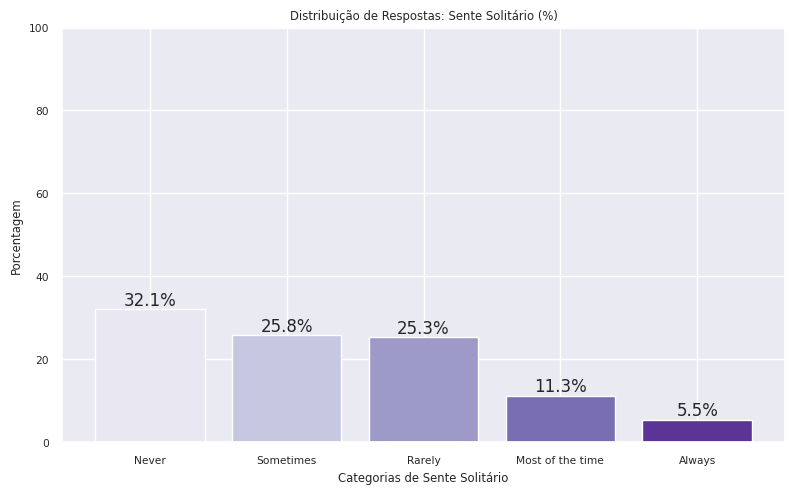

In [ ]:
# Proporção de cada resposta para "Sente Solitário"
counts = df_categoricos['Sente_solitario'].value_counts(normalize=True) * 100

# Criando gráfico de barras simples
# plt.figure(figsize=(8, 5))
# ax = sns.barplot(x=counts.index, y=counts.values, palette="Blues")
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(counts.index, counts.values, color=sns.color_palette("Purples", n_colors=len(counts)))

# Adicionando os valores das porcentagens em cima das barras
ax.bar_label(bars, labels=[f'{v:.1f}%' for v in counts.values], fontsize=12)

plt.title("Distribuição de Respostas: Sente Solitário (%)")
plt.ylabel("Porcentagem")
plt.xlabel("Categorias de Sente Solitário")
plt.ylim(0, 100)
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 2, f'{p.get_height():.1f}%',
#             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


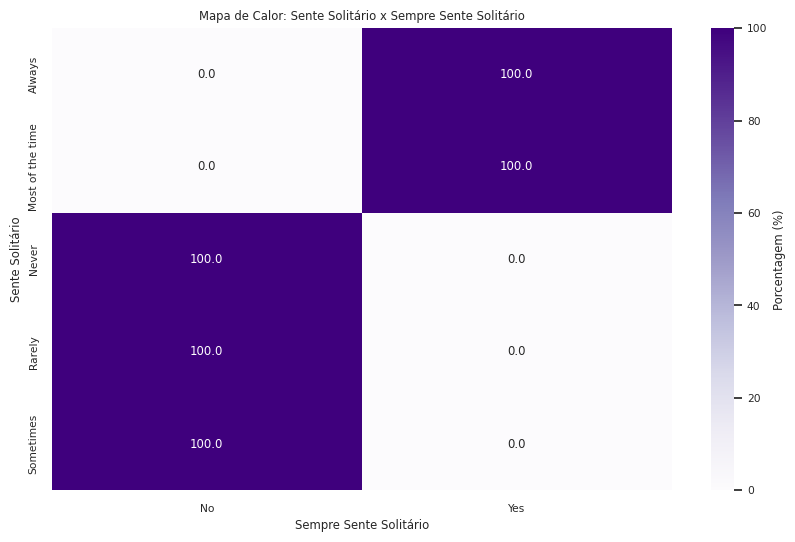

In [ ]:
dado_solitario= df_categoricos[['Sente_solitario', 'Sempre_sente_solitario']]
tabela_solitario= pd.crosstab(dado_solitario['Sente_solitario'], dado_solitario['Sempre_sente_solitario'], normalize='index') * 100

# Criando o Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tabela_solitario, annot=True, fmt=".1f", cmap="Purples", cbar_kws={'label': 'Porcentagem (%)'})
plt.title("Mapa de Calor: Sente Solitário x Sempre Sente Solitário")
plt.xlabel("Sempre Sente Solitário")
plt.ylabel("Sente Solitário")
plt.show()

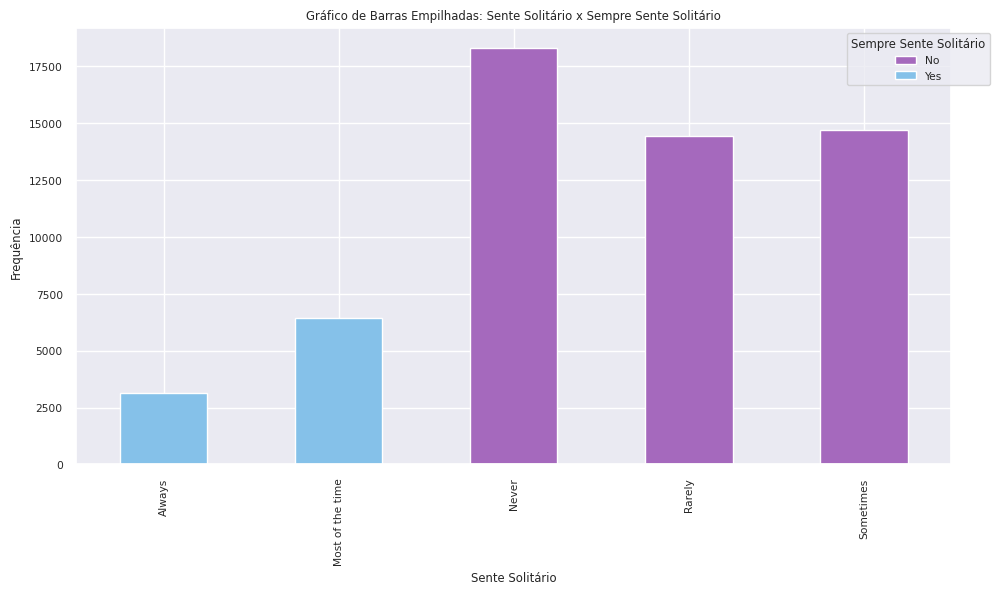

In [ ]:
# Barras empilhadas
solitario = pd.crosstab(dado_solitario['Sente_solitario'], dado_solitario['Sempre_sente_solitario'])

solitario.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores_personalizadas)
plt.title("Gráfico de Barras Empilhadas: Sente Solitário x Sempre Sente Solitário")
plt.xlabel("Sente Solitário")
plt.ylabel("Frequência")
plt.legend(title="Sempre Sente Solitário", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Isso explica a correlação alta! Quando uma variável categórica tem categorias que se alinham perfeitamente com outra (ou seja, há uma correspondência exata, como 100% de uma categoria para uma resposta e 0% para as outras), a correlação tende a ser alta, mesmo que os dados estejam "artificialmente" segmentados. Isso sugere que, na prática, essas variáveis podem ser altamente redundantes.

Com base nisso, as representações como Heatmap ou barras empilhadas ficam pouco informativas porque os dados já são quase determinísticos. <b>Isso não quer dizer que a análise esteja errada, mas sim que esses gráficos podem não ser os melhores para essa situação.<b>

Assim, a variável "Sente Solitário" parece ser altamente relevante para diversas outras variáveis (incluindo bullying), indicando que pode ser um possível fator ou consequência de bullying e outros problemas.

Explorar essa variável além de gráficos com testes estatísticos pode agregar muito à análise.

Dessa forma serão realizados: <br>
**1. Teste de Hipóteses:**

Teste t de Student (duas categorias). <br>
Mann-Whitney Test

**2. Correlação e Regressão:**

Testar se "Sente Solitário" está significativamente associado ao bullying por meio de regressão logística.


In [ ]:
# Teste T

# 1


from scipy.stats import ttest_ind

grupo_bullying = df_removendo_nulos[df_removendo_nulos['Bullying_escola_ultimos_12_meses'] == 1]['Sente_solitario']
grupo_sem_bullying = df_removendo_nulos[df_removendo_nulos['Bullying_escola_ultimos_12_meses'] == 0]['Sente_solitario']

stat, p_value = ttest_ind(grupo_bullying, grupo_sem_bullying, equal_var=False)
print(f'Estatística do teste: {stat:.3f}, Valor-p: {p_value:.3f}')


Estatística do teste: 45.483, Valor-p: 0.000


In [ ]:
# Mann-whitney

# 1

from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(grupo_bullying, grupo_sem_bullying, alternative='two-sided')
print(f"Estatística do teste: {stat}, Valor-p: {p_value}")


Estatística do teste: 338356511.0, Valor-p: 0.0


In [ ]:
# Regressão

# 2

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Modelagem
X = df_removendo_nulos[['Sente_solitario']]
y = (df_removendo_nulos['Bullying_escola_ultimos_12_meses'] == 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

print(f'Coeficiente: {modelo.coef_}, Intercepto: {modelo.intercept_}')


Coeficiente: [[0.39554495]], Intercepto: [-1.92637787]


##### 1. Teste T (t-test)
Resultado:
Estatística do teste: 45.483, Valor-p: 0.000

Interpretação: O teste t foi feito para verificar se há uma diferença significativa entre as médias dos dois grupos (com bullying vs sem bullying).

A estatística do teste (45.483) é um valor grande, indicando que a diferença entre as médias dos grupos é bem expressiva.
O valor-p de 0.000 é menor que 0.05, o que significa que a diferença entre os grupos é estatisticamente significativa, ou seja, há uma diferença real entre os grupos no que diz respeito à variável "Sente Solitário".

##### 2. Mann-Whitney U Test
Resultado:
Estatística do teste: 338356511.0, Valor-p: 0.0

Interpretação: O teste Mann-Whitney U é uma alternativa não paramétrica ao teste t. Ele é usado para comparar dois grupos independentes quando os dados não são normalmente distribuídos. No caso, usei esse teste após o t-test, o que pode ser útil se tiver dúvidas sobre a distribuição dos dados.

A estatística do teste (338356511.0) é um número relacionado à classificação dos dados entre os dois grupos. Não é tão intuitivo quanto a estatística do t-test, mas ele serve para determinar a diferença entre as distribuições dos dois grupos.
O valor-p de 0.0 sugere que há uma diferença significativa entre os grupos, mas, como o valor-p é muito baixo, ele não é tão informativo quanto um valor mais "realista", tipo 0.0001, por exemplo. Isso pode acontecer quando você tem um grande número de observações, como nos seus dados.

##### 3. Regressão Linear
Resultado:
Coeficiente: [[0.39554495]], Intercepto: [-1.92637787]

Interpretação: A regressão linear é usada para modelar a relação entre variáveis. Aqui, você está verificando o impacto da variável "bullying escolar" sobre a variável "Sente Solitário".

O coeficiente (0.3955) indica a taxa de variação do "Sente Solitário" com relação ao aumento de uma unidade na variável explicativa (bullying escolar). Isso sugere que, para cada aumento de 1 unidade em "bullying escolar", a variável "Sente Solitário" tende a aumentar em 0.3955.
O intercepto (-1.9263) é o valor de "Sente Solitário" quando a variável explicativa é zero (ou seja, sem bullying escolar). Esse valor representa a média de "Sente Solitário" para aqueles que não sofreram bullying escolar.

#### Como saber se os dados são paramétricos ou não paramétricos?
Para determinar se você pode usar um teste paramétrico (como o teste t) ou um teste não paramétrico (como o Mann-Whitney U), você precisa verificar a distribuição dos dados. Dados paramétricos geralmente seguem uma distribuição normal. Testes paramétricos (como o t-test) assumem que os dados dos dois grupos seguem distribuições normais.

Aqui estão algumas formas de testar se seus dados são paramétricos (normalmente distribuídos):

1. Teste de Normalidade
Você pode usar testes de normalidade para verificar se seus dados seguem uma distribuição normal.

In [ ]:
# Teste de Shapiro-Wilk

from scipy.stats import shapiro

stat, p_value = shapiro(df_removendo_nulos['Sente_solitario'])
print(f'Estatística do teste: {stat:.3f}, Valor-p: {p_value:.3f}')

Estatística do teste: 0.873, Valor-p: 0.000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 56981.
  res = hypotest_fun_out(*samples, **kwds)


O valor-p foi menor que 0.05, os dados não seguem uma distribuição normal. Portanto, os dados não seguem uma distribuição normal e, por isso, o teste t não seria o mais apropriado.

Mann-Whitney U não é tão fácil de interpretar, o valor-p de 0.0 significa que há uma diferença estatisticamente significativa entre os dois grupos, ou seja, a variável "Sente Solitário" é diferente nos grupos "com bullying" e "sem bullying".

A estatística do teste de 338356511.0 não é algo intuitivo para interpretar diretamente, mas o valor-p de 0.0 é suficiente para indicar que há uma diferença significativa entre os grupos.

Resumão:
- O teste de Shapiro-Wilk indica que os dados não seguem uma distribuição normal, ou seja, são não-paramétricos.
- O Mann-Whitney U é um teste adequado para dados não paramétricos, e o valor-p de 0.0 sugere que há uma diferença significativa entre os grupos "com bullying" e "sem bullying" na variável "Sente Solitário".
- Como os dados não são paramétricos, o Mann-Whitney fornece uma alternativa para o t-test.


### Gráficos com relação a variáveis diferentes

- 1. Filtrar dados de bullying na escola


In [ ]:
df_escola = df_categoricos.loc[df_categoricos['Bullying_escola_ultimos_12_meses'] == 'Yes']
df_escola['Bullying_escola_ultimos_12_meses'].value_counts()

Bullying_escola_ultimos_12_meses
Yes    11903
No         0
Name: count, dtype: int64

- 2. Sentimento de solidão experimentado por gênero (na escola)

<ipython-input-41-a1159eb5027d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentimento_solitario = df_escola.groupby('Sente_solitario')['Sex'].value_counts(normalize=True)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Always'),
  Text(1, 0, 'Most of the time'),
  Text(2, 0, 'Never'),
  Text(3, 0, 'Rarely'),
  Text(4, 0, 'Sometimes')])

<Figure size 1200x1000 with 0 Axes>

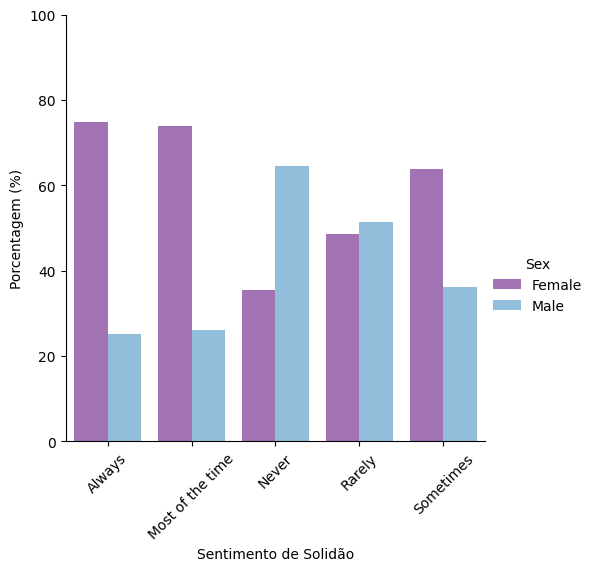

In [ ]:
sentimento_solitario = df_escola.groupby('Sente_solitario')['Sex'].value_counts(normalize=True)
sentimento_solitario = sentimento_solitario.mul(100).rename('Percent').round(1).reset_index()

plt.figure(figsize=(12,10))
# Gráfico: Porcentagem de alunos que se sentiram sozinhos por gênero
solidao = sns.catplot(x='Sente_solitario', y='Percent', hue='Sex', kind='bar', data=sentimento_solitario)

# Ajuste no gráfico
solidao.set_axis_labels("Sentimento de Solidão", "Porcentagem (%)")
solidao.set_titles("Porcentagem de alunos que se sentiram sozinhos por gênero")
solidao.set(ylim=(0, 100))
plt.xticks(rotation=45, fontsize=10)


- 3. Quantidade de amigos próximos (na escola)

<ipython-input-42-199bb1f7fb50>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amigos_proximos = df_escola.groupby('Close_friends')['Sex'].value_counts(normalize=True)


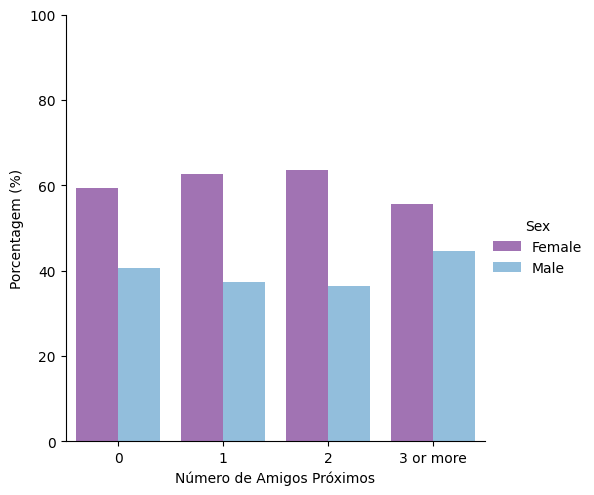

In [ ]:
amigos_proximos = df_escola.groupby('Close_friends')['Sex'].value_counts(normalize=True)
amigos_proximos = amigos_proximos.mul(100).rename('Percent').round(1).reset_index()

# Gráfico: Porcentagem de estudantes que possuem amigos próximos por gênero
amigos = sns.catplot(x='Close_friends', y='Percent', hue='Sex', kind='bar', data=amigos_proximos)

# Ajuste no gráfico
amigos.set_axis_labels("Número de Amigos Próximos", "Porcentagem (%)")
amigos.set_titles("Porcentagem de estudantes com amigos próximos por gênero")
amigos.set(ylim=(0, 100))

- 4. Bullying na internet (Cyberbullying) nos últimos 12 meses (na escola)

<ipython-input-43-b9287f366e39>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cyberbullying = df_escola.groupby('Cyberbullying_ultimos_12_meses')['Sex'].value_counts(normalize=True)


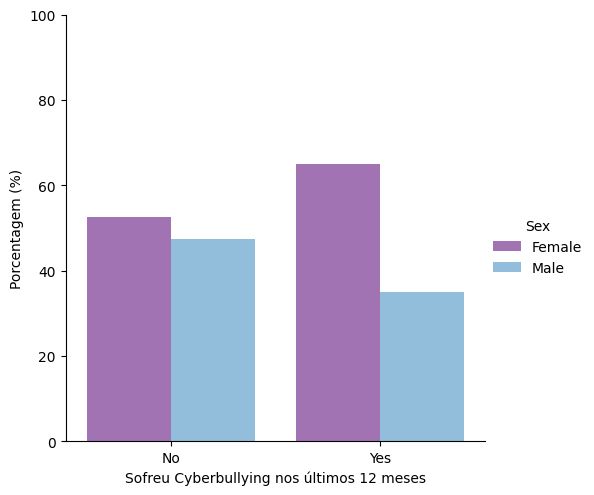

In [ ]:
# Tabela detalhando bullying na internet por gênero
cyberbullying = df_escola.groupby('Cyberbullying_ultimos_12_meses')['Sex'].value_counts(normalize=True)
cyberbullying = cyberbullying.mul(100).rename('Percent').round(1).reset_index()

# Gráfico: Porcentagem de estudantes que sofreram cyberbullying nos últimos 12 meses por gênero
cyber = sns.catplot(x='Cyberbullying_ultimos_12_meses', y='Percent', hue='Sex', kind='bar', data=cyberbullying)

# Ajuste no gráfico
cyber.set_axis_labels("Sofreu Cyberbullying nos últimos 12 meses", "Porcentagem (%)")
cyber.set_titles("Porcentagem de estudantes que sofreram Cyberbullying por gênero")
cyber.set(ylim=(0, 100))

- 5 Filtrar dados de bullying fora da escola

In [ ]:
df_fora = df_categoricos.loc[df_categoricos['Bullying_fora_ultimos_12_meses'] == 'Yes']
df_fora['Bullying_fora_ultimos_12_meses'].value_counts()

Bullying_fora_ultimos_12_meses
Yes    12229
No         0
Name: count, dtype: int64

- 6. Sentimento de solidão experimentado por gênero (fora da escola)

<ipython-input-45-bf08a74d6459>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentimento_solitario_fora = df_fora.groupby('Sente_solitario')['Sex'].value_counts(normalize=True)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Always'),
  Text(1, 0, 'Most of the time'),
  Text(2, 0, 'Never'),
  Text(3, 0, 'Rarely'),
  Text(4, 0, 'Sometimes')])

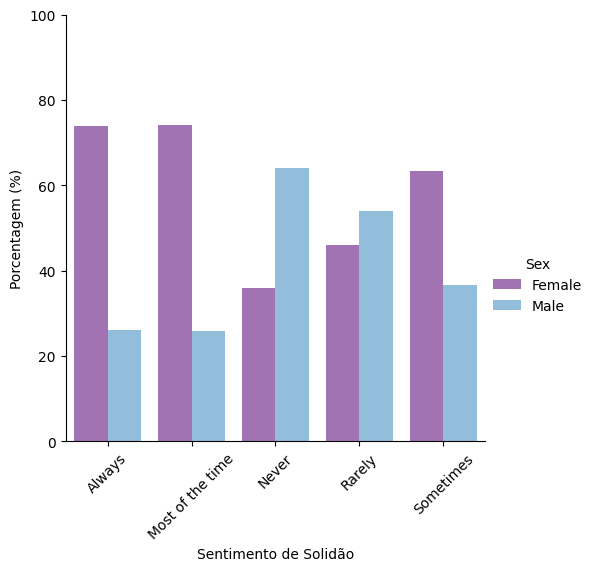

In [ ]:
# Tabela detalhando o sentimento de solidão por gênero fora da escola
sentimento_solitario_fora = df_fora.groupby('Sente_solitario')['Sex'].value_counts(normalize=True)
sentimento_solitario_fora = sentimento_solitario_fora.mul(100).rename('Percent').round(1).reset_index()

# Gráfico: Porcentagem de alunos que se sentiram sozinhos por gênero fora da escola
solitario_fora = sns.catplot(x='Sente_solitario', y='Percent', hue='Sex', kind='bar', data=sentimento_solitario_fora)

# Ajuste no gráfico
solitario_fora.set_axis_labels("Sentimento de Solidão", "Porcentagem (%)")
solitario_fora.set_titles("Porcentagem de alunos que se sentiram sozinhos por gênero fora da escola")
solitario_fora.set(ylim=(0, 100))
plt.xticks(rotation=45, fontsize=10)

- 7. Bullying fora da escola e Cyberbullying (fora da escola)

<ipython-input-46-f8377147da45>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cyberbullying_fora = df_fora.groupby('Cyberbullying_ultimos_12_meses')['Sex'].value_counts(normalize=True)


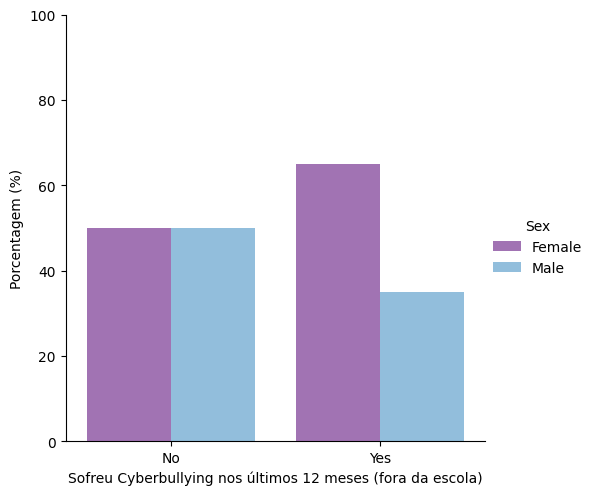

In [ ]:
# Tabela com Cyberbullying por gênero fora da escola
cyberbullying_fora = df_fora.groupby('Cyberbullying_ultimos_12_meses')['Sex'].value_counts(normalize=True)
cyberbullying_fora = cyberbullying_fora.mul(100).rename('Percent').round(1).reset_index()

# Gráfico: Porcentagem de estudantes que sofreram Cyberbullying nos últimos 12 meses fora da escola por gênero
cyber_fora = sns.catplot(x='Cyberbullying_ultimos_12_meses', y='Percent', hue='Sex', kind='bar', data=cyberbullying_fora)

# Ajuste no gráfico
cyber_fora.set_axis_labels("Sofreu Cyberbullying nos últimos 12 meses (fora da escola)", "Porcentagem (%)")
cyber_fora.set_titles("Porcentagem de estudantes que sofreram Cyberbullying fora da escola por gênero")
cyber_fora.set(ylim=(0, 100))

- 8. Filtrar dados de Cyberbullying (somente Cyberbullying)

In [ ]:
# Filtrar dados de Cyberbullying
df_cyber = df_categoricos.loc[df_categoricos['Cyberbullying_ultimos_12_meses'] == 'Yes']
df_cyber['Cyberbullying_ultimos_12_meses'].value_counts()

Cyberbullying_ultimos_12_meses
Yes    12197
No         0
Name: count, dtype: int64

- 9. Sentimento de solidão experimentado por gênero (Cyberbullying)

<ipython-input-48-6f587b0f6151>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentimento_solitario_cyber = df_cyber.groupby('Sente_solitario')['Sex'].value_counts(normalize=True)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Always'),
  Text(1, 0, 'Most of the time'),
  Text(2, 0, 'Never'),
  Text(3, 0, 'Rarely'),
  Text(4, 0, 'Sometimes')])

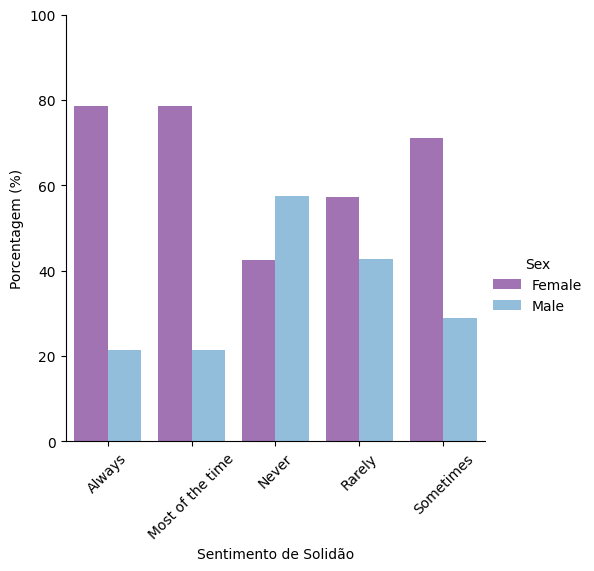

In [ ]:
# Tabela detalhando o sentimento de solidão por gênero para casos de Cyberbullying
sentimento_solitario_cyber = df_cyber.groupby('Sente_solitario')['Sex'].value_counts(normalize=True)
sentimento_solitario_cyber = sentimento_solitario_cyber.mul(100).rename('Percent').round(1).reset_index()

# Gráfico: Porcentagem de alunos que se sentiram sozinhos por gênero (Cyberbullying)
solitario_cyber = sns.catplot(x='Sente_solitario', y='Percent', hue='Sex', kind='bar', data=sentimento_solitario_cyber)

# Ajuste no gráfico
solitario_cyber.set_axis_labels("Sentimento de Solidão", "Porcentagem (%)")
solitario_cyber.set_titles("Porcentagem de alunos que se sentiram sozinhos por gênero (Cyberbullying)")
solitario_cyber.set(ylim=(0, 100))
plt.xticks(rotation=45, fontsize=10)

- 10. Amigos próximos (Cyberbullying)

<ipython-input-49-c6e63389a97c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amigos_proximos_cyber = df_cyber.groupby('Close_friends')['Sex'].value_counts(normalize=True)


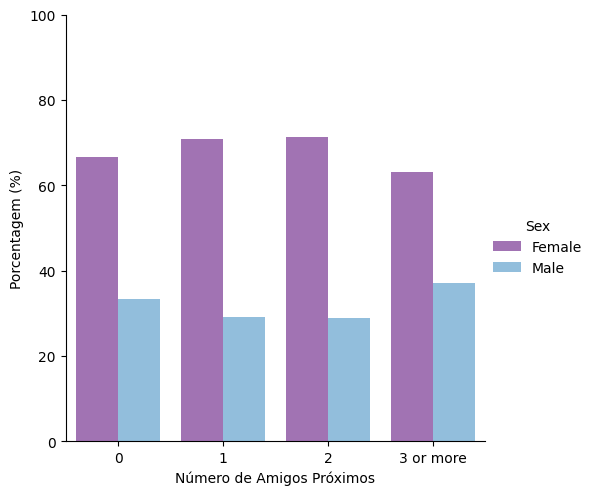

In [ ]:
# Tabela com quantidade de amigos próximos por gênero para casos de Cyberbullying
amigos_proximos_cyber = df_cyber.groupby('Close_friends')['Sex'].value_counts(normalize=True)
amigos_proximos_cyber = amigos_proximos_cyber.mul(100).rename('Percent').round(1).reset_index()

# Gráfico: Porcentagem de estudantes com amigos próximos por gênero (Cyberbullying)
amigos_cyber = sns.catplot(x='Close_friends', y='Percent', hue='Sex', kind='bar', data=amigos_proximos_cyber)

# Ajuste no gráfico
amigos_cyber.set_axis_labels("Número de Amigos Próximos", "Porcentagem (%)")
amigos_cyber.set_titles("Porcentagem de estudantes com amigos próximos por gênero (Cyberbullying)")
amigos_cyber.set(ylim=(0, 100))

## -> Análise exploratória dos dados categóricos
Questão 2

### Distribuições com Porcentagem


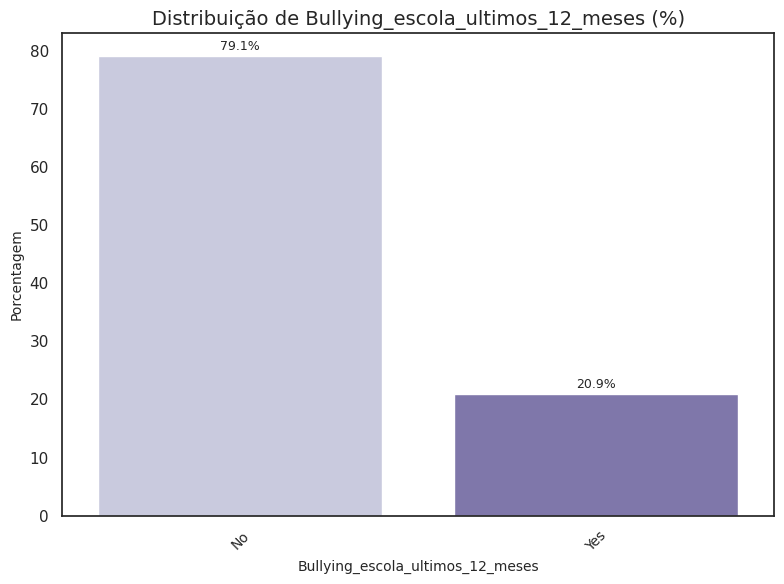

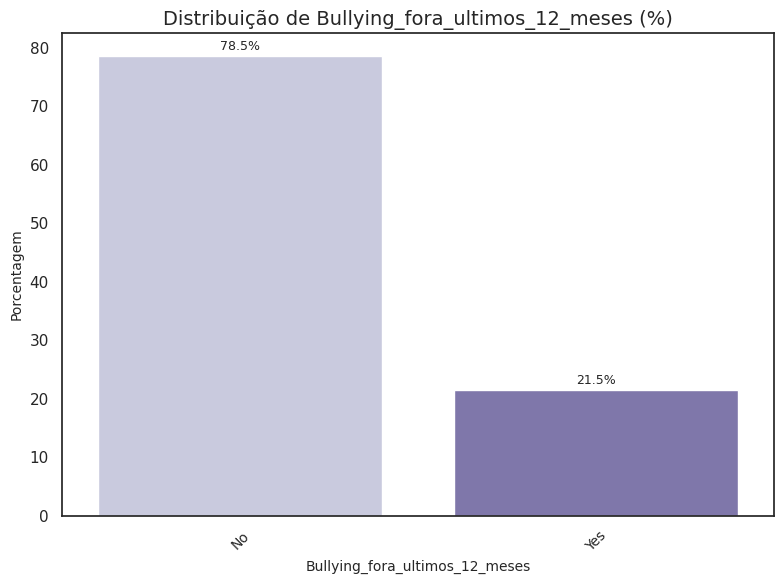

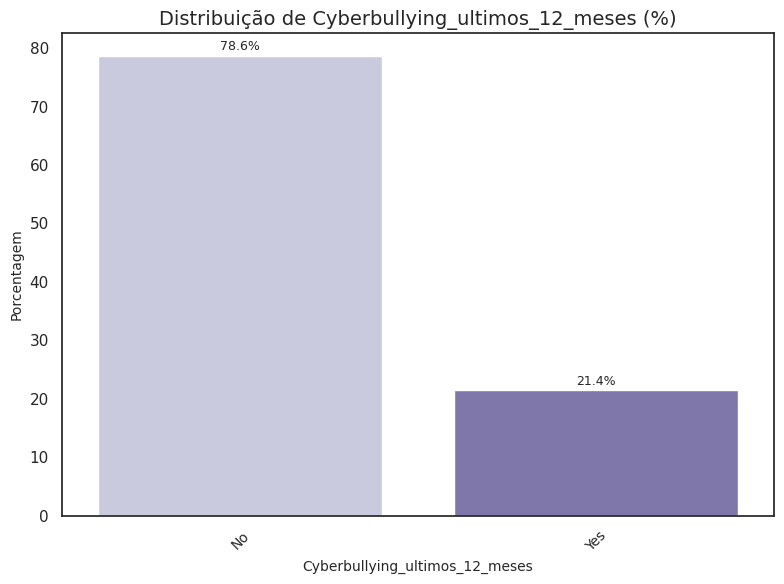

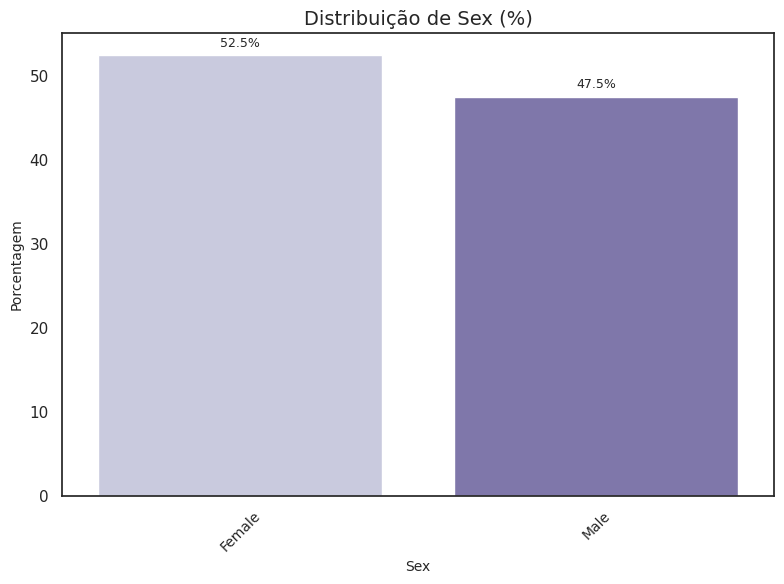

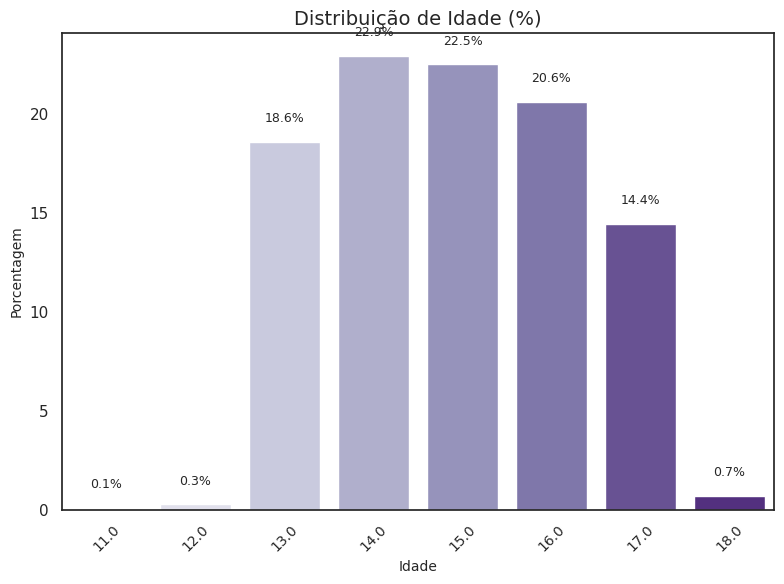

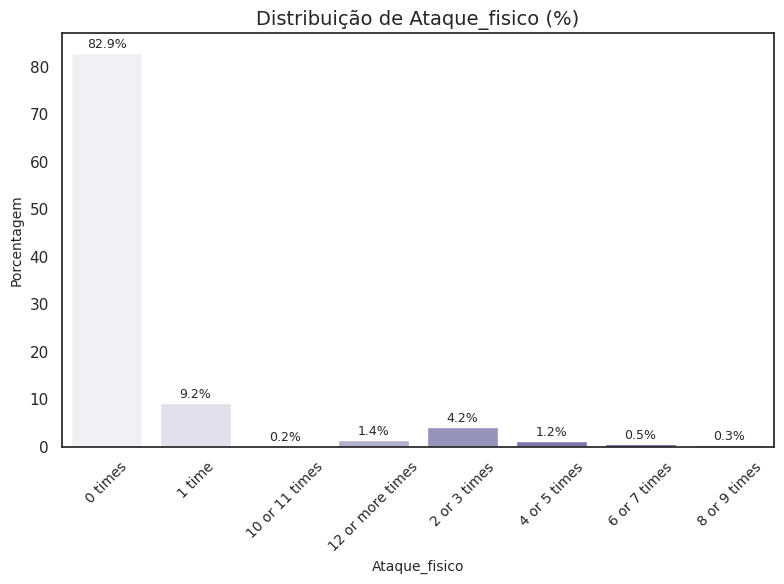

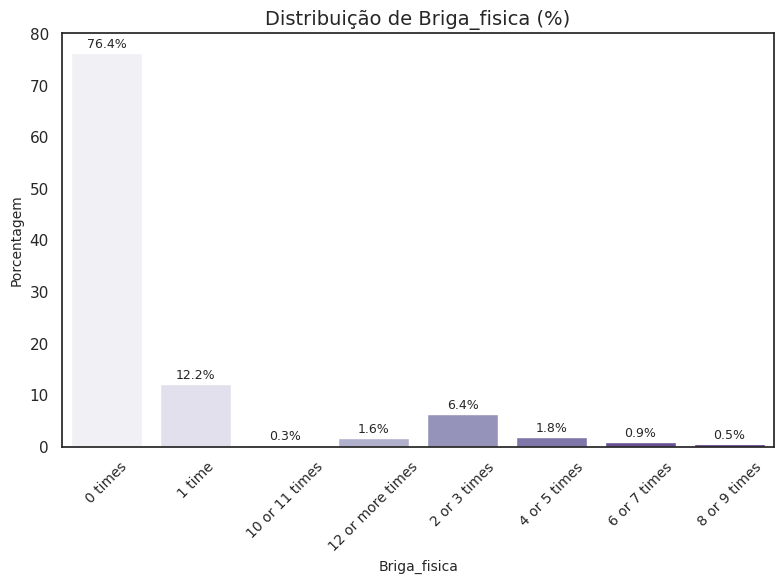

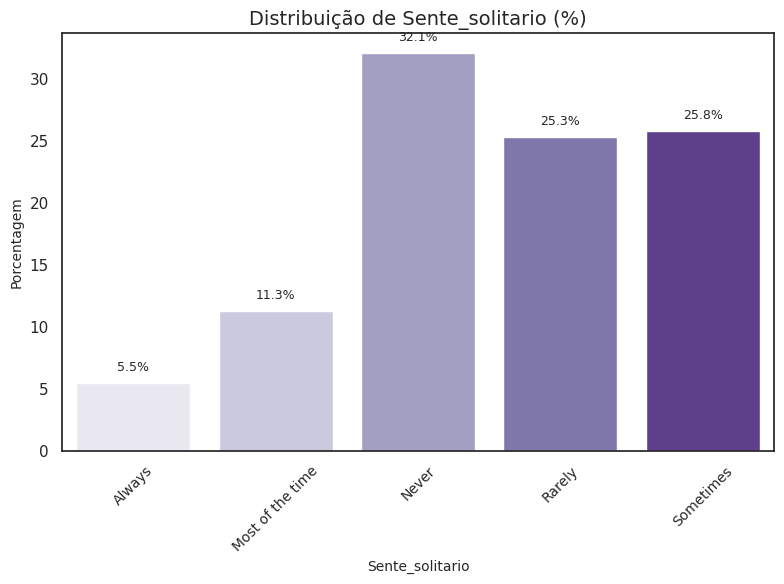

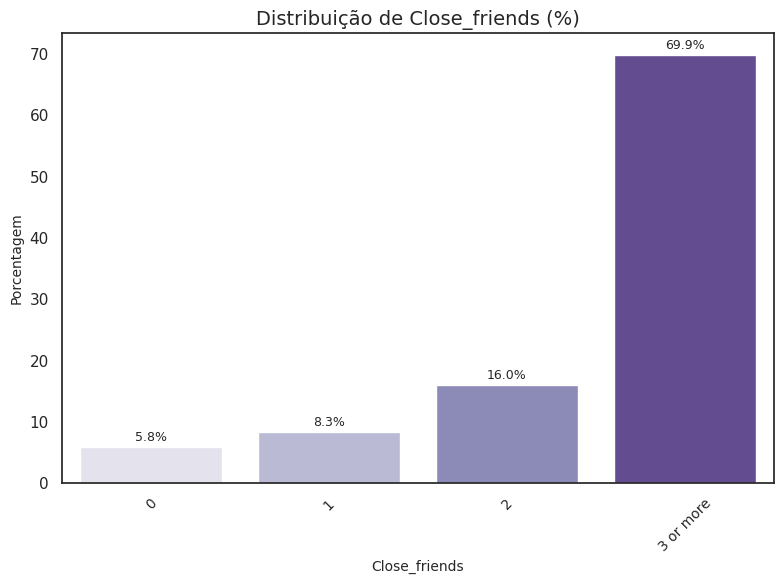

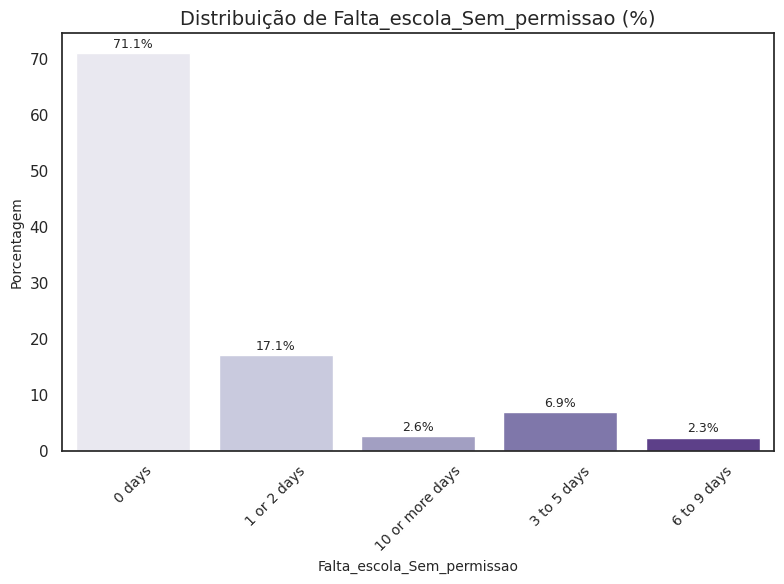

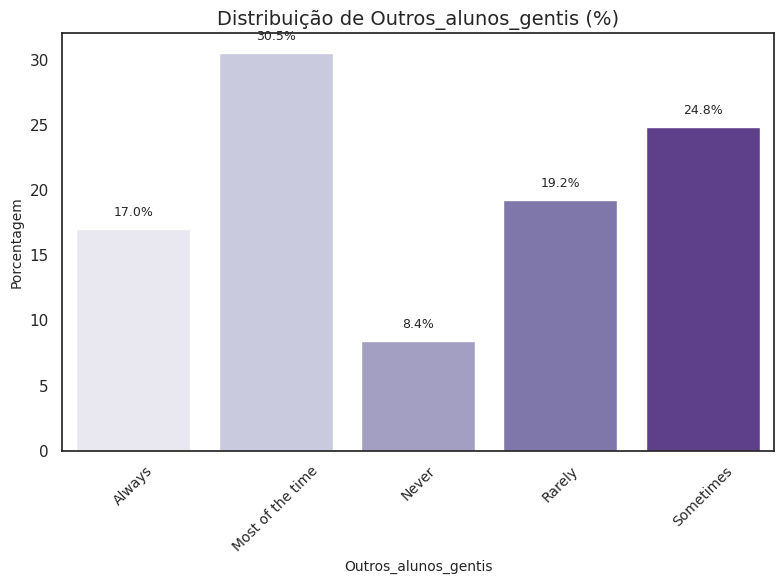

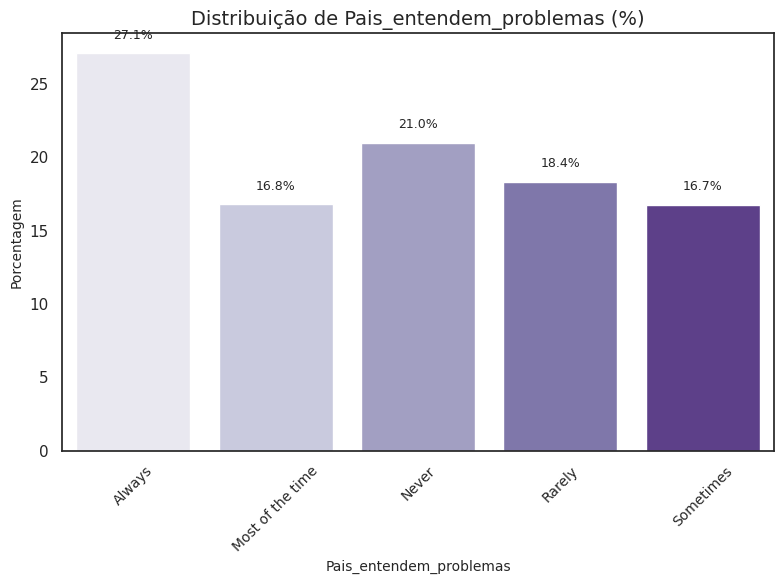

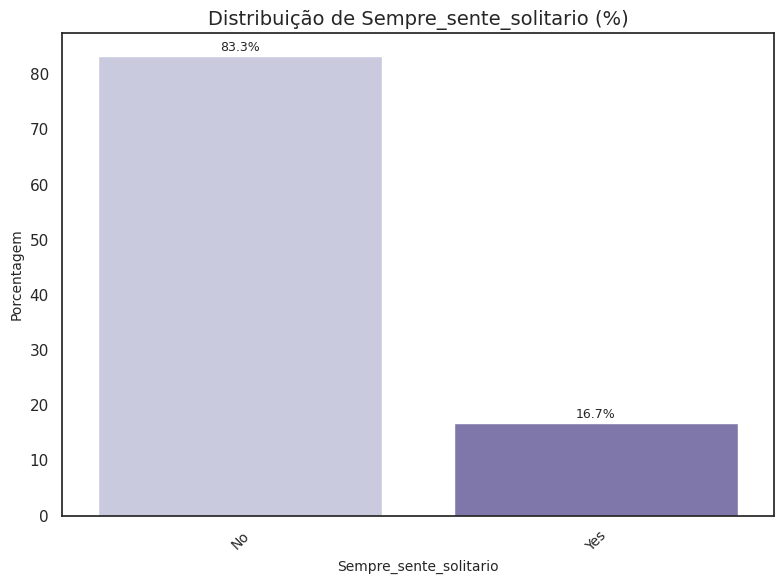

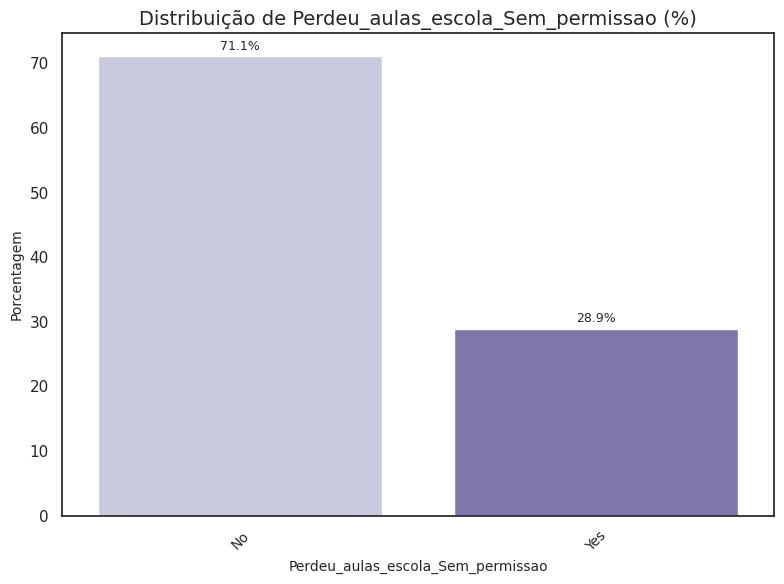

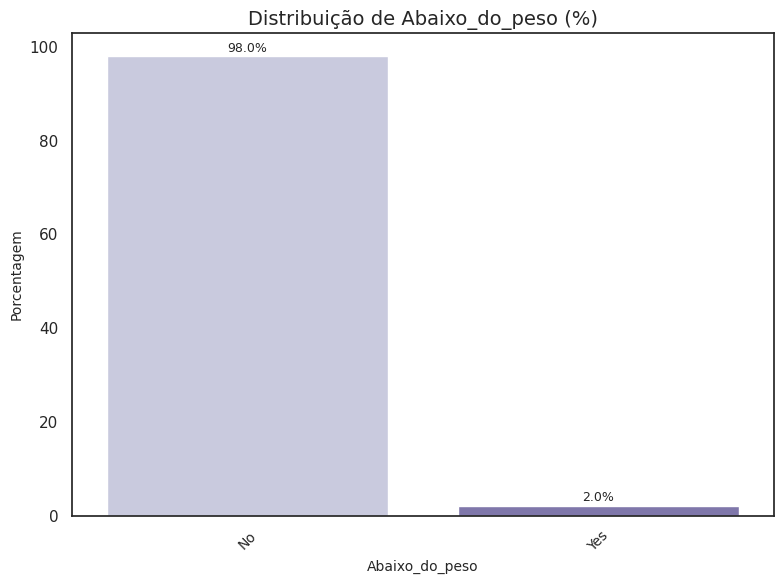

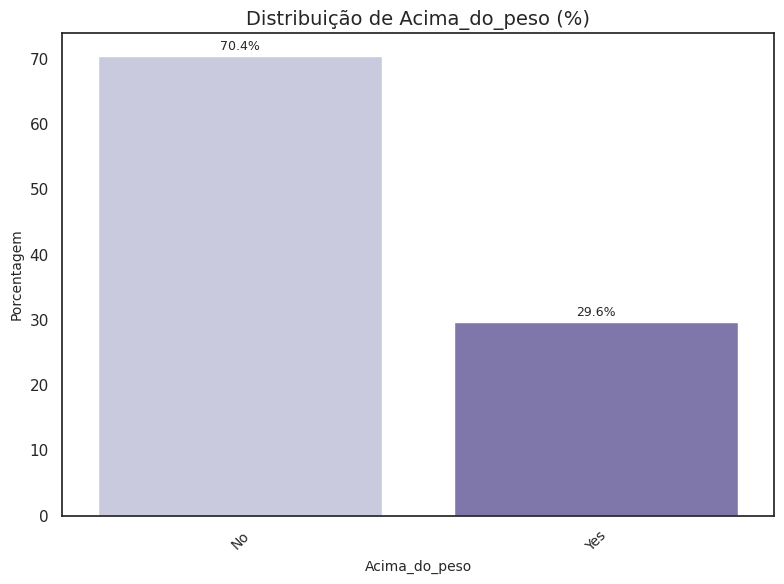

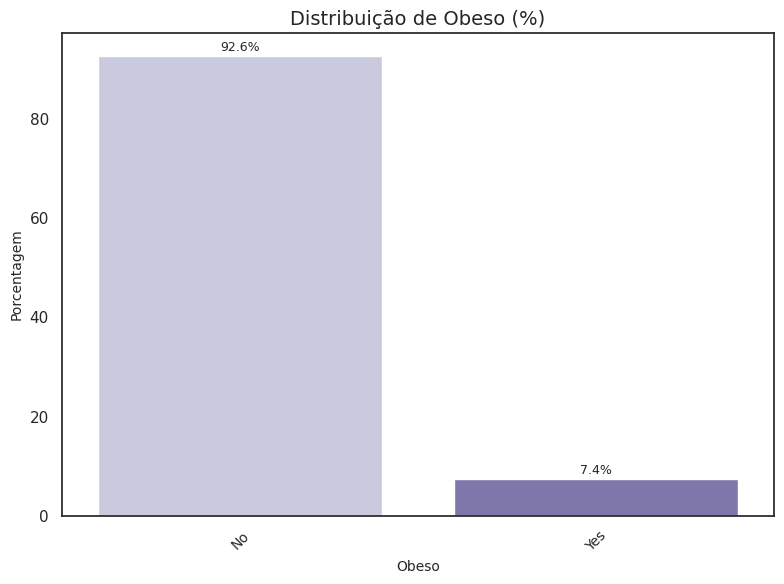

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) #Para remover as mensagens de warning do seaborn

#cores_personalizadas = ["#A569BD", "#85C1E9", "#F1948A"]  # Roxo, Azul, Rosa

variaveis_categoricas = df_categoricos[['Bullying_escola_ultimos_12_meses', 'Bullying_fora_ultimos_12_meses',
                                        'Cyberbullying_ultimos_12_meses', 'Sex','Idade', 'Ataque_fisico', 'Briga_fisica',
                                        'Sente_solitario', 'Close_friends', 'Falta_escola_Sem_permissao',
                                        'Outros_alunos_gentis', 'Pais_entendem_problemas', 'Sempre_sente_solitario',
                                        'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso', 'Obeso']]

# Plotando as distribuições com porcentagens
for col in variaveis_categoricas:

    sns.set(style="white")
    plt.figure(figsize=(8, 6))

    counts = df_categoricos[col].value_counts(normalize=True).sort_index() * 100
    # Teve que ser realizada um ordenação pois no plot os valores das porcentagem dava erro quando fazia counts.index, que a ordem era diferente dos valores

    ax = sns.barplot(x=counts.index, y=counts.values, palette="Purples") ##  Qualquer coisa retornar para 'Oranges'

    plt.title(f'Distribuição de {col} (%)', fontsize=14)
    plt.ylabel('Porcentagem', fontsize=10)
    plt.xlabel(col, fontsize=10)
    plt.xticks(rotation=45, fontsize=10)

    # rótulos manuais
    for i, v in enumerate(counts.values):
        ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

#### Tabela de Frequência com porcentagem para quem sofre bullying

Tabela de Frequência e a porcentagem relativa para cada categoria também faz parte dessa análise exploratória, já que anteriormente foi mostrado apenas a porcentagem

In [ ]:
df_categoricos.columns

Index(['ID', 'Bullying_escola_ultimos_12_meses',
       'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso'],
      dtype='object')

In [ ]:
tabelas_porcentagens = {}

for var in variaveis_categoricas:
    frequencia = df_categoricos[var].value_counts()
    porcentagem = df_categoricos[var].value_counts(normalize=True) * 100

    tabelas_porcentagens[var] = pd.DataFrame({
        'Frequência': frequencia,
        'Porcentagem (%)': round(porcentagem, 2)})

for var, tabela in tabelas_porcentagens.items():
    print(f"\nTabela de {var}:")
    print(tabela)
    print("\n" + "="*40)   # Separador



Tabela de Bullying_escola_ultimos_12_meses:
                                  Frequência  Porcentagem (%)
Bullying_escola_ultimos_12_meses                             
No                                     45078            79.11
Yes                                    11903            20.89


Tabela de Bullying_fora_ultimos_12_meses:
                                Frequência  Porcentagem (%)
Bullying_fora_ultimos_12_meses                             
No                                   44752            78.54
Yes                                  12229            21.46


Tabela de Cyberbullying_ultimos_12_meses:
                                Frequência  Porcentagem (%)
Cyberbullying_ultimos_12_meses                             
No                                   44784            78.59
Yes                                  12197            21.41


Tabela de Sex:
        Frequência  Porcentagem (%)
Sex                                
Female       29898            52.47
Male         2

In [ ]:
df_bullying_sim = df_categoricos[
    (df_categoricos['Bullying_escola_ultimos_12_meses'] == 'Yes') |
    (df_categoricos['Bullying_fora_ultimos_12_meses'] == 'Yes') |
    (df_categoricos['Cyberbullying_ultimos_12_meses'] == 'Yes')
]  # Filtra todos os casos de bullying, independente de qual tipo

# Lista de variáveis categóricas para análise
variaveis_categoricas = [
    'Bullying_escola_ultimos_12_meses', 'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
    'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario', 'Close_friends',
    'Falta_escola_Sem_permissao', 'Outros_alunos_gentis', 'Pais_entendem_problemas',
    'Sempre_sente_solitario', 'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso', 'Obeso'
]

# Dicionário para armazenar as tabelas
tabelas_porcentagens = {}

# Calculando a porcentagem para cada variável
for var in variaveis_categoricas:
    # Contagem de frequências e porcentagens
    frequencia = df_bullying_sim[var].value_counts()
    porcentagem = df_bullying_sim[var].value_counts(normalize=True) * 100

    # Armazenando em um dicionário
    tabelas_porcentagens[var] = pd.DataFrame({
        'Frequência': frequencia,
        'Porcentagem (%)': round(porcentagem, 2)
    })

# Exibindo as tabelas para cada variável
for var, tabela in tabelas_porcentagens.items():
    print(f"\nTabela de {var}:")
    print(tabela)
    print("\n" + "="*40)   # Mais fácil multiplicar que usar '=====' infinidamente


Tabela de Bullying_escola_ultimos_12_meses:
                                  Frequência  Porcentagem (%)
Bullying_escola_ultimos_12_meses                             
Yes                                    11903            52.18
No                                     10909            47.82


Tabela de Bullying_fora_ultimos_12_meses:
                                Frequência  Porcentagem (%)
Bullying_fora_ultimos_12_meses                             
Yes                                  12229            53.61
No                                   10583            46.39


Tabela de Cyberbullying_ultimos_12_meses:
                                Frequência  Porcentagem (%)
Cyberbullying_ultimos_12_meses                             
Yes                                  12197            53.47
No                                   10615            46.53


Tabela de Idade:
       Frequência  Porcentagem (%)
Idade                             
15.0         5258            23.05
14.0         52

### Calculo de moda

In [ ]:
for col in df_categoricos.columns.drop('ID'):
    print(f"Moda de {col}: {df_categoricos[col].mode()[0]}") # Sempre colocar o [0] para pegar o primeiro

Moda de Bullying_escola_ultimos_12_meses: No
Moda de Bullying_fora_ultimos_12_meses: No
Moda de Cyberbullying_ultimos_12_meses: No
Moda de Idade: 14.0
Moda de Sex: Female
Moda de Ataque_fisico: 0 times
Moda de Briga_fisica: 0 times
Moda de Sente_solitario: Never
Moda de Close_friends: 3 or more
Moda de Falta_escola_Sem_permissao: 0 days
Moda de Outros_alunos_gentis: Most of the time
Moda de Pais_entendem_problemas: Always
Moda de Sempre_sente_solitario: No
Moda de Perdeu_aulas_escola_Sem_permissao: No
Moda de Abaixo_do_peso: No
Moda de Acima_do_peso: No
Moda de Obeso: No


### Teste Qui-Quadrado

Foi escolhida a variável sexo para testar a independência entre as variáveis, considerando os 3 tipos de bullying:

- Bullying na escola nos últimos 12 meses
- Bullying fora da escola nos últimos 12 meses
- Cyberbullying escola nos últimos 12 meses


#### Bullying na escola nos últimos 12 meses

In [ ]:
from tabulate import tabulate

#Criando a tabela de contigência com o crosstab
data_crosstab = pd.crosstab(df_categoricos['Sex'],
                            df_categoricos['Bullying_escola_ultimos_12_meses'])

print(tabulate(data_crosstab,
               headers = ['Não houve bullying na escola nos últimos 12 meses', 'Houve bullying na escola nos últimos 12 meses'],
               tablefmt = 'fancy_grid',
               stralign='center',
               numalign='center'))

╒════════╤═════════════════════════════════════════════════════╤═════════════════════════════════════════════════╕
│        │  Não houve bullying na escola nos últimos 12 meses  │  Houve bullying na escola nos últimos 12 meses  │
╞════════╪═════════════════════════════════════════════════════╪═════════════════════════════════════════════════╡
│ Female │                        23002                        │                      6896                       │
├────────┼─────────────────────────────────────────────────────┼─────────────────────────────────────────────────┤
│  Male  │                        22076                        │                      5007                       │
╘════════╧═════════════════════════════════════════════════════╧═════════════════════════════════════════════════╛


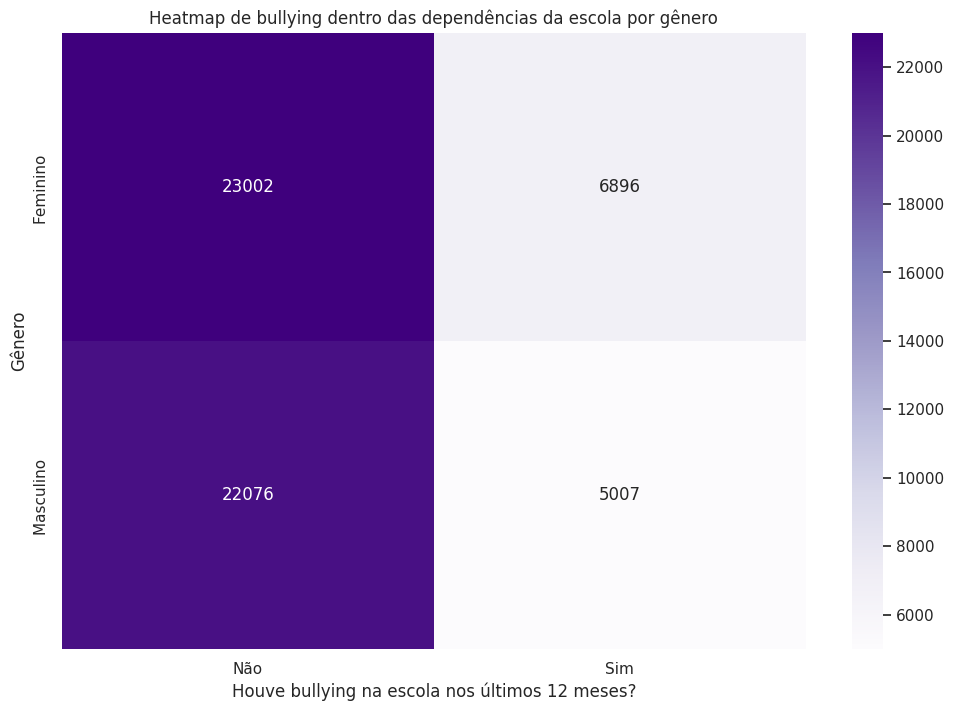

In [ ]:
#Plotando um heatmap
plt.figure(figsize=(12,8))
x_axis_labels = ['Não', 'Sim']
y_axis_labels = ['Feminino ', 'Masculino ']
sns.heatmap(data_crosstab, annot=True, cmap="Purples",fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title("Heatmap de bullying dentro das dependências da escola por gênero")
plt.xlabel("Houve bullying na escola nos últimos 12 meses?")
plt.ylabel("Gênero")
plt.show()

Determinando as hipóteses:

H0: As variáveis sexo e houve bullying na escola últimos 12 meses não possuem grau de associação

H1: As variáveis sexo e houve bullying na escola últimos 12 meses possuem grau de associação

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

estatistica_qui_quadrado, p_value, grau_liberdade_a, tab_expected = chi2_contingency(data_crosstab)

#Determinando alpha 5%
alpha = 0.05

if p_value <= alpha:
    print('Rejeita H0: As variáveis sexo e houve bullying na escola últimos 12 meses possuem grau de associação.')
else:
    print('Não rejeita H0: As variáveis sexo e houve bullying na escola últimos 12 meses não possuem grau de associação.')

Rejeita H0: As variáveis sexo e houve bullying na escola últimos 12 meses possuem grau de associação.


#### Bullying fora da escola nos últimos 12 meses



In [ ]:
from tabulate import tabulate

#Criando a tabela de contigência com o crosstab
data_crosstab = pd.crosstab(df_categoricos['Sex'],
                            df_categoricos['Bullying_fora_ultimos_12_meses'])

print(tabulate(data_crosstab,
               headers = ['Não houve bullying fora da escola nos últimos 12 meses', 'Houve bullying fora da escola nos últimos 12 meses'],
               tablefmt = 'fancy_grid',
               stralign='center',
               numalign='center'))

╒════════╤══════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════╕
│        │  Não houve bullying fora da escola nos últimos 12 meses  │  Houve bullying fora da escola nos últimos 12 meses  │
╞════════╪══════════════════════════════════════════════════════════╪══════════════════════════════════════════════════════╡
│ Female │                          22885                           │                         7013                         │
├────────┼──────────────────────────────────────────────────────────┼──────────────────────────────────────────────────────┤
│  Male  │                          21867                           │                         5216                         │
╘════════╧══════════════════════════════════════════════════════════╧══════════════════════════════════════════════════════╛


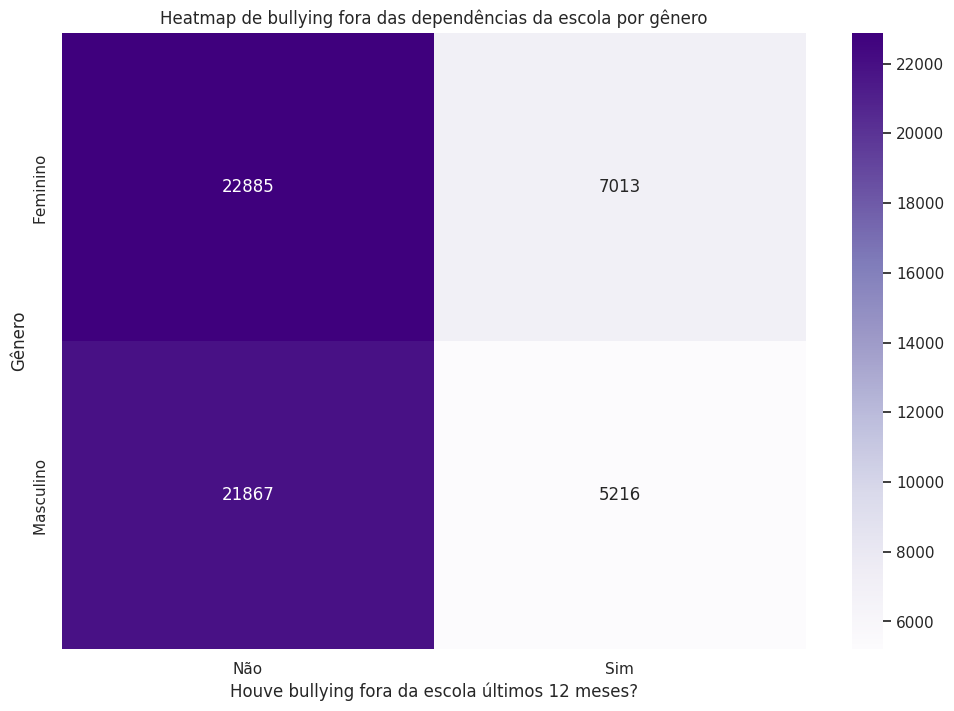

In [ ]:
#Plotando um heatmap
plt.figure(figsize=(12,8))
x_axis_labels = ['Não', 'Sim']
y_axis_labels = ['Feminino ', 'Masculino ']
sns.heatmap(data_crosstab, annot=True, cmap="Purples",fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title("Heatmap de bullying fora das dependências da escola por gênero")
plt.xlabel("Houve bullying fora da escola últimos 12 meses?")
plt.ylabel("Gênero")
plt.show()

Determinando as hipóteses:

H0: As variáveis sexo e houve bullying fora da escola últimos 12 meses não possuem grau de associação

H1: As variáveis sexo e houve bullying fora da escola últimos 12 meses possuem grau de associação

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

estatistica_qui_quadrado, p_value, grau_liberdade_a, tab_expected = chi2_contingency(data_crosstab)

#Determinando alpha 5%
alpha = 0.05

if p_value <= alpha:
    print('Rejeita H0: As variáveis sexo e houve bullying fora da escola últimos 12 meses possuem grau de associação.')
else:
    print('Não rejeita H0: As variáveis sexo e houve bullying fora da escola últimos 12 meses não possuem grau de associação.')

Rejeita H0: As variáveis sexo e houve bullying fora da escola últimos 12 meses possuem grau de associação.


#### Cyberbullying nos últimos 12 meses

In [ ]:
from tabulate import tabulate

#Criando a tabela de contigência com o crosstab
data_crosstab = pd.crosstab(df_categoricos['Sex'],
                            df_categoricos['Cyberbullying_ultimos_12_meses'])

print(tabulate(data_crosstab,
               headers = ['Não houve cyberbullying nos últimos 12 meses', 'Houve cyberbullying nos últimos 12 meses'],
               tablefmt = 'fancy_grid',
               stralign='center',
               numalign='center'))

╒════════╤════════════════════════════════════════════════╤════════════════════════════════════════════╕
│        │  Não houve cyberbullying nos últimos 12 meses  │  Houve cyberbullying nos últimos 12 meses  │
╞════════╪════════════════════════════════════════════════╪════════════════════════════════════════════╡
│ Female │                     21905                      │                    7993                    │
├────────┼────────────────────────────────────────────────┼────────────────────────────────────────────┤
│  Male  │                     22879                      │                    4204                    │
╘════════╧════════════════════════════════════════════════╧════════════════════════════════════════════╛


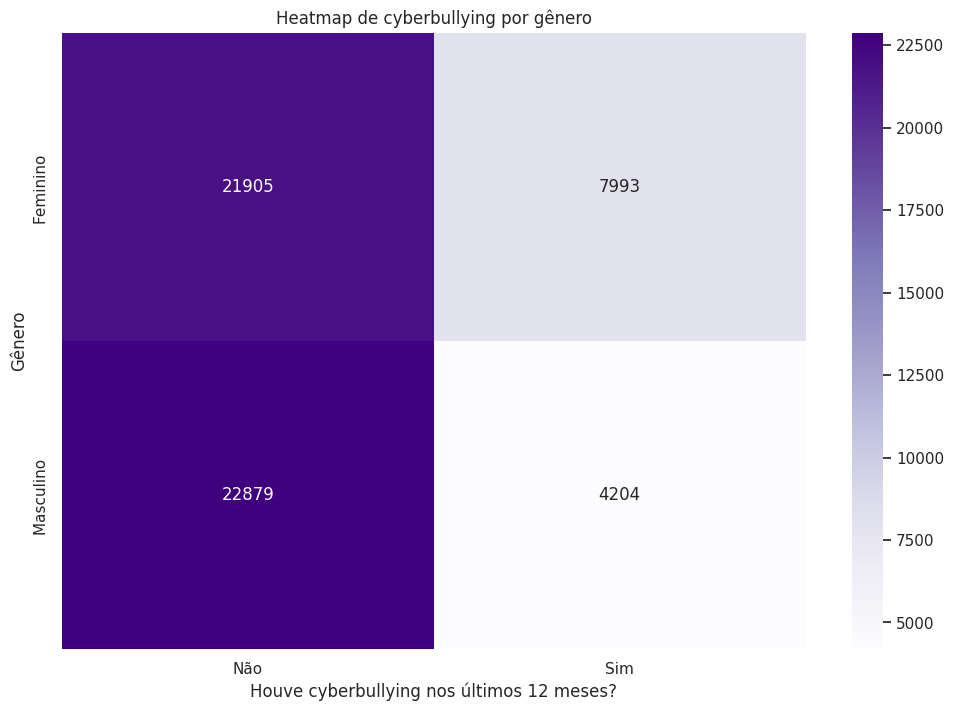

In [ ]:
#Plotando um heatmap
plt.figure(figsize=(12,8))
x_axis_labels = ['Não', 'Sim']
y_axis_labels = ['Feminino ', 'Masculino ']
sns.heatmap(data_crosstab, annot=True, cmap="Purples",fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title("Heatmap de cyberbullying por gênero")
plt.xlabel("Houve cyberbullying nos últimos 12 meses?")
plt.ylabel("Gênero")
plt.show()

Determinando as hipóteses:

H0: As variáveis sexo e cyberbullying nos últimos 12 meses não possuem grau de associação

H1: As variáveis sexo e cyberbullying nos últimos 12 meses possuem grau de associação

In [ ]:
df_categoricos.head()

ID Bullying_escola_ultimos_12_meses Bullying_fora_ultimos_12_meses  \
0   1                              Yes                            Yes   
1   2                               No                             No   
2   3                               No                             No   
3   4                               No                             No   
4   5                               No                             No   

  Cyberbullying_ultimos_12_meses  Idade     Sex Ataque_fisico  Briga_fisica  \
0                             No   13.0  Female       0 times       0 times   
1                             No   13.0  Female       0 times       0 times   
2                             No   14.0    Male       0 times       0 times   
3                             No   16.0    Male       0 times  2 or 3 times   
4                             No   13.0  Female       0 times       0 times   

  Sente_solitario Close_friends Falta_escola_Sem_permissao  \
0          Always             2            10 or more days   
1           Never     3 or more                     0 days   
2           Never     3 or more                     0 days   
3           Never     3 or more                     0 days   
4          Rarely     3 or more                     0 days   

  Outros_alunos_gentis Pais_entendem_problemas Sempre_sente_solitario  \
0                Never                  Always                    Yes   
1            Sometimes                  Always                     No   
2            Sometimes                  Always                     No   
3            Sometimes                  Always                     No   
4     Most of the time        Most of the time                     No   

  Perdeu_aulas_escola_Sem_permissao Abaixo_do_peso Acima_do_peso Obeso  
0                               Yes            NaN           NaN   NaN  
1                                No            NaN           NaN   NaN  
2                                No             No            No    No  
3                                No             No            No    No  
4                                No            NaN           NaN   NaN

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

estatistica_qui_quadrado, p_value, grau_liberdade_a, tab_expected = chi2_contingency(data_crosstab)

#Determinando alpha 5%
alpha = 0.05

if p_value <= alpha:
    print('Rejeita H0: As variáveis sexo e cyberbullying nos últimos 12 meses possuem grau de associação.')
else:
    print('Não rejeita H0: As variáveis sexo e cyberbullying nos últimos 12 meses não possuem grau de associação.')

Rejeita H0: As variáveis sexo e cyberbullying nos últimos 12 meses possuem grau de associação.


In [ ]:
contingencia = pd.crosstab(df_categoricos['Sex'], df_categoricos['Bullying_escola_ultimos_12_meses'])
print(contingencia,"\n")

chi2, p, dof, expected = chi2_contingency(contingencia)

print(f"Qui-Quadrado: {chi2:.2f}")
print(f"p-valor: {p:.4f}")
print(f"Graus de liberdade: {dof}")
print("Frequências esperadas:")
print(expected)

Bullying_escola_ultimos_12_meses     No   Yes
Sex                                          
Female                            23002  6896
Male                              22076  5007 

Qui-Quadrado: 179.90
p-valor: 0.0000
Graus de liberdade: 1
Frequências esperadas:
[[23652.48142363  6245.51857637]
 [21425.51857637  5657.48142363]]


In [ ]:
! pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.9/415.9 kB 6.2 MB/s eta 0:00:00


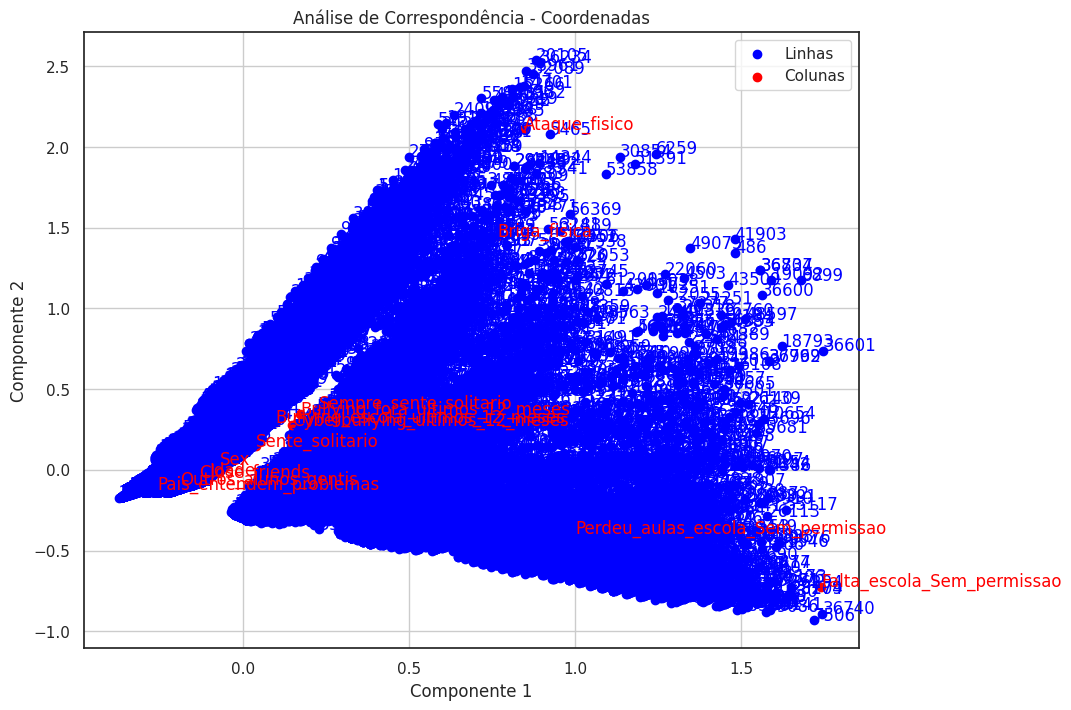

In [ ]:
import prince
import matplotlib.pyplot as plt


df_final_correspondencia = df_final.drop(columns=['ID','Abaixo_do_peso', 'Acima_do_peso', 'Obeso'])

# Criar o modelo de Análise de Correspondência
ca = prince.CA(n_components=2)
ca = ca.fit(df_final_correspondencia)  # Ajusta o modelo aos dados

# Extrair as coordenadas
row_coords = ca.row_coordinates(df_final_correspondencia)  # Coordenadas das linhas
col_coords = ca.column_coordinates(df_final_correspondencia)  # Coordenadas das colunas

# Plotando as coordenadas manualmente
plt.figure(figsize=(10, 8))

# Plotar coordenadas das linhas
plt.scatter(row_coords[0], row_coords[1], color='blue', label='Linhas')

# Plotar coordenadas das colunas
plt.scatter(col_coords[0], col_coords[1], color='red', label='Colunas')

# Adiciona rótulos
for i, label in enumerate(row_coords.index):
    plt.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], label, color='blue')

for i, label in enumerate(col_coords.index):
    plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], label, color='red')

plt.title("Análise de Correspondência - Coordenadas")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.grid()
plt.show()


### Comparações

In [ ]:

frequencia= df_categoricos['Sex'].value_counts(ascending = True)
porcentagem = df_categoricos['Sex'].value_counts(normalize = True) * 100

pd.DataFrame({'Frequência de gênero': frequencia, 'Porcentagem (%)': round(porcentagem)})

Frequência de gênero  Porcentagem (%)
Sex                                          
Female                 29898             52.0
Male                   27083             48.0

In [ ]:
bullying_variaveis = ['Bullying_escola_ultimos_12_meses', 'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses']

# Armazena os resultados individuais
resultados = []

for var in bullying_variaveis:
    frequencia = df_categoricos.groupby(['Sex', var]).size()
    porcentagem = (frequencia / frequencia.groupby(level=0).sum()) * 100

    # DataFrame temporário
    temp_df = pd.DataFrame({
        'Tipo de Bullying': var,
        'Gênero': frequencia.index.get_level_values(0),
        'Resposta': frequencia.index.get_level_values(1),
        'Frequência': frequencia.values,
        'Porcentagem (%)': porcentagem.values.round(2)})
    resultados.append(temp_df)

resultado_final = pd.concat(resultados, ignore_index=True)
resultado_final

Tipo de Bullying  Gênero Resposta  Frequência  \
0   Bullying_escola_ultimos_12_meses  Female       No       23002   
1   Bullying_escola_ultimos_12_meses  Female      Yes        6896   
2   Bullying_escola_ultimos_12_meses    Male       No       22076   
3   Bullying_escola_ultimos_12_meses    Male      Yes        5007   
4     Bullying_fora_ultimos_12_meses  Female       No       22885   
5     Bullying_fora_ultimos_12_meses  Female      Yes        7013   
6     Bullying_fora_ultimos_12_meses    Male       No       21867   
7     Bullying_fora_ultimos_12_meses    Male      Yes        5216   
8     Cyberbullying_ultimos_12_meses  Female       No       21905   
9     Cyberbullying_ultimos_12_meses  Female      Yes        7993   
10    Cyberbullying_ultimos_12_meses    Male       No       22879   
11    Cyberbullying_ultimos_12_meses    Male      Yes        4204   

    Porcentagem (%)  
0             76.93  
1             23.07  
2             81.51  
3             18.49  
4             76.54  
5             23.46  
6             80.74  
7             19.26  
8             73.27  
9             26.73  
10            84.48  
11            15.52

In [ ]:
df_categoricos.columns

Index(['ID', 'Bullying_escola_ultimos_12_meses',
       'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso'],
      dtype='object')

- Comparando gênero com idade

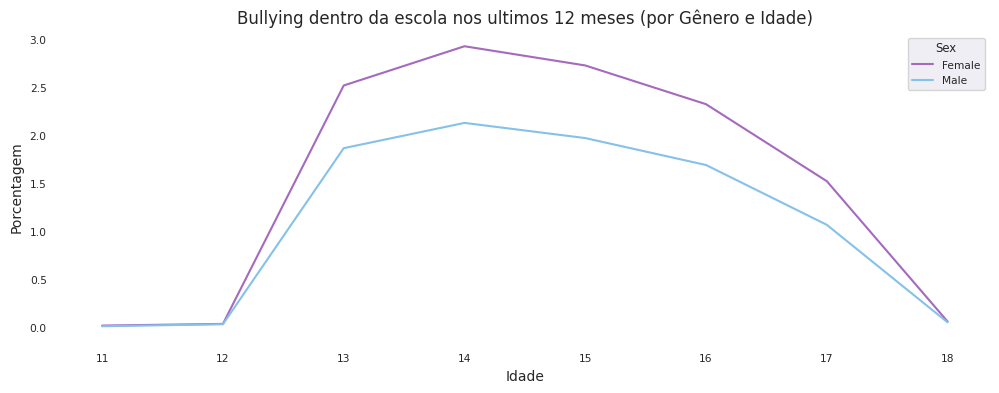

In [ ]:

# Gráfico comparando bullying sofrido por gênero e idade dentro da escola nos últimos 12 meses
grupo = df_categoricos.groupby(['Bullying_escola_ultimos_12_meses', 'Sex', 'Idade']).size().reset_index(name='count')
grupo['percent'] = grupo['count'] / grupo['count'].sum() * 100
grupo_sim = grupo.loc[grupo['Bullying_escola_ultimos_12_meses'] == 'Yes']

plt.figure(figsize=(12, 4))
sns.set_theme(font_scale=0.7)
fig = sns.lineplot(
    data=grupo_sim, x="Idade", y="percent", palette=cores_personalizadas[:2],
    hue="Sex", errorbar=None,
)
fig.set_title('Bullying dentro da escola nos ultimos 12 meses (por Gênero e Idade)', fontsize=12)
fig.set_facecolor('none')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.set_xlabel('Idade', fontsize=10)
fig.set_ylabel('Porcentagem', fontsize=10)
plt.show()

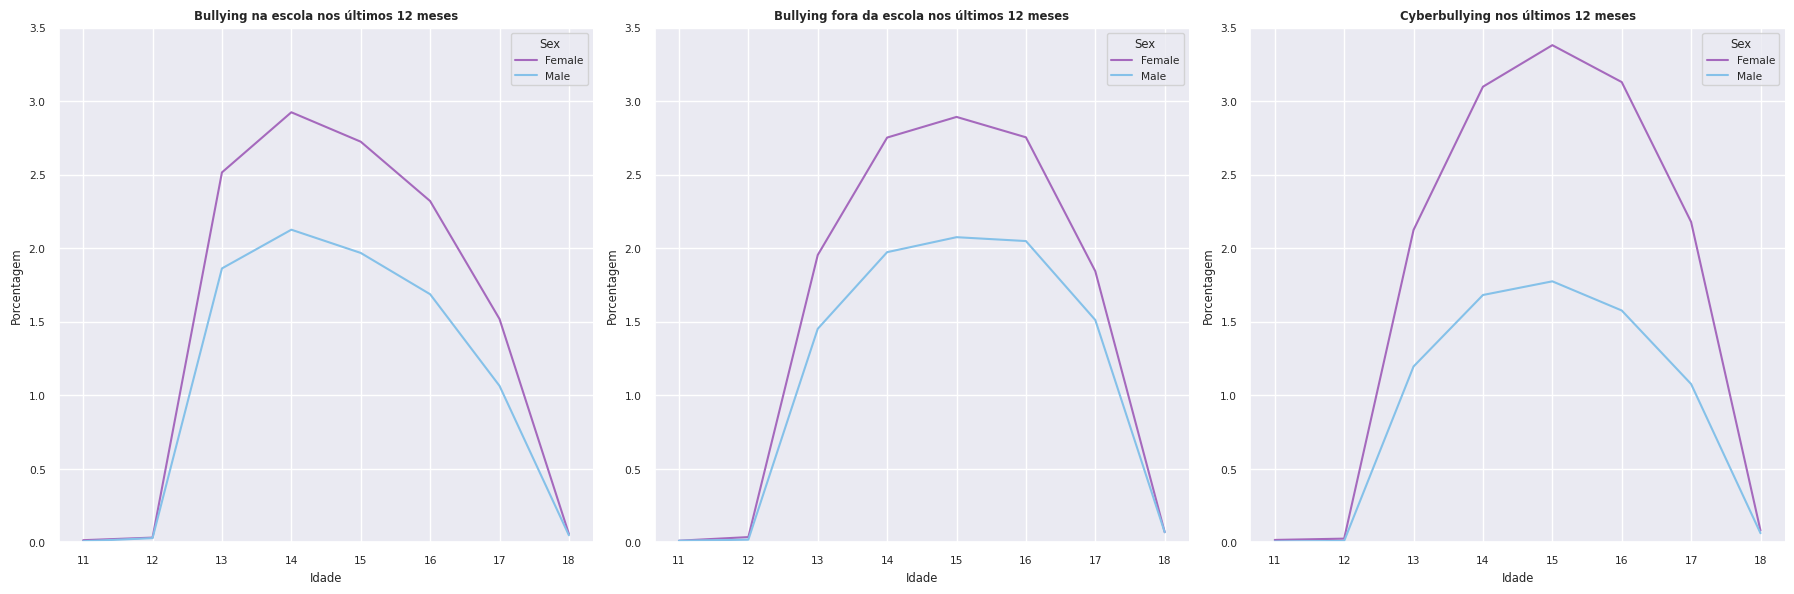

In [ ]:
grupo_escola = df_categoricos.groupby(['Bullying_escola_ultimos_12_meses', 'Sex', 'Idade']).size().reset_index(name='count')
grupo_escola['percent'] = grupo_escola['count'] / grupo_escola['count'].sum() * 100
grupo_escola_sim = grupo_escola.loc[grupo_escola['Bullying_escola_ultimos_12_meses'] == 'Yes']

grupo_fora = df_categoricos.groupby(['Bullying_fora_ultimos_12_meses', 'Sex', 'Idade']).size().reset_index(name='count')
grupo_fora['percent'] = grupo_fora['count'] / grupo_fora['count'].sum() * 100
grupo_fora_sim = grupo_fora.loc[grupo_fora['Bullying_fora_ultimos_12_meses'] == 'Yes']

grupo_cyber = df_categoricos.groupby(['Cyberbullying_ultimos_12_meses', 'Sex', 'Idade']).size().reset_index(name='count')
grupo_cyber['percent'] = grupo_cyber['count'] / grupo_cyber['count'].sum() * 100
grupo_cyber_sim = grupo_cyber.loc[grupo_cyber['Cyberbullying_ultimos_12_meses'] == 'Yes']


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de bullying dentro da escola
sns.lineplot(
    data=grupo_escola_sim, x="Idade", y="percent", hue="Sex",palette=cores_personalizadas[:2], errorbar=None, ax=axes[0]
)
axes[0].set_title('Bullying na escola nos últimos 12 meses',fontweight='bold')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Porcentagem')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].set_ylim(0, 3.5)  # Definindo limite do eixo Y

# Gráfico de bullying fora da escola
sns.lineplot(
    data=grupo_fora_sim, x="Idade", y="percent", hue="Sex",palette=cores_personalizadas[:2], errorbar=None, ax=axes[1]
)
axes[1].set_title('Bullying fora da escola nos últimos 12 meses',fontweight='bold')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Porcentagem')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].set_ylim(0, 3.5)
# Gráfico de cyberbullying
sns.lineplot(
    data=grupo_cyber_sim, x="Idade", y="percent", hue="Sex", palette=cores_personalizadas[:2], errorbar=None, ax=axes[2]
)
axes[2].set_title('Cyberbullying nos últimos 12 meses',fontweight='bold')
axes[2].set_xlabel('Idade')
axes[2].set_ylabel('Porcentagem')
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].set_ylim(0, 3.5)
#axes[2].ylim[(0,3.5)]

# Ajustando o layout para não sobrepor
plt.tight_layout()
plt.show()

Pico dos 14 aos 15 anos, porém começa a diminuir quando vai ficando mais velho

In [ ]:
df_categoricos.columns

Index(['ID', 'Bullying_escola_ultimos_12_meses',
       'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso'],
      dtype='object')

## -> Histogramas e Boxplots
Questão 3

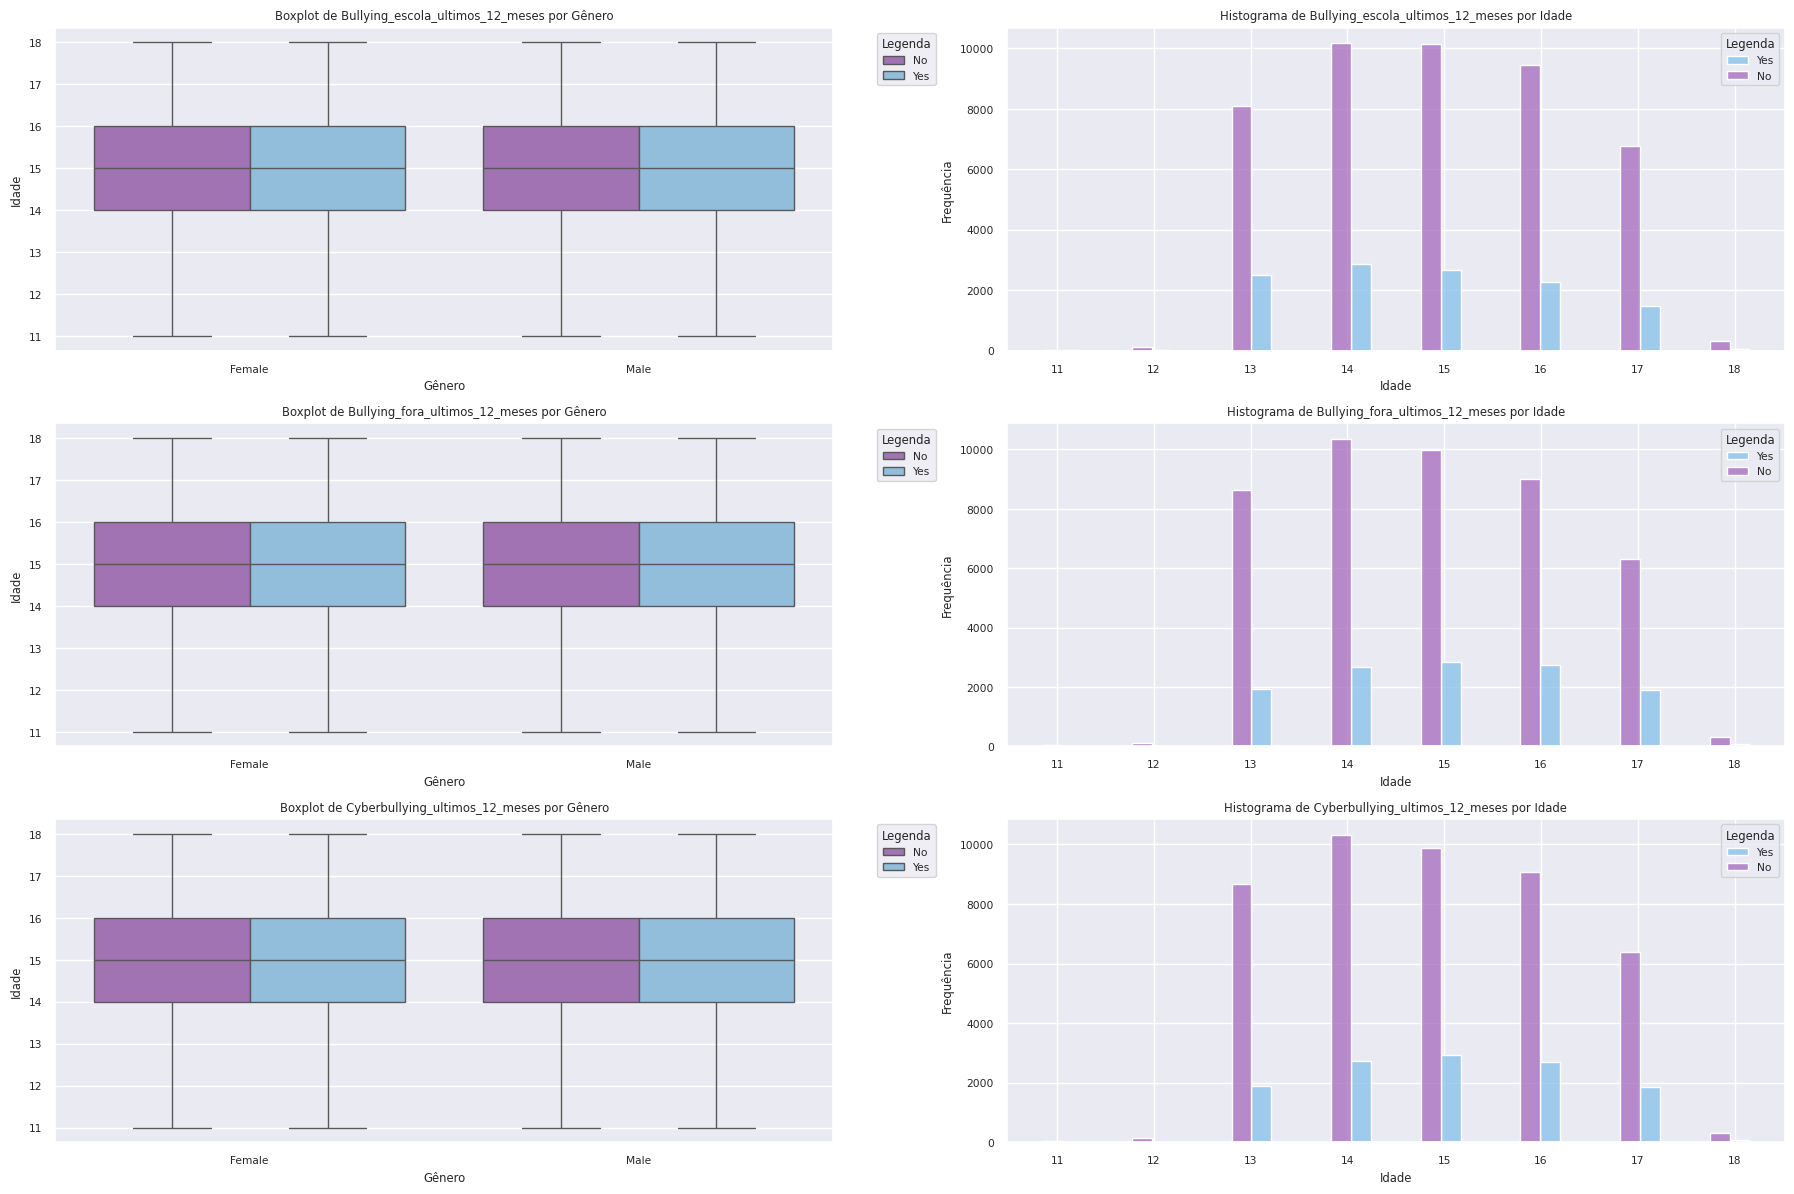

In [ ]:
bullying_variaveis = ['Bullying_escola_ultimos_12_meses','Bullying_fora_ultimos_12_meses','Cyberbullying_ultimos_12_meses']

plt.figure(figsize=(18, 12))

cores_personalizadas = ["#A569BD", "#85C1E9", "#F1948A"]  # Roxo, Azul, Rosa
sns.set_palette(sns.color_palette(cores_personalizadas))

for i, var in enumerate(bullying_variaveis):
    #por gênero
    plt.subplot(len(bullying_variaveis), 2, 2 * i + 1)
    sns.boxplot(x="Sex", y="Idade", hue=var, data=df_categoricos, palette=cores_personalizadas[:2])
    plt.title(f'Boxplot de {var} por Gênero')
    plt.xlabel('Gênero')
    plt.ylabel('Idade')
    plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')
    #plt.legend(title="Legenda", labels=["Yes", "No"])

    #por idade
    plt.subplot(len(bullying_variaveis), 2, 2 * i + 2)
    sns.histplot(data=df_categoricos, x="Idade", hue=var, multiple="dodge", palette=cores_personalizadas[:2], kde=False,shrink=4)
    plt.title(f'Histograma de {var} por Idade')
    plt.xlabel('Idade')
    plt.ylabel('Frequência')
    plt.legend(title="Legenda", labels=["Yes", "No"])

plt.tight_layout()
plt.show()

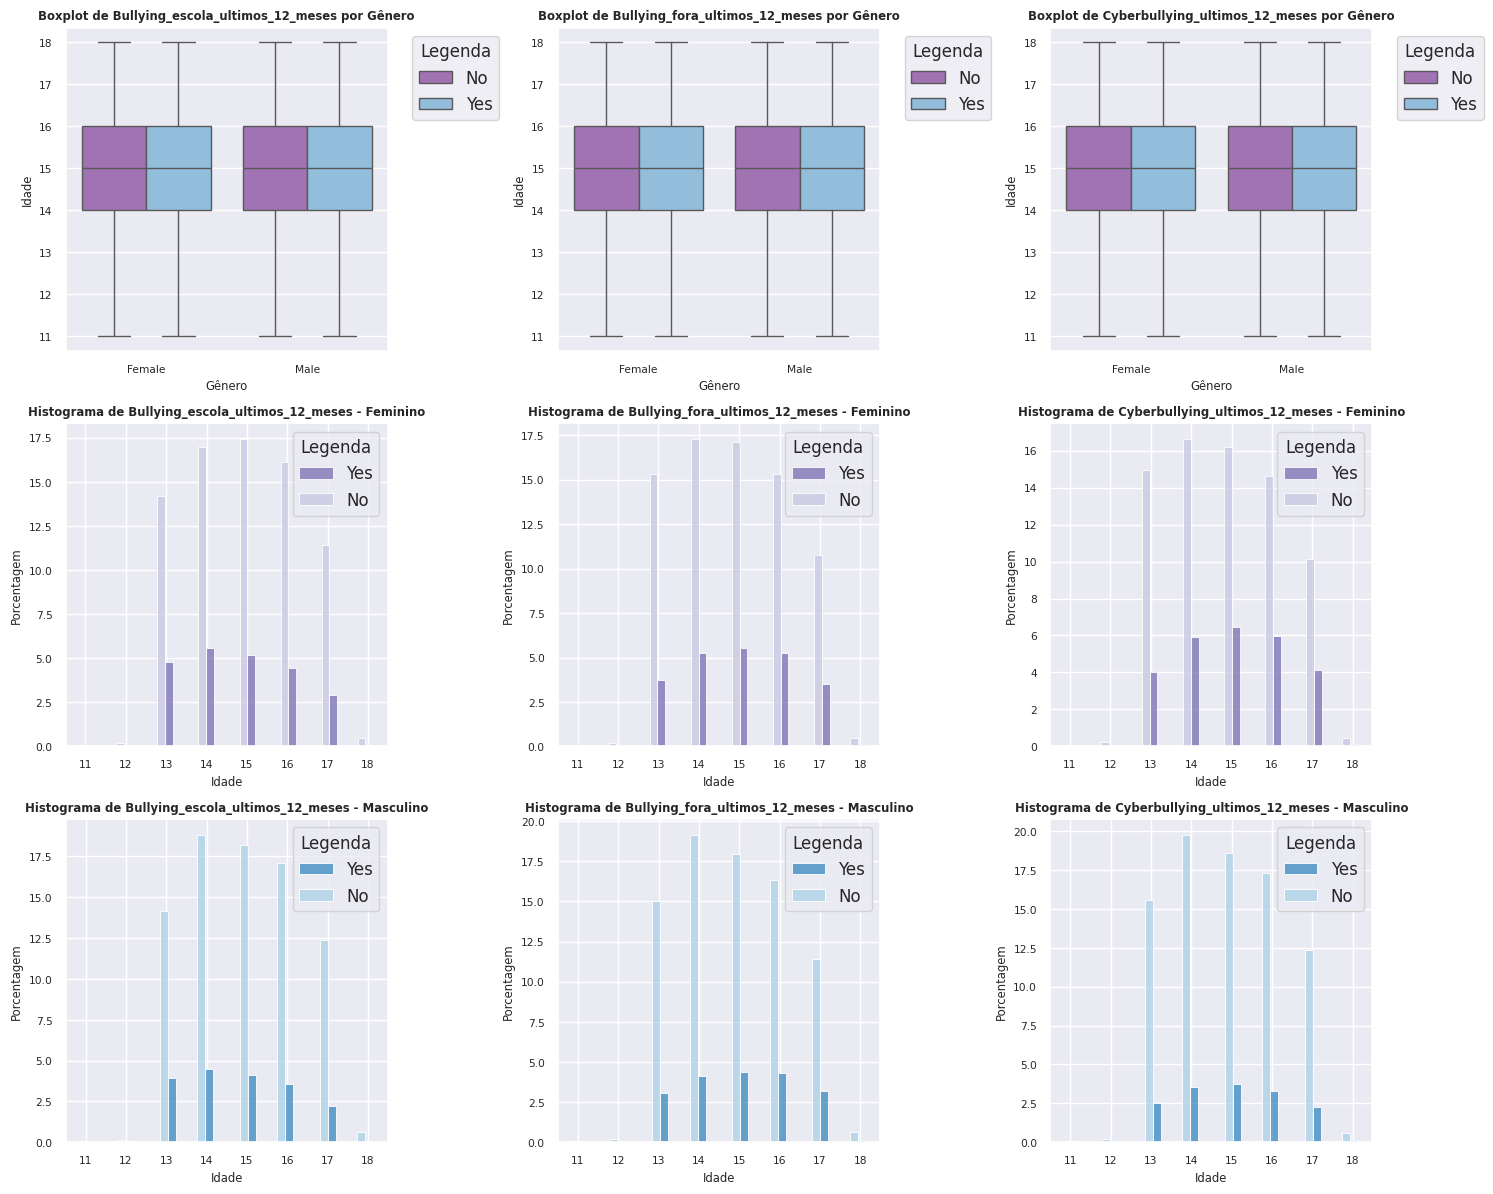

In [ ]:
bullying_variaveis = ['Bullying_escola_ultimos_12_meses', 'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses']

# Figura com tamanho ajustado para comportar 9 gráficos
plt.figure(figsize=(15, 12))

cores_personalizadas = ["#A569BD", "#85C1E9", "#F1948A"]  # Roxo, Azul, Rosa

# Boxplots na primeira linha
for i, var in enumerate(bullying_variaveis):
    plt.subplot(3, 3, i + 1)  # Subplots nas 3 primeiras colunas
    sns.boxplot(
        x="Sex", y="Idade", hue=var, data=df_categoricos, palette=cores_personalizadas[:2]
    )
    plt.title(f'Boxplot de {var} por Gênero',fontweight='bold')
    plt.xlabel('Gênero')
    plt.ylabel('Idade')
    plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left',title_fontsize=12, fontsize=12)

for i, var in enumerate(bullying_variaveis):
    plt.subplot(3, 3, 3 + i + 1)  # Subplots na 2ª linha (colunas 1-3)
    sns.histplot(
        data=df_categoricos[df_categoricos["Sex"] == "Female"],
        x="Idade", hue=var, multiple="dodge", palette="Purples", kde=False, shrink=3, stat="percent")
    plt.title(f'Histograma de {var} - Feminino', fontweight='bold')
    plt.xlabel('Idade')
    plt.ylabel('Porcentagem')
    plt.legend(title="Legenda", labels=["Yes", "No"], title_fontsize=12, fontsize=12)

# Histogramas para gênero masculino (linha 3)
for i, var in enumerate(bullying_variaveis):
    plt.subplot(3, 3, 6 + i + 1)  # Subplots na 3ª linha (colunas 1-3)
    sns.histplot(
        data=df_categoricos[df_categoricos["Sex"] == "Male"],
        x="Idade", hue=var, multiple="dodge", palette='Blues', kde=False, shrink=3, stat="percent"
    )
    plt.title(f'Histograma de {var} - Masculino', fontweight='bold')
    plt.xlabel('Idade')
    plt.ylabel('Porcentagem')
    plt.legend(title="Legenda", labels=["Yes", "No"], title_fontsize=12, fontsize=12)

# Ajustar o layout
plt.tight_layout()
plt.show()


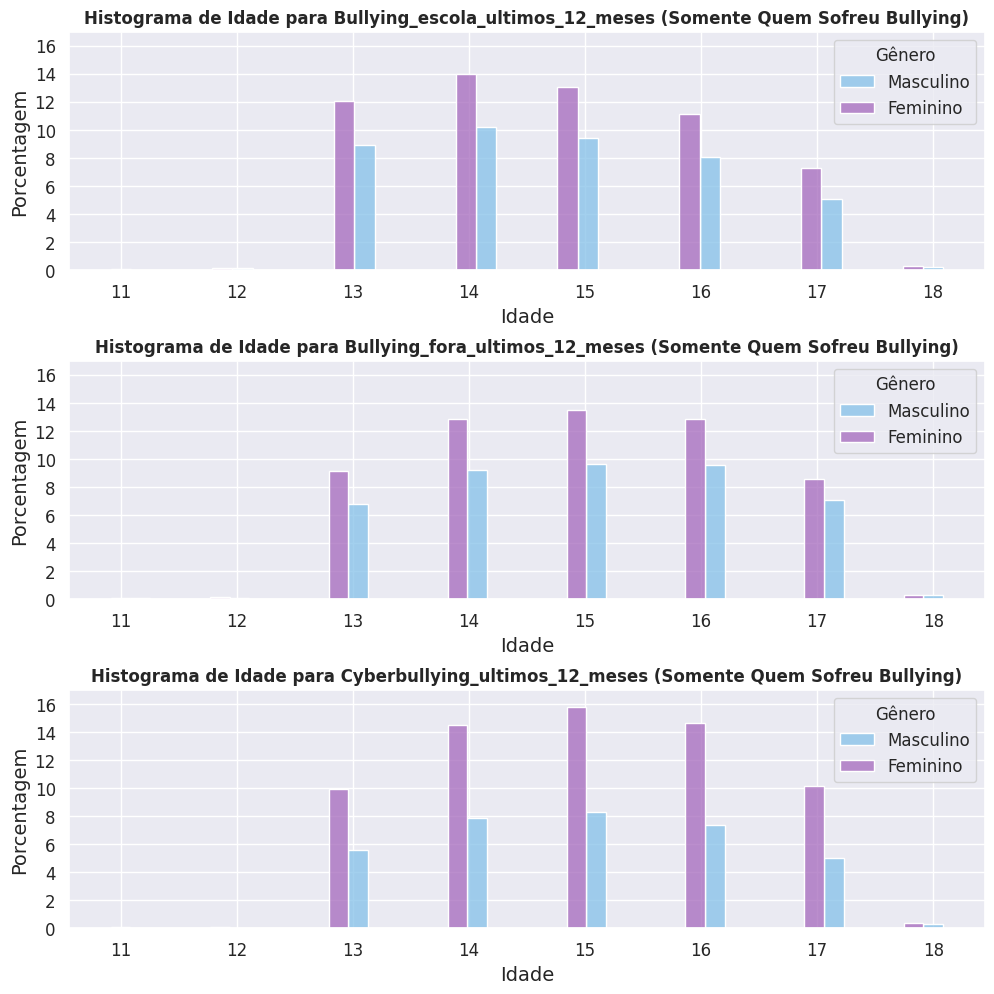

In [ ]:
plt.figure(figsize=(10, 10))  # Altura aumentada para acomodar gráficos empilhados

for i, var in enumerate(bullying_variaveis):
    plt.subplot(3, 1, i + 1)  # 3 linhas, 1 coluna (gráficos empilhados)
    sns.histplot(
        data=df_categoricos[df_categoricos[var] == "Yes"],  # Filtra apenas quem sofreu bullying
        x="Idade", hue="Sex", palette=cores_personalizadas[:2], ####palette={"Female": "purple", "Male": "blue"},
        multiple="dodge", kde=False, stat="percent", shrink=2
    )
    plt.title(f'Histograma de Idade para {var} (Somente Quem Sofreu Bullying)',
              fontsize=12, fontweight='bold')  # Aumenta o título
    plt.xlabel('Idade', fontsize=14)  # Aumenta o rótulo do eixo X
    plt.ylabel('Porcentagem', fontsize=14)  # Aumenta o rótulo do eixo Y
    plt.xticks(fontsize=12)  # Aumenta os ticks do eixo X
    plt.yticks(fontsize=12)  # Aumenta os ticks do eixo Y
    plt.ylim(0,17)

    plt.legend(title="Gênero", labels=["Masculino", "Feminino"], title_fontsize=12, fontsize=12)

plt.tight_layout()
plt.show()


Entre as faixas etárias com quantidade relevante de dados, observa-se uma tendência de redução do bullying dentro da escola à medida que os adolescentes crescem.

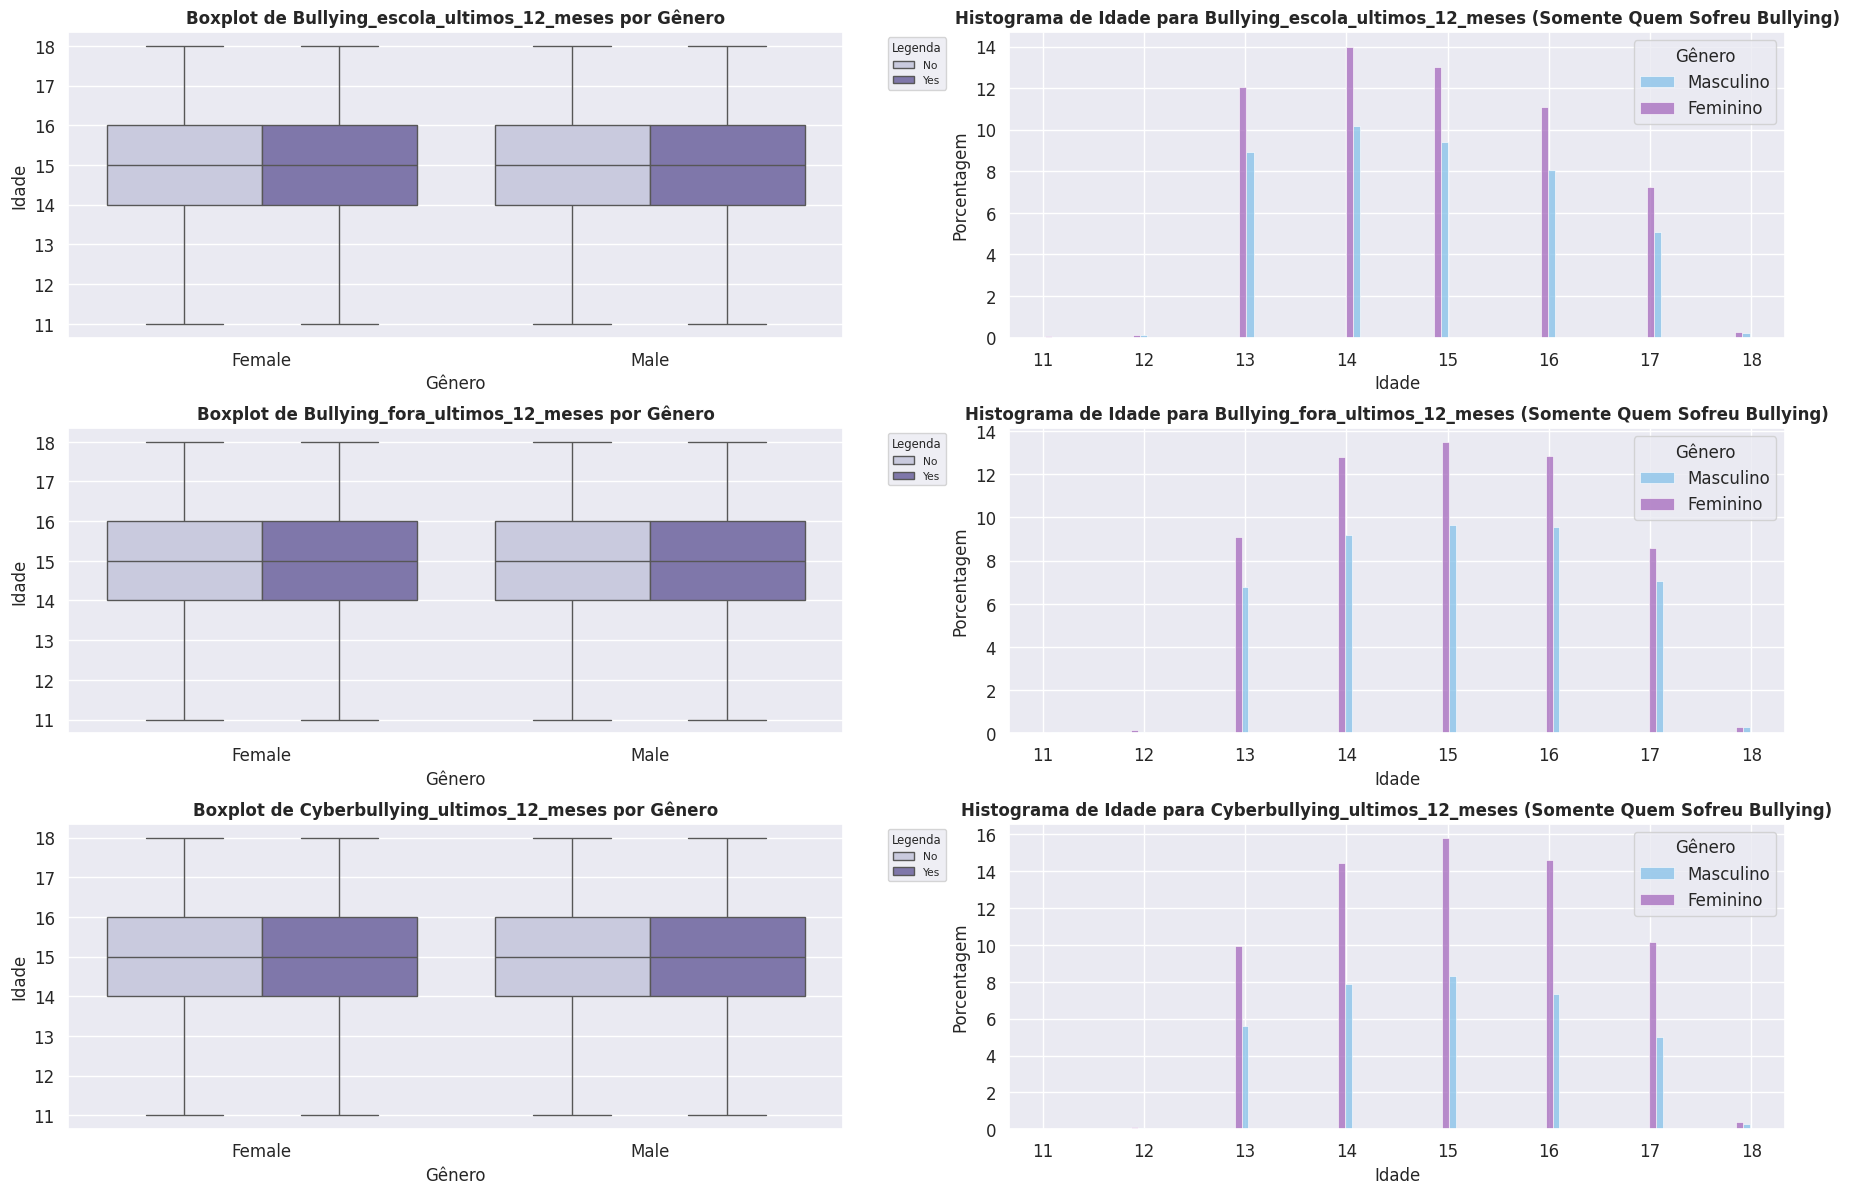

In [ ]:
bullying_variaveis = ['Bullying_escola_ultimos_12_meses','Bullying_fora_ultimos_12_meses','Cyberbullying_ultimos_12_meses']
df_categoricos['Idade'] = df_categoricos['Idade'].astype(float)  # Garantir que a idade está em formato numérico
df_categoricos = df_categoricos.sort_values('Idade')  # Ordenar os valores de Idade

plt.figure(figsize=(18, 12))

cores_personalizadas = ["#A569BD", "#85C1E9", "#F1948A"]  # Roxo, Azul, Rosa
sns.set_palette(sns.color_palette(cores_personalizadas))

for i, var in enumerate(bullying_variaveis):
    #por gênero
    plt.subplot(len(bullying_variaveis), 2, 2 * i + 1)
    sns.boxplot(x="Sex", y="Idade", hue=var, data=df_categoricos, palette='Purples') #,order=sorted(df_categoricos['Idade'].unique())
    plt.title(f'Boxplot de {var} por Gênero',fontsize=12, fontweight='bold')
    plt.xlabel('Gênero', fontsize=12)
    plt.ylabel('Idade', fontsize=12)
    plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')
    #plt.legend(title="Legenda", labels=["Yes", "No"])
    plt.xticks(fontsize=12)  # Aumenta os ticks do eixo X
    plt.yticks(fontsize=12)  # Aumenta os ticks do eixo Y

    #por idade
    plt.subplot(len(bullying_variaveis), 2, 2 * i + 2)
    sns.histplot(data=df_categoricos[df_categoricos[var] == "Yes"],  # Filtra apenas quem sofreu bullying
        x="Idade", hue="Sex", palette=cores_personalizadas[:2], ####palette={"Female": "purple", "Male": "blue"},
        multiple="dodge", kde=False, stat="percent", shrink=0.8)
    plt.title(f'Histograma de Idade para {var} (Somente Quem Sofreu Bullying)',
              fontsize=12, fontweight='bold')  # Aumenta o título
    plt.xlabel('Idade', fontsize=12)  # Aumenta o rótulo do eixo X
    plt.ylabel('Porcentagem', fontsize=12)  # Aumenta o rótulo do eixo Y
    plt.xticks(fontsize=12)  # Aumenta os ticks do eixo X
    plt.yticks(fontsize=12)  # Aumenta os ticks do eixo Y

    plt.legend(title="Gênero", labels=["Masculino", "Feminino"], title_fontsize=12, fontsize=12)

plt.tight_layout()
plt.show()

## Extra: Gráfico de intersecção

- Gráfico de Venn (para visualizar a sobreposição entre os três tipos de bullying)
Um gráfico de Venn pode ser uma maneira interessante de mostrar a interseção entre os três tipos de bullying, ou seja, quantas pessoas sofreram bullying em uma ou mais dessas categorias.

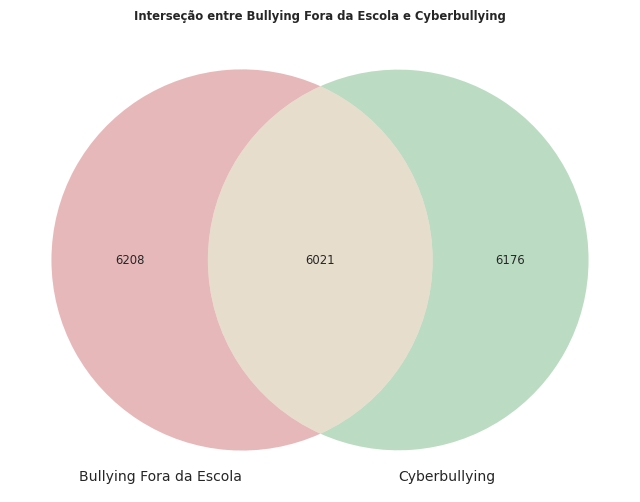

In [ ]:
from matplotlib_venn import venn2

# Calcular o número de pessoas que sofreram cada tipo de bullying
bullying_fora = set(df_categoricos[df_categoricos['Bullying_fora_ultimos_12_meses'] == 'Yes'].index)
cyberbullying = set(df_categoricos[df_categoricos['Cyberbullying_ultimos_12_meses'] == 'Yes'].index)

# Criar o gráfico de Venn para dois conjuntos (bullying fora da escola e cyberbullying)
plt.figure(figsize=(8, 8))
venn2([bullying_fora, cyberbullying],
      set_labels=('Bullying Fora da Escola', 'Cyberbullying'))
plt.title('Interseção entre Bullying Fora da Escola e Cyberbullying', fontweight='bold')
plt.show()

In [ ]:
interseccao = len(bullying_fora.intersection(cyberbullying))

# Exibir o número e a porcentagem
print(f'Pessoas que sofreram bullying fora da escola e cyberbullying: {interseccao}')
print(f'Porcentagem: {interseccao / len(bullying_fora) * 100:.2f}%')

Pessoas que sofreram bullying fora da escola e cyberbullying: 6021
Porcentagem: 49.24%


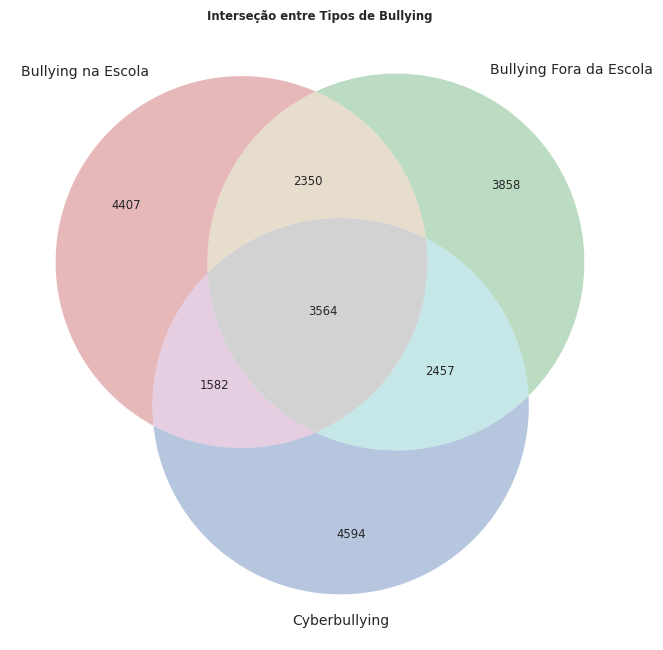

In [ ]:
from matplotlib_venn import venn3

# Calcular o número de pessoas que sofreram diferentes tipos de bullying
bullying_escola = set(df_categoricos[df_categoricos['Bullying_escola_ultimos_12_meses'] == 'Yes'].index)
bullying_fora = set(df_categoricos[df_categoricos['Bullying_fora_ultimos_12_meses'] == 'Yes'].index)
cyberbullying = set(df_categoricos[df_categoricos['Cyberbullying_ultimos_12_meses'] == 'Yes'].index)

# Criar o gráfico de Venn para três conjuntos
plt.figure(figsize=(8, 8))
venn3([bullying_escola, bullying_fora, cyberbullying],
      set_labels=('Bullying na Escola', 'Bullying Fora da Escola', 'Cyberbullying'))
plt.title('Interseção entre Tipos de Bullying', fontweight='bold')
plt.show()

- Área única de "Bullying na Escola": Pessoas que sofreram bullying apenas na escola.
- Área única de "Bullying Fora da Escola": Pessoas que sofreram bullying apenas fora da escola.
- Área única de "Cyberbullying": Pessoas que sofreram apenas cyberbullying.
- Áreas de interseção: Pessoas que sofreram uma combinação de dois ou mais tipos de bullying.

Esse gráfico permite entender a sobreposição entre os tipos de bullying e ver como eles se relacionam. Ele é ótimo para observar padrões e, por exemplo, identificar pessoas que podem ter sofrido de múltiplos tipos de bullying.

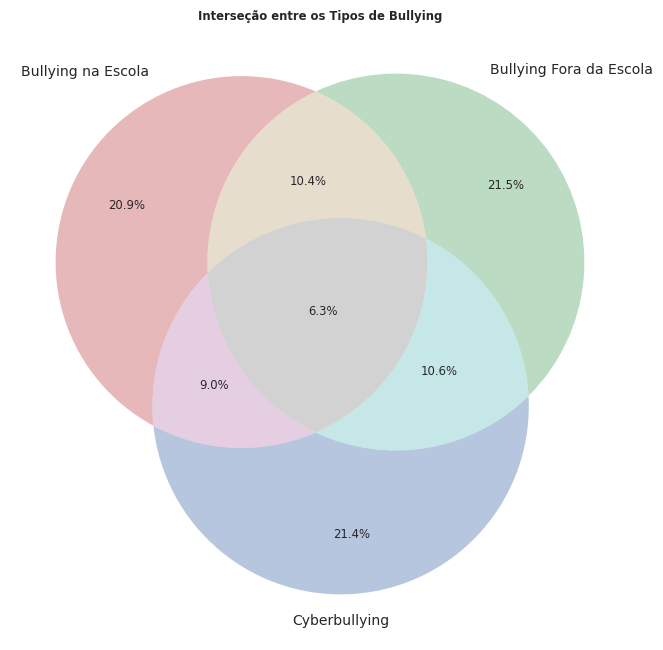

In [ ]:
from matplotlib_venn import venn3

# Calcular o número total de pessoas
total_pessoas = len(df_categoricos)

# Calcular o número de pessoas que sofreram cada tipo de bullying
bullying_escola = set(df_categoricos[df_categoricos['Bullying_escola_ultimos_12_meses'] == 'Yes'].index)
bullying_fora = set(df_categoricos[df_categoricos['Bullying_fora_ultimos_12_meses'] == 'Yes'].index)
cyberbullying = set(df_categoricos[df_categoricos['Cyberbullying_ultimos_12_meses'] == 'Yes'].index)

# Calcular as interseções entre os conjuntos
escola_fora = bullying_escola & bullying_fora
escola_cyber = bullying_escola & cyberbullying
fora_cyber = bullying_fora & cyberbullying
todos_tres = bullying_escola & bullying_fora & cyberbullying

# Calcular as porcentagens
porcentagem_escola = len(bullying_escola) / total_pessoas * 100
porcentagem_fora = len(bullying_fora) / total_pessoas * 100
porcentagem_cyber = len(cyberbullying) / total_pessoas * 100

porcentagem_escola_fora = len(escola_fora) / total_pessoas * 100
porcentagem_escola_cyber = len(escola_cyber) / total_pessoas * 100
porcentagem_fora_cyber = len(fora_cyber) / total_pessoas * 100

porcentagem_todos_tres = len(todos_tres) / total_pessoas * 100

# Criar o gráfico de Venn com as porcentagens
plt.figure(figsize=(8, 8))
venn = venn3([bullying_escola, bullying_fora, cyberbullying],
             set_labels=('Bullying na Escola', 'Bullying Fora da Escola', 'Cyberbullying'))

# Adicionar as porcentagens nas interseções
venn.get_label_by_id('100').set_text(f'{porcentagem_escola:.1f}%')
venn.get_label_by_id('010').set_text(f'{porcentagem_fora:.1f}%')
venn.get_label_by_id('001').set_text(f'{porcentagem_cyber:.1f}%')
venn.get_label_by_id('110').set_text(f'{porcentagem_escola_fora:.1f}%')
venn.get_label_by_id('101').set_text(f'{porcentagem_escola_cyber:.1f}%')
venn.get_label_by_id('011').set_text(f'{porcentagem_fora_cyber:.1f}%')
venn.get_label_by_id('111').set_text(f'{porcentagem_todos_tres:.1f}%')

plt.title('Interseção entre os Tipos de Bullying', fontweight='bold')
plt.show()


In [ ]:
porcentagem_escola = len(bullying_escola) / total_pessoas * 100
porcentagem_escola

20.889419280110914

# ✔️ 2 - Modelo de Regressão Logística:

Lendo os dataframes que serão utilizados na análise: df_final e df_removendo_nulos:

In [ ]:
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

In [ ]:
#lendo os dataframes:
df_removendo_nulos=pd.read_csv('df_removendo_nulos.csv')
df_final=pd.read_csv('df.final.csv')

Iremos realizar a análise em dois dataframes: df_final e df_removendo_nulos tendo no final dois modelos de previsão.



Visualizando dataframe df_final:

In [ ]:
#Visualizando dataframe:
df_final.head(10)

ID  Bullying_escola_ultimos_12_meses  Bullying_fora_ultimos_12_meses  \
0   1                               1.0                             1.0   
1   2                               0.0                             0.0   
2   3                               0.0                             0.0   
3   4                               0.0                             0.0   
4   5                               0.0                             0.0   
5   6                               0.0                             0.0   
6   7                               0.0                             0.0   
7   8                               0.0                             0.0   
8   9                               0.0                             0.0   
9  10                               1.0                             0.0   

   Cyberbullying_ultimos_12_meses  Idade  Sex  Ataque_fisico  Briga_fisica  \
0                             0.0   13.0  0.0            0.0           0.0   
1                             0.0   13.0  0.0            0.0           0.0   
2                             0.0   14.0  1.0            0.0           0.0   
3                             0.0   16.0  1.0            0.0           2.5   
4                             0.0   13.0  0.0            0.0           0.0   
5                             0.0   13.0  1.0            0.0           1.0   
6                             0.0   14.0  0.0            1.0           0.0   
7                             0.0   12.0  0.0            0.0           0.0   
8                             0.0   13.0  1.0            1.0           2.5   
9                             0.0   14.0  0.0            0.0           0.0   

   Sente_solitario  Close_friends  Falta_escola_Sem_permissao  \
0              4.0            2.0                        11.0   
1              0.0            3.0                         0.0   
2              0.0            3.0                         0.0   
3              0.0            3.0                         0.0   
4              1.0            3.0                         0.0   
5              0.0            3.0                         0.0   
6              2.0            3.0                         0.0   
7              1.0            3.0                         0.0   
8              0.0            3.0                         7.5   
9              4.0            0.0                         0.0   

   Outros_alunos_gentis  Pais_entendem_problemas  Sempre_sente_solitario  \
0                   0.0                      4.0                     1.0   
1                   2.0                      4.0                     0.0   
2                   2.0                      4.0                     0.0   
3                   2.0                      4.0                     0.0   
4                   3.0                      3.0                     0.0   
5                   3.0                      4.0                     0.0   
6                   3.0                      4.0                     0.0   
7                   3.0                      0.0                     0.0   
8                   3.0                      3.0                     0.0   
9                   2.0                      0.0                     1.0   

   Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                1.0             0.0            0.0    0.0  
1                                0.0             0.0            0.0    0.0  
2                                0.0             0.0            0.0    0.0  
3                                0.0             0.0            0.0    0.0  
4                                0.0             0.0            0.0    0.0  
5                                0.0             0.0            0.0    0.0  
6                                0.0             0.0            0.0    0.0  
7                                0.0             0.0            0.0    0.0  
8                                1.0             0.0            0.0    0

In [ ]:
#Dando um info:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 56981 non-null  int64  
 1   Bullying_escola_ultimos_12_meses   56981 non-null  float64
 2   Bullying_fora_ultimos_12_meses     56981 non-null  float64
 3   Cyberbullying_ultimos_12_meses     56981 non-null  float64
 4   Idade                              56981 non-null  float64
 5   Sex                                56981 non-null  float64
 6   Ataque_fisico                      56981 non-null  float64
 7   Briga_fisica                       56981 non-null  float64
 8   Sente_solitario                    56981 non-null  float64
 9   Close_friends                      56981 non-null  float64
 10  Falta_escola_Sem_permissao         56981 non-null  float64
 11  Outros_alunos_gentis               56981 non-null  flo

## -> Regressão Logística no Modelo 1: df_final

Modelo 1: usando o df_final

df_final: está todo númerico, os nulos das últimas 3 colunas foram ajustados usando o KNN para prever os valores, já nas demais colunas os nulos foram ajustados para a moda.

In [ ]:
#Importando bibliotecas:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [ ]:
#Verificando colunas:
df_final.columns

Index(['ID', 'Bullying_escola_ultimos_12_meses',
       'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso'],
      dtype='object')

In [ ]:
#Declarando x e y:

X = df_final[['Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso']]
y = df_final['Bullying_escola_ultimos_12_meses']

In [ ]:
#Visualizando X:

X

Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
0                                 1.0                             0.0   13.0   
1                                 0.0                             0.0   13.0   
2                                 0.0                             0.0   14.0   
3                                 0.0                             0.0   16.0   
4                                 0.0                             0.0   13.0   
...                               ...                             ...    ...   
56976                             1.0                             0.0   16.0   
56977                             0.0                             0.0   16.0   
56978                             0.0                             0.0   16.0   
56979                             1.0                             0.0   16.0   
56980                             1.0                             1.0   16.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
0      0.0            0.0           0.0              4.0            2.0   
1      0.0            0.0           0.0              0.0            3.0   
2      1.0            0.0           0.0              0.0            3.0   
3      1.0            0.0           2.5              0.0            3.0   
4      0.0            0.0           0.0              1.0            3.0   
...    ...            ...           ...              ...            ...   
56976  1.0            0.0           4.5              2.0            3.0   
56977  1.0            0.0           0.0              1.0            1.0   
56978  1.0            0.0           0.0              2.0            3.0   
56979  0.0            0.0           0.0              2.0            2.0   
56980  0.0            0.0           0.0              4.0            2.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
0                            11.0                   0.0   
1                             0.0                   2.0   
2                             0.0                   2.0   
3                             0.0                   2.0   
4                             0.0                   3.0   
...                           ...                   ...   
56976                         0.0                   2.0   
56977                         0.0                   2.0   
56978                         0.0                   1.0   
56979                         0.0                   3.0   
56980                         1.5                   1.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
0                          4.0                     1.0   
1                          4.0                     0.0   
2                          4.0                     0.0   
3                          4.0                     0.0   
4                          3.0                     0.0   
...                        ...                     ...   
56976                      2.0                     0.0   
56977                      0.0                     0.0   
56978                      2.0                     0.0   
56979                      1.0                     0.0   
56980                      0.0                     1.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                    1.0             0.0            0.0    0.0  
1                                    0.0             0.0            0.0    0.0  
2                                    0.0             0.0            0.0    0.0  
3                                    0.0             0.0            0.0    0.0  
4                                    0.0             0.0            0.0    0.0  
...                                  ...             ...            ...    ...  
56976                                0.0             0.0            1.0    0.0  
56977                                0.0             0.0            0.0    0.0  
56978     

In [ ]:
#Visualizando y:
y

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
56976    0.0
56977    0.0
56978    0.0
56979    0.0
56980    0.0
Name: Bullying_escola_ultimos_12_meses, Length: 56981, dtype: float64

In [ ]:
#Dividindo os dados em treino e teste:
#separacao dos dados deixando 80% treino 20% teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# fit do modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)#aqui fito 80%, 20%

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Verificando informações das bases de treino e teste:
X_train.info()

#45584 linhas e 16 colunas

<class 'pandas.core.frame.DataFrame'>
Index: 45584 entries, 29716 to 56422
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bullying_fora_ultimos_12_meses     45584 non-null  float64
 1   Cyberbullying_ultimos_12_meses     45584 non-null  float64
 2   Idade                              45584 non-null  float64
 3   Sex                                45584 non-null  float64
 4   Ataque_fisico                      45584 non-null  float64
 5   Briga_fisica                       45584 non-null  float64
 6   Sente_solitario                    45584 non-null  float64
 7   Close_friends                      45584 non-null  float64
 8   Falta_escola_Sem_permissao         45584 non-null  float64
 9   Outros_alunos_gentis               45584 non-null  float64
 10  Pais_entendem_problemas            45584 non-null  float64
 11  Sempre_sente_solitario             45584 non-null  floa

In [ ]:
X_test.info()

#11397 linhas e 16 colunas

<class 'pandas.core.frame.DataFrame'>
Index: 11397 entries, 41847 to 7439
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bullying_fora_ultimos_12_meses     11397 non-null  float64
 1   Cyberbullying_ultimos_12_meses     11397 non-null  float64
 2   Idade                              11397 non-null  float64
 3   Sex                                11397 non-null  float64
 4   Ataque_fisico                      11397 non-null  float64
 5   Briga_fisica                       11397 non-null  float64
 6   Sente_solitario                    11397 non-null  float64
 7   Close_friends                      11397 non-null  float64
 8   Falta_escola_Sem_permissao         11397 non-null  float64
 9   Outros_alunos_gentis               11397 non-null  float64
 10  Pais_entendem_problemas            11397 non-null  float64
 11  Sempre_sente_solitario             11397 non-null  float

In [ ]:
y_train.info()

#45584 linhas e 1 coluna: Bullying_escola_ultimos_12_meses

<class 'pandas.core.series.Series'>
Index: 45584 entries, 29716 to 56422
Series name: Bullying_escola_ultimos_12_meses
Non-Null Count  Dtype  
--------------  -----  
45584 non-null  float64
dtypes: float64(1)
memory usage: 712.2 KB


In [ ]:
y_test.info()

#11397 linhas e 1 coluna: Bullying_escola_ultimos_12_meses

<class 'pandas.core.series.Series'>
Index: 11397 entries, 41847 to 7439
Series name: Bullying_escola_ultimos_12_meses
Non-Null Count  Dtype  
--------------  -----  
11397 non-null  float64
dtypes: float64(1)
memory usage: 178.1 KB


In [ ]:
#vamos agora aplicar o modelo fitado na base de teste (que é a X_test com variáveis explicativas 20%) e realizar a previsão:

y_pred = logreg.predict(X_test) ### aplicacao do modelo
y_pred_proba = logreg.predict_proba(X_test)[:, 1] ### previsao da probabilidade

In [ ]:
##### mostrando o output
X_test["Previsao_Modelo"] = y_pred
X_test["Probabilidade_bullying_escola"] = y_pred_proba

In [ ]:
#Verificando dataframe com previsão e probabilidade:
X_test

Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
41847                             0.0                             0.0   17.0   
31363                             0.0                             0.0   16.0   
18780                             0.0                             0.0   13.0   
6948                              0.0                             1.0   14.0   
28187                             0.0                             0.0   16.0   
...                               ...                             ...    ...   
7916                              0.0                             0.0   15.0   
46027                             1.0                             1.0   15.0   
13966                             0.0                             0.0   13.0   
32087                             0.0                             0.0   13.0   
7439                              0.0                             0.0   13.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
41847  0.0            0.0           0.0              3.0            3.0   
31363  0.0            0.0           0.0              2.0            3.0   
18780  1.0            0.0           2.5              0.0            3.0   
6948   0.0            0.0           1.0              2.0            3.0   
28187  1.0            0.0           0.0              1.0            1.0   
...    ...            ...           ...              ...            ...   
7916   1.0            0.0           0.0              1.0            3.0   
46027  0.0            0.0           0.0              2.0            3.0   
13966  1.0            0.0           1.0              0.0            3.0   
32087  1.0            0.0           0.0              1.0            3.0   
7439   1.0            0.0           0.0              0.0            3.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
41847                         0.0                   3.0   
31363                         0.0                   3.0   
18780                         0.0                   1.0   
6948                          1.5                   3.0   
28187                         0.0                   4.0   
...                           ...                   ...   
7916                          0.0                   3.0   
46027                         0.0                   1.0   
13966                         0.0                   2.0   
32087                         0.0                   2.0   
7439                          0.0                   0.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
41847                      1.0                     1.0   
31363                      3.0                     0.0   
18780                      1.0                     0.0   
6948                       0.0                     0.0   
28187                      0.0                     0.0   
...                        ...                     ...   
7916                       1.0                     0.0   
46027                      0.0                     0.0   
13966                      4.0                     0.0   
32087                      3.0                     0.0   
7439                       4.0                     0.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  \
41847                                0.0             1.0            0.0   
31363                                0.0             0.0            0.0   
18780                                0.0             0.0            1.0   
6948                                 1.0             0.0            0.0   
28187                                0.0             0.0            0.0   
...                                  ...             ...            ...   
7916                                 0.0             0.0            1.0   
46027                                0.0             0.0            0.0   
13966                                0.0             0.0        

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11397 entries, 41847 to 7439
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bullying_fora_ultimos_12_meses     11397 non-null  float64
 1   Cyberbullying_ultimos_12_meses     11397 non-null  float64
 2   Idade                              11397 non-null  float64
 3   Sex                                11397 non-null  float64
 4   Ataque_fisico                      11397 non-null  float64
 5   Briga_fisica                       11397 non-null  float64
 6   Sente_solitario                    11397 non-null  float64
 7   Close_friends                      11397 non-null  float64
 8   Falta_escola_Sem_permissao         11397 non-null  float64
 9   Outros_alunos_gentis               11397 non-null  float64
 10  Pais_entendem_problemas            11397 non-null  float64
 11  Sempre_sente_solitario             11397 non-null  float

### Performance do Modelo 1

In [ ]:
#Importando biblioteca:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
#Verificando número de linhas de y_pred
num_values_y_pred = len(y_pred)
num_values_y_pred

11397

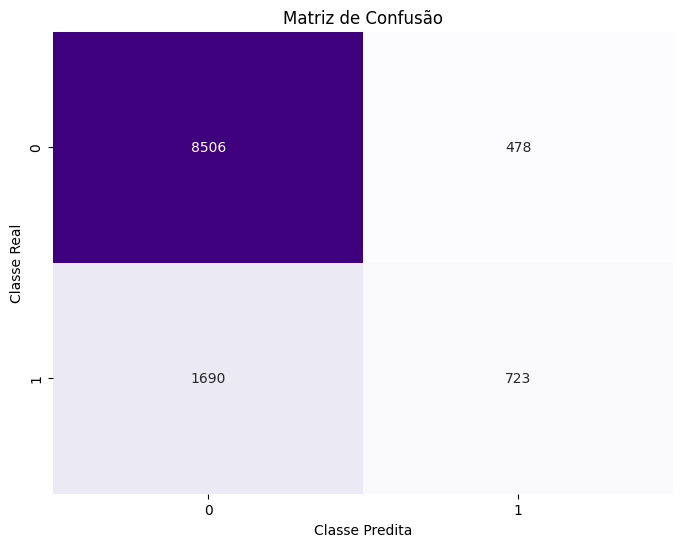

Acurácia: 0.8097745020619461
Precisão: 0.6019983347210658
Recall: 0.2996270203066722


In [ ]:
# Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred) #y_test é df com a variável target 20% e
                                      #y_pred é df com a variável target vindo
                                      #da coluna Previsao_modelo que foi prevista no X_test

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred) #acurácia
precision = precision_score(y_test, y_pred) #precisão
recall = recall_score(y_test, y_pred)#recall

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Lendo a matriz de confusão:

- Sofrem bullying na escola - dos que sofreram bullying na escola que meu modelo previu 723 (VERDADEIRO POSITIVO) que efetivamente sofreram e 1690 previu como se não tivessem sofrido(FALSO POSITIVO)mas sofreram.

- Não sofreram bullying na escola- dos que não sofreram bullying na escola que meu modelo previu, 8506 (VERDADEIRO NEGATIVO) efetivamente não sofreram e 478 previu como se tivessem sofrido (FALSO NEGATIVO) mas não sofreram.

Então dos 2413 totais que sofreram bullying meu modelo previu 723 corretamente;

E dos 8984 que não sofreram meu modelo previu 8506 corretamente;

E apresentou um total de 1690 falsos positivos.

### Análise das variáveis mais relevantes do Modelo 1

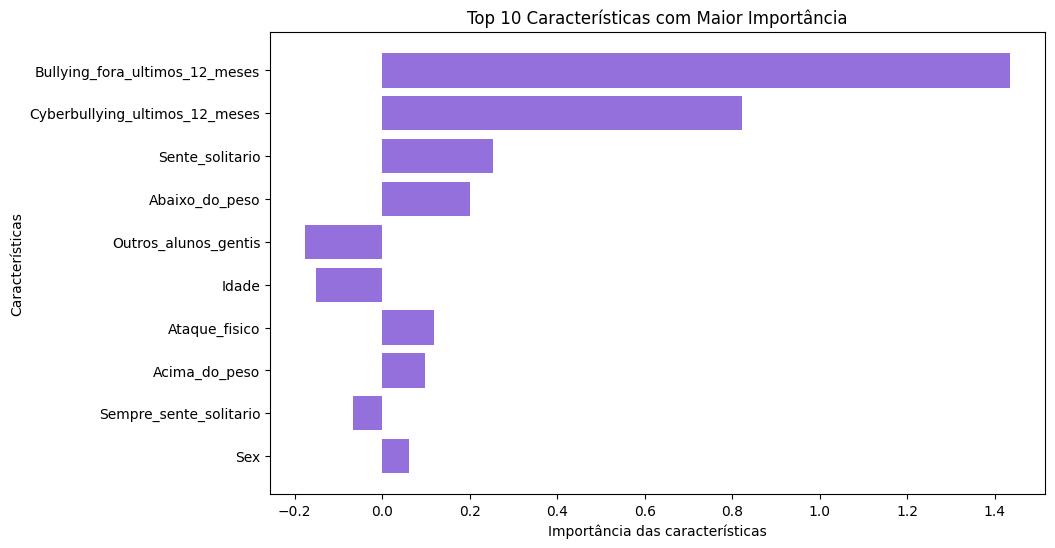

In [ ]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients = logreg.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes
indices = np.argsort(np.abs(coefficients))

# Top 10 características com maior importância
top_features = feature_names[indices][-10:]
top_importances = coefficients[indices][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,6))
plt.barh(top_features, top_importances, color='#9370DB')
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância')
plt.show()

Análise das variáveis mais relevantes do Modelo 1:

1. Bullying_fora_ultimos_12_meses
Esta é a característica com maior importância no modelo, indicando que o bullying fora dos últimos 12 meses é um fator muito relevante.

2. Cyberbullying_ultimos_12_meses
Outra característica de grande importância é o cyberbullying nos últimos 12 meses, mostrando que esse tipo de comportamento também é um fator relevante no modelo.

3. Sente_solitario
O sentimento de solidão aparece como a terceira característica mais importante, sugerindo que esse é um fator significativo no modelo.

4. Abaixo_do_peso
A característica "abaixo do peso" também possui uma importância relevante, indicando que o peso corporal é um aspecto a ser considerado.

5. Ataque_fisico: Ter sofrido ataque físico também é uma variável relevante.

6. Acima_do_peso: Estar acima do peso também é uma variável relevante.

7. Sexo: Ser do sexo feminino ou masculino também é uma variável relevante.


Em resumo, as variáveis mais importantes parecem estar relacionadas a diferentes formas de bullying (fora da escola, cibernético), sentimentos de solidão e aspectos físicos como peso corporal, seguida de ataque físico, estar acima do peso e sexo. Essas características devem ser consideradas como fatores-chave no modelo analisado.

## -> Regressão Logística no Modelo 2: df_removendo_nulos

Agora vamos repetir o processo com o outro dataframe:

Modelo 2: usando o df_removendo_nulos

df_removendo_nulos: dataframe todo em numérico, os nulos das demais colunas foram ajustados para a moda, já nas últimas 3 colunas as linhas que continham nulos foram removidas.

In [ ]:
#Visualizando dataframe:
df_removendo_nulos.head(10)

ID  Bullying_escola_ultimos_12_meses  Bullying_fora_ultimos_12_meses  \
0   3                               0.0                             0.0   
1   4                               0.0                             0.0   
2   6                               0.0                             0.0   
3  11                               0.0                             0.0   
4  14                               0.0                             0.0   
5  15                               0.0                             0.0   
6  23                               0.0                             0.0   
7  24                               0.0                             0.0   
8  29                               0.0                             0.0   
9  32                               0.0                             0.0   

   Cyberbullying_ultimos_12_meses  Idade  Sex  Ataque_fisico  Briga_fisica  \
0                             0.0   14.0  1.0            0.0           0.0   
1                             0.0   16.0  1.0            0.0           2.5   
2                             0.0   13.0  1.0            0.0           1.0   
3                             0.0   15.0  1.0            0.0           1.0   
4                             0.0   14.0  0.0            0.0           0.0   
5                             0.0   14.0  0.0            0.0           0.0   
6                             1.0   13.0  1.0            0.0           2.5   
7                             0.0   14.0  1.0            0.0           2.5   
8                             0.0   14.0  1.0            0.0           2.5   
9                             0.0   13.0  0.0            0.0           0.0   

   Sente_solitario  Close_friends  Falta_escola_Sem_permissao  \
0              0.0            3.0                         0.0   
1              0.0            3.0                         0.0   
2              0.0            3.0                         0.0   
3              0.0            3.0                         4.0   
4              1.0            3.0                         0.0   
5              3.0            3.0                         0.0   
6              3.0            3.0                         0.0   
7              3.0            2.0                         0.0   
8              0.0            3.0                         0.0   
9              0.0            3.0                         0.0   

   Outros_alunos_gentis  Pais_entendem_problemas  Sempre_sente_solitario  \
0                   2.0                      4.0                     0.0   
1                   2.0                      4.0                     0.0   
2                   3.0                      4.0                     0.0   
3                   3.0                      4.0                     0.0   
4                   3.0                      4.0                     0.0   
5                   2.0                      0.0                     1.0   
6                   1.0                      4.0                     1.0   
7                   4.0                      2.0                     1.0   
8                   1.0                      4.0                     0.0   
9                   3.0                      4.0                     0.0   

   Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                0.0             0.0            0.0    0.0  
1                                0.0             0.0            0.0    0.0  
2                                0.0             0.0            0.0    0.0  
3                                1.0             0.0            0.0    0.0  
4                                0.0             0.0            0.0    0.0  
5                                0.0             0.0            0.0    0.0  
6                                0.0             0.0            0.0    0.0  
7                                0.0             0.0            1.0    1.0  
8                                0.0             0.0            0.0    0

In [ ]:
#Dando um info():
df_removendo_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36052 entries, 0 to 36051
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 36052 non-null  int64  
 1   Bullying_escola_ultimos_12_meses   36052 non-null  float64
 2   Bullying_fora_ultimos_12_meses     36052 non-null  float64
 3   Cyberbullying_ultimos_12_meses     36052 non-null  float64
 4   Idade                              36052 non-null  float64
 5   Sex                                36052 non-null  float64
 6   Ataque_fisico                      36052 non-null  float64
 7   Briga_fisica                       36052 non-null  float64
 8   Sente_solitario                    36052 non-null  float64
 9   Close_friends                      36052 non-null  float64
 10  Falta_escola_Sem_permissao         36052 non-null  float64
 11  Outros_alunos_gentis               36052 non-null  flo

In [ ]:
#Visualizando colunas
df_removendo_nulos.columns

Index(['ID', 'Bullying_escola_ultimos_12_meses',
       'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso'],
      dtype='object')

In [ ]:
#Declarando x e y:

X_nulos = df_removendo_nulos[['Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso']]
y_nulos = df_removendo_nulos['Bullying_escola_ultimos_12_meses']

In [ ]:
#Visualizando X:

X_nulos

Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
0                                 0.0                             0.0   14.0   
1                                 0.0                             0.0   16.0   
2                                 0.0                             0.0   13.0   
3                                 0.0                             0.0   15.0   
4                                 0.0                             0.0   14.0   
...                               ...                             ...    ...   
36047                             1.0                             0.0   16.0   
36048                             0.0                             0.0   16.0   
36049                             0.0                             1.0   15.0   
36050                             1.0                             0.0   16.0   
36051                             1.0                             1.0   16.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
0      1.0            0.0           0.0              0.0            3.0   
1      1.0            0.0           2.5              0.0            3.0   
2      1.0            0.0           1.0              0.0            3.0   
3      1.0            0.0           1.0              0.0            3.0   
4      0.0            0.0           0.0              1.0            3.0   
...    ...            ...           ...              ...            ...   
36047  1.0            0.0           0.0              1.0            3.0   
36048  1.0            0.0           2.5              0.0            3.0   
36049  1.0            0.0           2.5              1.0            3.0   
36050  1.0            0.0           4.5              2.0            3.0   
36051  0.0            0.0           0.0              4.0            2.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
0                             0.0                   2.0   
1                             0.0                   2.0   
2                             0.0                   3.0   
3                             4.0                   3.0   
4                             0.0                   3.0   
...                           ...                   ...   
36047                         4.0                   1.0   
36048                         0.0                   2.0   
36049                         0.0                   3.0   
36050                         0.0                   2.0   
36051                         1.5                   1.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
0                          4.0                     0.0   
1                          4.0                     0.0   
2                          4.0                     0.0   
3                          4.0                     0.0   
4                          4.0                     0.0   
...                        ...                     ...   
36047                      3.0                     0.0   
36048                      4.0                     0.0   
36049                      2.0                     0.0   
36050                      2.0                     0.0   
36051                      0.0                     1.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                    0.0             0.0            0.0    0.0  
1                                    0.0             0.0            0.0    0.0  
2                                    0.0             0.0            0.0    0.0  
3                                    1.0             0.0            0.0    0.0  
4                                    0.0             0.0            0.0    0.0  
...                                  ...             ...            ...    ...  
36047                                1.0             0.0            0.0    0.0  
36048                                0.0             0.0            0.0    0.0  
36049     

In [ ]:
#Visualizando y:

y_nulos

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
36047    0.0
36048    0.0
36049    0.0
36050    0.0
36051    0.0
Name: Bullying_escola_ultimos_12_meses, Length: 36052, dtype: float64

In [ ]:
#Dividindo os dados em treino e teste:
#separacao dos dados deixando 80% treino 20% teste

X_nulos_train, X_nulos_test, y_nulos_train, y_nulos_test = train_test_split(X_nulos, y_nulos, test_size=0.2, random_state=42)

In [ ]:
# fit do modelo
model_nulos = LogisticRegression()
model_nulos.fit(X_nulos_train, y_nulos_train)#aqui fito 80%, 20%

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Verificando informações das bases de treino e teste:
X_nulos_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28841 entries, 21436 to 15795
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bullying_fora_ultimos_12_meses     28841 non-null  float64
 1   Cyberbullying_ultimos_12_meses     28841 non-null  float64
 2   Idade                              28841 non-null  float64
 3   Sex                                28841 non-null  float64
 4   Ataque_fisico                      28841 non-null  float64
 5   Briga_fisica                       28841 non-null  float64
 6   Sente_solitario                    28841 non-null  float64
 7   Close_friends                      28841 non-null  float64
 8   Falta_escola_Sem_permissao         28841 non-null  float64
 9   Outros_alunos_gentis               28841 non-null  float64
 10  Pais_entendem_problemas            28841 non-null  float64
 11  Sempre_sente_solitario             28841 non-null  floa

In [ ]:
#Verificando base de treino X com variáveis categóricas 80%
X_nulos_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28841 entries, 21436 to 15795
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bullying_fora_ultimos_12_meses     28841 non-null  float64
 1   Cyberbullying_ultimos_12_meses     28841 non-null  float64
 2   Idade                              28841 non-null  float64
 3   Sex                                28841 non-null  float64
 4   Ataque_fisico                      28841 non-null  float64
 5   Briga_fisica                       28841 non-null  float64
 6   Sente_solitario                    28841 non-null  float64
 7   Close_friends                      28841 non-null  float64
 8   Falta_escola_Sem_permissao         28841 non-null  float64
 9   Outros_alunos_gentis               28841 non-null  float64
 10  Pais_entendem_problemas            28841 non-null  float64
 11  Sempre_sente_solitario             28841 non-null  floa

In [ ]:
#Verificando base de teste X com variáveis categóricas 20%
X_nulos_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7211 entries, 22839 to 16325
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bullying_fora_ultimos_12_meses     7211 non-null   float64
 1   Cyberbullying_ultimos_12_meses     7211 non-null   float64
 2   Idade                              7211 non-null   float64
 3   Sex                                7211 non-null   float64
 4   Ataque_fisico                      7211 non-null   float64
 5   Briga_fisica                       7211 non-null   float64
 6   Sente_solitario                    7211 non-null   float64
 7   Close_friends                      7211 non-null   float64
 8   Falta_escola_Sem_permissao         7211 non-null   float64
 9   Outros_alunos_gentis               7211 non-null   float64
 10  Pais_entendem_problemas            7211 non-null   float64
 11  Sempre_sente_solitario             7211 non-null   float

In [ ]:
#Verificando base de treino X com variável target 80%
y_nulos_train.info()

<class 'pandas.core.series.Series'>
Index: 28841 entries, 21436 to 15795
Series name: Bullying_escola_ultimos_12_meses
Non-Null Count  Dtype  
--------------  -----  
28841 non-null  float64
dtypes: float64(1)
memory usage: 450.6 KB


In [ ]:
#Verificando base de teste X com variável target 20%
y_nulos_test.info()

<class 'pandas.core.series.Series'>
Index: 7211 entries, 22839 to 16325
Series name: Bullying_escola_ultimos_12_meses
Non-Null Count  Dtype  
--------------  -----  
7211 non-null   float64
dtypes: float64(1)
memory usage: 112.7 KB


In [ ]:
#vamos agora aplicar o modelo fitado na base de teste (que é a X_test com variáveis explicativas 20%) e realizar a previsão:

y_nulos_pred = model_nulos.predict(X_nulos_test) ### aplicacao do modelo
y_nulos_pred_proba = model_nulos.predict_proba(X_nulos_test)[:, 1] ### previsao da probabilidade

In [ ]:
##### mostrando o output
X_nulos_test["Previsao_Modelo"] = y_nulos_pred
X_nulos_test["Probabilidade_bullying_escola"] = y_nulos_pred_proba

In [ ]:
#Visualizando dataframe com as previsões e probabilidade:
X_nulos_test

Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
22839                             0.0                             0.0   16.0   
9480                              0.0                             0.0   15.0   
24283                             0.0                             0.0   13.0   
12325                             0.0                             0.0   14.0   
29938                             1.0                             0.0   17.0   
...                               ...                             ...    ...   
20838                             0.0                             0.0   13.0   
8618                              0.0                             0.0   17.0   
28241                             0.0                             0.0   14.0   
16852                             0.0                             0.0   13.0   
16325                             0.0                             1.0   16.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
22839  0.0            0.0           0.0              1.0            3.0   
9480   0.0            0.0           2.5              0.0            3.0   
24283  1.0            0.0           0.0              0.0            3.0   
12325  0.0            0.0           0.0              0.0            3.0   
29938  0.0            0.0           0.0              0.0            3.0   
...    ...            ...           ...              ...            ...   
20838  0.0            4.5           2.5              2.0            3.0   
8618   0.0            0.0           0.0              2.0            3.0   
28241  0.0            0.0           0.0              1.0            3.0   
16852  1.0            0.0           0.0              0.0            0.0   
16325  1.0            0.0           0.0              2.0            0.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
22839                         0.0                   2.0   
9480                          1.5                   4.0   
24283                         0.0                   3.0   
12325                         0.0                   0.0   
29938                         0.0                   2.0   
...                           ...                   ...   
20838                         0.0                   2.0   
8618                          0.0                   4.0   
28241                         0.0                   3.0   
16852                         0.0                   1.0   
16325                         4.0                   3.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
22839                      1.0                     0.0   
9480                       1.0                     0.0   
24283                      2.0                     0.0   
12325                      0.0                     0.0   
29938                      3.0                     0.0   
...                        ...                     ...   
20838                      1.0                     0.0   
8618                       1.0                     0.0   
28241                      4.0                     0.0   
16852                      2.0                     0.0   
16325                      1.0                     0.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  \
22839                                0.0             0.0            1.0   
9480                                 1.0             0.0            0.0   
24283                                0.0             0.0            0.0   
12325                                0.0             0.0            0.0   
29938                                0.0             0.0            0.0   
...                                  ...             ...            ...   
20838                                0.0             0.0            0.0   
8618                                 0.0             0.0            0.0   
28241                                0.0             0.0        

In [ ]:
#Dando um info:
X_nulos_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7211 entries, 22839 to 16325
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bullying_fora_ultimos_12_meses     7211 non-null   float64
 1   Cyberbullying_ultimos_12_meses     7211 non-null   float64
 2   Idade                              7211 non-null   float64
 3   Sex                                7211 non-null   float64
 4   Ataque_fisico                      7211 non-null   float64
 5   Briga_fisica                       7211 non-null   float64
 6   Sente_solitario                    7211 non-null   float64
 7   Close_friends                      7211 non-null   float64
 8   Falta_escola_Sem_permissao         7211 non-null   float64
 9   Outros_alunos_gentis               7211 non-null   float64
 10  Pais_entendem_problemas            7211 non-null   float64
 11  Sempre_sente_solitario             7211 non-null   float

### Performance do Modelo 2

In [ ]:
#Importando biblioteca:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
#Verificando número de linhas de y_pred
quant_y_nulos_pred = len(y_nulos_pred)
quant_y_nulos_pred

7211

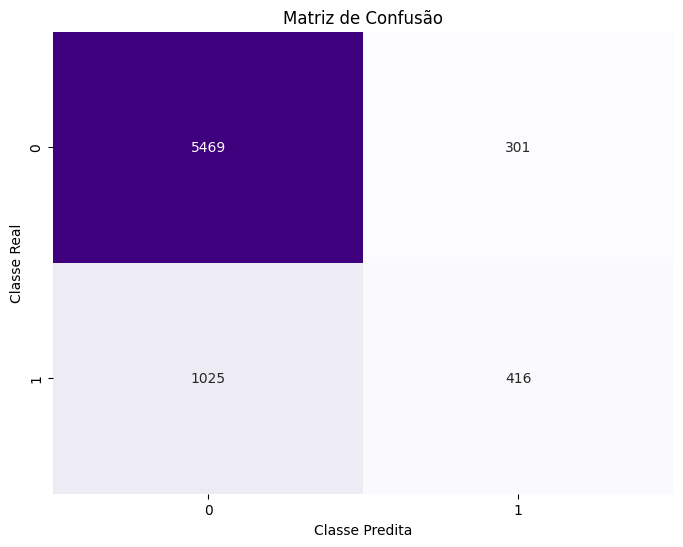

Acurácia: 0.8161142698654833
Precisão: 0.5801952580195258
Recall: 0.2886884108258154


In [ ]:
# Calcular matriz de confusão
cm_nulos = confusion_matrix(y_nulos_test, y_nulos_pred) #y_test é df com a variável target 20% e y_pred é df com a variável target vindo da coluna Previsao_modelo que foi prevista no X_test

# Calcular métricas
accuracy_nulos = accuracy_score(y_nulos_test, y_nulos_pred) #acurácia
precision_nulos = precision_score(y_nulos_test, y_nulos_pred) #precisão
recall_nulos = recall_score(y_nulos_test, y_nulos_pred)#recall

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nulos, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy_nulos)
print("Precisão:", precision_nulos)
print("Recall:", recall_nulos)

Lendo a matriz de confusão:

- Sofrem bullying na escola - dos que sofreram bullying na escola que meu modelo previu 416 (VERDADEIRO POSITIVO) efetivamente sofreram e previu que 1025 (FALSO NEGATIVO) não sofreram e sofreram sim.

- Não sofreram bullying na escola- dos que não sofreram bullying na escola que meu modelo previu 5469 (VERDADEIRO NEGATIVO) efetivamente não sofreram e 301 (FALSO POSITIVO) que previu como sofreram, na verdade não sofreram.

Então do total de 1441 que sofreram bullying meu modelo previu 416 corretamente;

E do total de 5770 que não sofreram bullying meu modelo previu 5469 corretamente;

E apresentou um total de 1025 falsos negativos.

### Análise das variáveis mais relevantes do Modelo 2

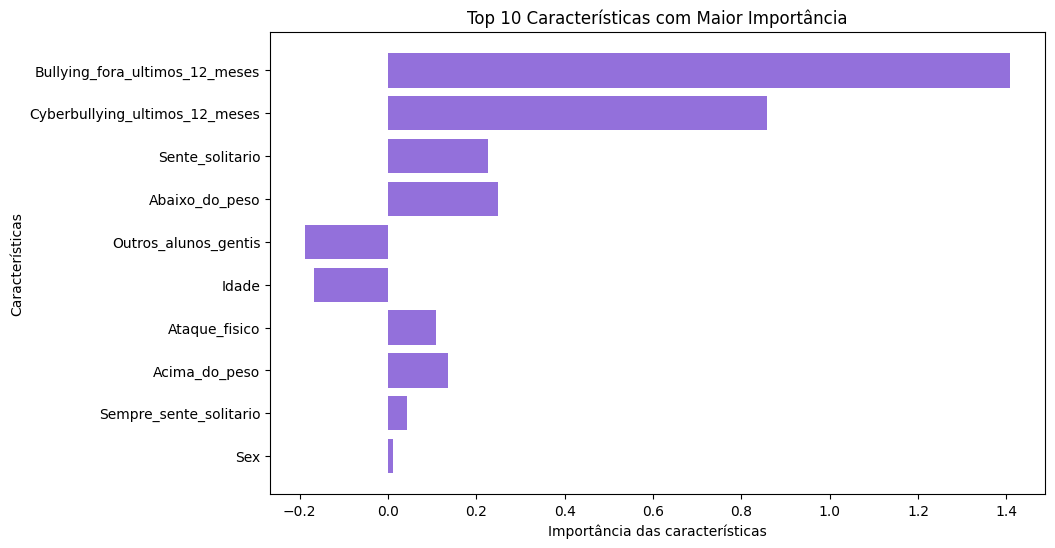

In [ ]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients_nulos = model_nulos.coef_[0]
feature_names_nulos = X_nulos.columns

# Ordenando os índices das características pelos coeficientes
indices_nulos = np.argsort(np.abs(coefficients_nulos))

# Top 10 características com maior importância
top_features_nulos = feature_names_nulos[indices][-10:]
top_importances_nulos = coefficients_nulos[indices][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,6))
plt.barh(top_features_nulos, top_importances_nulos, color='#9370DB')
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância')
plt.show()

Análise das variáveis mais relevantes do Modelo 2:

1. Bullying_fora_ultimos_12_meses: Esta é a característica com maior importância, indicando que o bullying fora dos últimos 12 meses é um fator muito relevante no modelo.

2. Cyberbullying_ultimos_12_meses: O cyberbullying nos últimos 12 meses também é uma característica de grande importância, mostrando que esse tipo de comportamento é um fator significativo.

3. Abaixo_do_peso: A característica "abaixo do peso" possui uma importância considerável, indicando que o peso corporal é um aspecto a ser considerado.

4. Sente_solitario: O sentimento de solidão aparece como a terceira característica mais importante, sugerindo que esse é um fator relevante no modelo.

5. Acima_do_peso: Essa característica também é uma variável relevante.

6. Ataque_físico: Ter sofrido ataque físico também é uma variável relevante.

7. Sempre_sente_solitario: Sempre se sentir solitário também é uma variável relevante.


Em resumo, as variáveis mais importantes parecem estar relacionadas a diferentes formas de bullying (fora da escola e cibernético),  aspectos físicos como peso corporal e sentimentos de solidão, seguido de estar acima do peso, ter sofrido ataque físico e sempre se sentir solitário. Essas características devem ser consideradas como fatores-chave no modelo analisado.

## -> Comparando Modelos 1 e 2

Antes de comparar os modelos, vamos verificar o quantitativo de 0(não) e 1 (sim) para cada dataframe:

In [ ]:
#Verificando quantitativo:
df_final['Bullying_escola_ultimos_12_meses'].value_counts()

Bullying_escola_ultimos_12_meses
0.0    45078
1.0    11903
Name: count, dtype: int64

In [ ]:
#Verificando quantitativo:
df_removendo_nulos['Bullying_escola_ultimos_12_meses'].value_counts()

Bullying_escola_ultimos_12_meses
0.0    28580
1.0     7472
Name: count, dtype: int64

Como os quantitativos de cada valor da coluna são diferentes, inclusive no total de linhas, a melhor forma de comparar os modelos é calculando a taxa de falsos negativos:

In [ ]:
#Cálculo de taxa de falsos negativos do df_final do Modelo 1:

falsos_negativos_final = 1690 / (1690 + 723) * 100
falsos_negativos_final

70.03729796933278

In [ ]:
#Cálculo de taxa de falsos negativos do df_removendo_nulos do Modelo 2:

falsos_negativos_removendo_nulos = 1025 / (1025 + 416) * 100
falsos_negativos_removendo_nulos

71.13115891741846

COMPARANDO MODELOS 1 E 2:

Para determinar qual modelo teve um melhor desempenho, podemos comparar as métricas de avaliação entre os dois modelos. As principais métricas a serem analisadas são:

Acurácia:

Modelo 1: 0.8097745020619461

Modelo 2: 0.8161142698654833


O Modelo 2 apresenta uma acurácia ligeiramente superior, indicando um melhor desempenho geral.


Precisão:

Modelo 1: 0.6019983347210658

Modelo 2: 0.5801952580195258


O Modelo 1 apresenta uma precisão um pouco maior, indicando que ele
é melhor em evitar falsos positivos.



Recall (Sensibilidade):

Modelo 1: 0.2996270203066722

Modelo 2: 0.2886884108258154

O Modelo 1 apresenta um recall um pouco maior, indicando que ele é melhor em identificar corretamente os casos positivos (que sofreram bullying).


Considerando essas métricas, não há uma resposta definitiva sobre qual modelo é melhor, pois eles apresentam desempenhos diferentes em métricas diferentes. Mas podemos verificar as métricas mais importantes para o caso de uso específico.Nesse caso consideramos que evitar falsos negativos seria a prioridade.Ou seja prever erroneamente que o aluno não sofreria bullying e na realidade ele sofrer, seria mais prejudicial.

Analisando taxas de  falsos negativos:

Modelo 1:

Falsos Negativos: aprox. 70.03 %

Modelo 2:

Falsos Negativos: aprox. 71.13 %

O Modelo 1 apresenta uma menor taxa de falsos negativos em comparação com o Modelo 2. Isso significa que o Modelo 1 é melhor em evitar prever que o aluno não sofreu bullying quando na realidade ele sofreu.

MELHOR MODELO: MODELO 1

## -> Método 1: Melhorando performance do Modelo removendo variáveis com p-valor alto
REMOVENDO VARIÁVEIS COM P-VALOR ALTO, OU SEJA, P-VALOR > 0.05

Agora iremos testar outro método para tentar melhorar a performance do Modelo:
Realizaremos o cáculo do summary e depois removeremos do dataframe as variáveis com p-valor alto.

### Modelo 1: DF_FINAL

# Gerando summary do Modelo 1:

In [ ]:
#Importando bibliotecas:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [ ]:
#Declarando x e y:

X = df_final[['Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso']]
y = df_final['Bullying_escola_ultimos_12_meses']

In [ ]:
#Dividindo os dados em treino e teste:
#separacao dos dados deixando 80% treino 20% teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Adicionando uma constante para o modelo
X_train_sm = sm.add_constant(X_train)

In [ ]:
# Fit do modelo com statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.431136
         Iterations 6


In [ ]:
# Summary:
print(result.summary())

                                  Logit Regression Results                                  
Dep. Variable:     Bullying_escola_ultimos_12_meses   No. Observations:                45584
Model:                                        Logit   Df Residuals:                    45567
Method:                                         MLE   Df Model:                           16
Date:                              Thu, 19 Dec 2024   Pseudo R-squ.:                  0.1572
Time:                                      23:07:11   Log-Likelihood:                -19653.
converged:                                     True   LL-Null:                       -23318.
Covariance Type:                          nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.3172      0.

# Removendo variáveis com p-valor alto do Modelo 1:

Removendo variáveis com p-valor alto:

In [ ]:
#Removendo variáveis com p-valor alto(maior que 0.05):

df_final_sem_variaveis = df_final.drop(['Falta_escola_Sem_permissao', 'Sempre_sente_solitario', 'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Obeso'], axis=1)

#Verificando colunas:
df_final_sem_variaveis.columns

Index(['ID', 'Bullying_escola_ultimos_12_meses',
       'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Outros_alunos_gentis', 'Pais_entendem_problemas',
       'Acima_do_peso'],
      dtype='object')

# Regressão Logística com dataframe Modelo 1 sem variáveis com p-valor alto:

Regressão Logística com dataframe sem variáveis com p-valor alto:

In [ ]:
#Declarando x e y:

X_df_final_sem_var = df_final_sem_variaveis[['Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Outros_alunos_gentis', 'Pais_entendem_problemas',
       'Acima_do_peso']]
y_df_final_sem_var = df_final_sem_variaveis['Bullying_escola_ultimos_12_meses']

In [ ]:
#Dividindo os dados em treino e teste:
#separacao dos dados deixando 80% treino 20% teste

X_df_final_sem_var_train, X_df_final_sem_var_test, y_df_final_sem_var_train, y_df_final_sem_var_test = train_test_split(X_df_final_sem_var, y_df_final_sem_var, test_size=0.2, random_state=42)

# fit do modelo
logreg_df_final_sem_var = LogisticRegression()
logreg_df_final_sem_var.fit(X_df_final_sem_var_train, y_df_final_sem_var_train) #aqui fito 80%, 20%

#vamos agora aplicar o modelo fitado na base de teste (que é a X_test com variáveis explicativas 20%) e realizar a previsão:

y_pred_df_final_sem_var = logreg_df_final_sem_var.predict(X_df_final_sem_var_test) ### aplicacao do modelo
y_pred_proba_df_final_sem_var = logreg_df_final_sem_var.predict_proba(X_df_final_sem_var_test)[:, 1] ### previsao da probabilidade

##### mostrando o output
X_df_final_sem_var_test["Previsao_Modelo"] = y_pred_df_final_sem_var
X_df_final_sem_var_test["Probabilidade_bullying_escola"] = y_pred_proba_df_final_sem_var

X_df_final_sem_var_test

Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
41847                             0.0                             0.0   17.0   
31363                             0.0                             0.0   16.0   
18780                             0.0                             0.0   13.0   
6948                              0.0                             1.0   14.0   
28187                             0.0                             0.0   16.0   
...                               ...                             ...    ...   
7916                              0.0                             0.0   15.0   
46027                             1.0                             1.0   15.0   
13966                             0.0                             0.0   13.0   
32087                             0.0                             0.0   13.0   
7439                              0.0                             0.0   13.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
41847  0.0            0.0           0.0              3.0            3.0   
31363  0.0            0.0           0.0              2.0            3.0   
18780  1.0            0.0           2.5              0.0            3.0   
6948   0.0            0.0           1.0              2.0            3.0   
28187  1.0            0.0           0.0              1.0            1.0   
...    ...            ...           ...              ...            ...   
7916   1.0            0.0           0.0              1.0            3.0   
46027  0.0            0.0           0.0              2.0            3.0   
13966  1.0            0.0           1.0              0.0            3.0   
32087  1.0            0.0           0.0              1.0            3.0   
7439   1.0            0.0           0.0              0.0            3.0   

       Outros_alunos_gentis  Pais_entendem_problemas  Acima_do_peso  \
41847                   3.0                      1.0            0.0   
31363                   3.0                      3.0            0.0   
18780                   1.0                      1.0            1.0   
6948                    3.0                      0.0            0.0   
28187                   4.0                      0.0            0.0   
...                     ...                      ...            ...   
7916                    3.0                      1.0            1.0   
46027                   1.0                      0.0            0.0   
13966                   2.0                      4.0            1.0   
32087                   2.0                      3.0            0.0   
7439                    0.0                      4.0            0.0   

       Previsao_Modelo  Probabilidade_bullying_escola  
41847              0.0                       0.097085  
31363              0.0                       0.094723  
18780              0.0                       0.127814  
6948               0.0                       0.221200  
28187              0.0                       0.069929  
...                ...                            ...  
7916               0.0                       0.097039  
46027              1.0                       0.603450  
13966              0.0                       0.125137  
32087              0.0                       0.142339  
7439               0.0                       0.160787  

[11397 rows x 13 columns]

### Performance do Modelo 1 sem variáveis com p-valor alto:


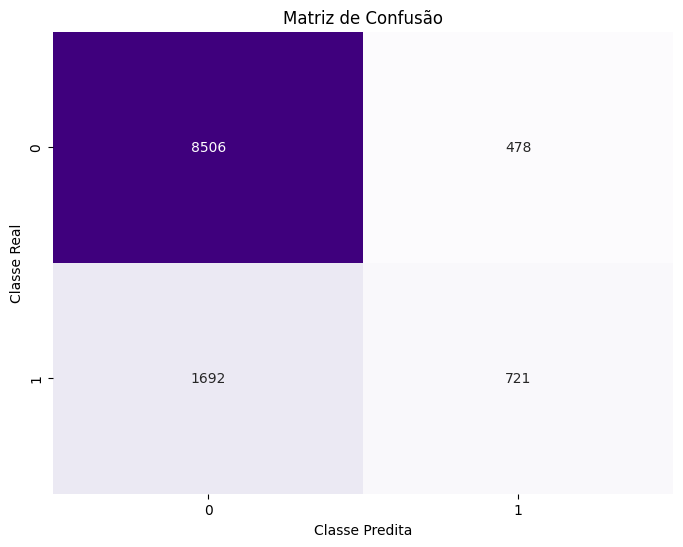

Acurácia: 0.8095990172852505
Precisão: 0.6013344453711427
Recall: 0.2987981765437215


In [ ]:
# Calcular matriz de confusão
cm_final_sem_variaveis = confusion_matrix(y_df_final_sem_var_test, y_pred_df_final_sem_var)

# Calcular métricas
accuracy_df_final_sem_var = accuracy_score(y_df_final_sem_var_test, y_pred_df_final_sem_var)
precision_df_final_sem_var = precision_score(y_df_final_sem_var_test, y_pred_df_final_sem_var)
recall_df_final_sem_var = recall_score(y_df_final_sem_var_test, y_pred_df_final_sem_var)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final_sem_variaveis, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy_df_final_sem_var)
print("Precisão:", precision_df_final_sem_var)
print("Recall:", recall_df_final_sem_var)

Lendo a matriz de confusão:

- Sofrem bullying na escola - dos que sofreram bullying na escola que meu modelo previu 721 (VERDADEIRO POSITIVO) que efetivamente sofreram e 1692 previu como se não tivessem sofrido(FALSO NEGATIVO), mas sofreram.

- não sofreram bullying na escola- dos que não sofreram bullying na escola que meu modelo previu, 8506 (VERDADEIRO NEGATIVO) efetivamente não sofreram e 478 previu como se tivessem sofrido (FALSO POSITIVO), mas não sofreram.

Então dos 2413 totais que sofreram bullying meu modelo previu 721 corretamente;

E dos 8984 que não sofreram meu modelo previu 8506 corretamente;

E apresentou um total de 1692 falsos negativos.

# Modelo 2: DF_REMOVENDO_NULOS

# Gerando o summary do Modelo 2:

In [ ]:
#Declarando x e y:

X_nulos = df_removendo_nulos[['Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso']]
y_nulos = df_removendo_nulos['Bullying_escola_ultimos_12_meses']

In [ ]:
#Dividindo os dados em treino e teste:
#separacao dos dados deixando 80% treino 20% teste

X_nulos_train, X_nulos_test, y_nulos_train, y_nulos_test = train_test_split(X_nulos, y_nulos, test_size=0.2, random_state=42)

# Adicionando uma constante para o modelo
X_nulos_train_sm = sm.add_constant(X_nulos_train)

# Fit do modelo com statsmodels
logit_model_nulos = sm.Logit(y_nulos_train, X_nulos_train_sm)
result_nulos = logit_model_nulos.fit()

# Resumo do modelo
print(result_nulos.summary())

Optimization terminated successfully.
         Current function value: 0.429902
         Iterations 6
                                  Logit Regression Results                                  
Dep. Variable:     Bullying_escola_ultimos_12_meses   No. Observations:                28841
Model:                                        Logit   Df Residuals:                    28824
Method:                                         MLE   Df Model:                           16
Date:                              Fri, 20 Dec 2024   Pseudo R-squ.:                  0.1616
Time:                                      00:47:09   Log-Likelihood:                -12399.
converged:                                     True   LL-Null:                       -14789.
Covariance Type:                          nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

# Removendo variáveis com p-valor alto do Modelo 2:

In [ ]:
#Removendo variáveis com p-valor alto:

df_removendo_nulos_sem_variaveis = df_removendo_nulos.drop(['Sex', 'Close_friends', 'Falta_escola_Sem_permissao','Sempre_sente_solitario','Perdeu_aulas_escola_Sem_permissao', 'Obeso'
], axis=1)

#Verificando colunas:
df_removendo_nulos_sem_variaveis.columns

Index(['ID', 'Bullying_escola_ultimos_12_meses',
       'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Outros_alunos_gentis', 'Pais_entendem_problemas', 'Abaixo_do_peso',
       'Acima_do_peso'],
      dtype='object')

# Regressão logística com dataframe Modelo 2 sem variáveis com p-valor alto:

In [ ]:
#Declarando x e y:

X_nulos_sem_var = df_removendo_nulos_sem_variaveis[['Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Outros_alunos_gentis', 'Pais_entendem_problemas', 'Abaixo_do_peso',
       'Acima_do_peso']]
y_nulos_sem_var = df_removendo_nulos_sem_variaveis['Bullying_escola_ultimos_12_meses']

#Dividindo os dados em treino e teste:
#separacao dos dados deixando 80% treino 20% teste

X_nulos_sem_var_train, X_nulos_sem_var_test, y_nulos_sem_var_train, y_nulos_sem_var_test = train_test_split(X_nulos_sem_var, y_nulos_sem_var, test_size=0.2, random_state=42)

# fit do modelo
logreg_nulos_sem_var = LogisticRegression()
logreg_nulos_sem_var.fit(X_nulos_sem_var_train, y_nulos_sem_var_train)#aqui fito 80%, 20%

#vamos agora aplicar o modelo fitado na base de teste (que é a X_test com variáveis explicativas 20%) e realizar a previsão:

y_pred_nulos_sem_var = logreg_nulos_sem_var.predict(X_nulos_sem_var_test) ### aplicacao do modelo
y_pred_proba_nulos_sem_var = logreg_nulos_sem_var.predict_proba(X_nulos_sem_var_test)[:, 1] ### previsao da probabilidade

##### mostrando o output
X_nulos_sem_var_test["Previsao_Modelo"] = y_pred_nulos_sem_var
X_nulos_sem_var_test["Probabilidade_bullying_escola"] = y_pred_proba_nulos_sem_var

X_nulos_sem_var_test

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
22839                             0.0                             0.0   16.0   
9480                              0.0                             0.0   15.0   
24283                             0.0                             0.0   13.0   
12325                             0.0                             0.0   14.0   
29938                             1.0                             0.0   17.0   
...                               ...                             ...    ...   
20838                             0.0                             0.0   13.0   
8618                              0.0                             0.0   17.0   
28241                             0.0                             0.0   14.0   
16852                             0.0                             0.0   13.0   
16325                             0.0                             1.0   16.0   

       Ataque_fisico  Briga_fisica  Sente_solitario  Outros_alunos_gentis  \
22839            0.0           0.0              1.0                   2.0   
9480             0.0           2.5              0.0                   4.0   
24283            0.0           0.0              0.0                   3.0   
12325            0.0           0.0              0.0                   0.0   
29938            0.0           0.0              0.0                   2.0   
...              ...           ...              ...                   ...   
20838            4.5           2.5              2.0                   2.0   
8618             0.0           0.0              2.0                   4.0   
28241            0.0           0.0              1.0                   3.0   
16852            0.0           0.0              0.0                   1.0   
16325            0.0           0.0              2.0                   3.0   

       Pais_entendem_problemas  Abaixo_do_peso  Acima_do_peso  \
22839                      1.0             0.0            1.0   
9480                       1.0             0.0            0.0   
24283                      2.0             0.0            0.0   
12325                      0.0             0.0            0.0   
29938                      3.0             0.0            0.0   
...                        ...             ...            ...   
20838                      1.0             0.0            0.0   
8618                       1.0             0.0            0.0   
28241                      4.0             0.0            1.0   
16852                      2.0             0.0            1.0   
16325                      1.0             0.0            0.0   

       Previsao_Modelo  Probabilidade_bullying_escola  
22839              0.0                       0.097217  
9480               0.0                       0.049669  
24283              0.0                       0.094586  
12325              0.0                       0.125601  
29938              0.0                       0.217090  
...                ...                            ...  
20838              0.0                       0.220710  
8618               0.0                       0.064256  
28241              0.0                       0.123727  
16852              0.0                       0.149853  
16325              0.0                       0.188194  

[7211 rows x 12 columns]

# Performance do Modelo 2 sem variáveis comp-valor alto:

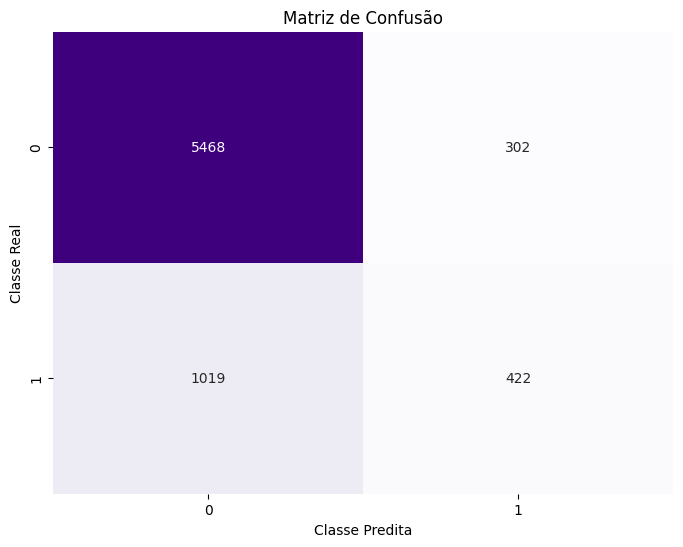

Acurácia: 0.8168076549715713
Precisão: 0.5828729281767956
Recall: 0.29285218598195695


In [ ]:
# Calcular matriz de confusão
cm_removendo_nulos_sem_variaveis = confusion_matrix(y_nulos_sem_var_test, y_pred_nulos_sem_var)

# Calcular métricas
accuracy_nulos_sem_var = accuracy_score(y_nulos_sem_var_test, y_pred_nulos_sem_var)
precision_nulos_sem_var = precision_score(y_nulos_sem_var_test, y_pred_nulos_sem_var)
recall_nulos_sem_var = recall_score(y_nulos_sem_var_test, y_pred_nulos_sem_var)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_removendo_nulos_sem_variaveis, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy_nulos_sem_var)
print("Precisão:", precision_nulos_sem_var)
print("Recall:", recall_nulos_sem_var)

Lendo a matriz de confusão:

- Sofrem bullying na escola - dos que sofreram bullying na escola que meu modelo previu 422 (VERDADEIRO POSITIVO) que efetivamente sofreram e 1019 previu como se não tivessem sofrido(FALSO NEGATIVO), mas sofreram.

- não sofreram bullying na escola- dos que não sofreram bullying na escola que meu modelo previu, 5468 (VERDADEIRO NEGATIVO) efetivamente não sofreram e 302 previu como se tivessem sofrido (FALSO POSITIVO), mas não sofreram.

Então dos 1441 totais que sofreram bullying meu modelo previu 422 corretamente;

E dos 5770 que não sofreram, meu modelo previu 5468 corretamente;

E apresentou um total de 1019 falsos negativos.

# -> Comparando os Modelos 1 e 2 com e sem variáveis

In [ ]:
#Verificando quantitativo:
df_final_sem_variaveis['Bullying_escola_ultimos_12_meses'].value_counts()

Bullying_escola_ultimos_12_meses
0.0    45078
1.0    11903
Name: count, dtype: int64

In [ ]:
#Verificando quantitativo:
df_removendo_nulos_sem_variaveis['Bullying_escola_ultimos_12_meses'].value_counts()

Bullying_escola_ultimos_12_meses
0.0    28580
1.0     7472
Name: count, dtype: int64

In [ ]:
#Cálculo de taxa de falsos negativos do df_final_sem_variaveis:

falsos_negativos_final_sem_variaveis = 1692 / (1692 + 721) * 100
falsos_negativos_final_sem_variaveis

70.12018234562785

In [ ]:
#Cálculo de taxa de falsos negativos do df_removendo_nulos_sem_variaveis:

falsos_negativos_removendo_nulos_sem_variaveis = 1019 / (1019 + 422) * 100
falsos_negativos_removendo_nulos_sem_variaveis

70.7147814018043

COMPARANDO DF_FINAL COM VARIÁVEIS  X  DF_FINAL_SEM_VARIAVEIS:

Modelo 1 com variáveis : Taxa de falsos Negativos: aprox. 70.03%

Modelo 1 sem variáveis: Taxa de falsos negativos: aprox. 70.12%


O MODELO 1 COM VARIÁVEIS AINDA APRESENTOU UMA PERFORMANCE MELHOR.

COMPARANDO O DF_REMOVENDO_NULOS COM VARIÁVEIS X DF_REMOVENDO_NULOS_SEM_VARIAVEIS:

Modelo 2 com variáveis: Taxa de falsos negativos: aprox. 71.13 %

Modelo 2 sem variáveis: Taxa de falsos negativos: aprox. 70.71%

O MODELO 2 SEM VARIÁVEIS APRESENTOU UMA PERFORMANCE MELHOR.

COMPARANDO MODELO 1 SEM VARIÁVEIS X MODELO 2 SEM VARIÁVEIS

Modelo 1 sem variáveis: Taxa de falsos negativos: aprox. 70.12%

Modelo 2 sem variáveis: Taxa de falsos negativos: aprox. 70.71%

MODELO 1 SEM VARIÁVEIS APRESENTOU UMA PERFORMANCE MELHOR.

COMPARANDO OS 4 MODELOS:

Modelo 1 com variáveis : Taxa de falsos Negativos: aprox. 70.03%

Modelo 2 com variáveis: Taxa de falsos negativos: aprox. 71.13 %

Modelo 2 com variáveis: Taxa de falsos negativos: aprox. 71.13 %

Modelo 2 sem variáveis: Taxa de falsos negativos: aprox. 70.71%

Comparando os 4 modelos focando na taxa de falsos negativos, percebemos que o Modelo 1 com variáveis performou melhor, portanto o método 1 não foi tão eficaz.

MELHOR MODELO: MODELO 1 COM VARIÁVEIS.



# -> Método 2: Melhorando a performance do modelo com balanceamento

Agora vamos aplicar o balanceamento para melhorar o desempenho das previsões:

Faremos novamente o balanceamento nos dois dataframes: df_final e df_removendo_nulos.

# Balanceamento Modelo 1: df_final

In [ ]:
#Visualizando as colunas
df_final.columns

Index(['ID', 'Bullying_escola_ultimos_12_meses',
       'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso'],
      dtype='object')

In [ ]:
#Verificando quantitativo:
df_final['Bullying_escola_ultimos_12_meses'].value_counts()


Bullying_escola_ultimos_12_meses
0.0    45078
1.0    11903
Name: count, dtype: int64

In [ ]:
#Defininfo classe minoritária e maioritária:
contagem_minoritaria = df_final[df_final['Bullying_escola_ultimos_12_meses'] == 1].shape[0]
contagem_maioritaria = df_final[df_final['Bullying_escola_ultimos_12_meses'] == 0].shape[0]

print("Contagem da classe minoritária (Bullying_escola_ultimos_12_meses=1):", contagem_minoritaria)
print("Contagem da classe majoritária (Bullying_escola_ultimos_12_meses=0):", contagem_maioritaria)


Contagem da classe minoritária (Bullying_escola_ultimos_12_meses=1): 11903
Contagem da classe majoritária (Bullying_escola_ultimos_12_meses=0): 45078


In [ ]:
# Calculando o número de amostras a serem subamostradas
undersample_size = contagem_minoritaria

# Realizando o undersampling
minority_train = df_final[df_final['Bullying_escola_ultimos_12_meses'] == 1].copy()
majority_train = df_final[df_final['Bullying_escola_ultimos_12_meses'] == 0].copy()

### seleciona aleatoriamente as observacoes da classe majoritaria
undersampled_majority = majority_train.sample(n=undersample_size, replace=False, random_state=42)

# Combinando as amostras da classe minoritária e subamostrada da classe majoritária
undersampled_train_features = pd.concat([undersampled_majority, minority_train], axis=0)
undersampled_train_labels = pd.concat([pd.Series([0]*undersample_size), pd.Series([1]*contagem_minoritaria)], axis=0)

# Verificando o novo balanceamento
print("Contagem de amostras após o undersampling:")
undersampled_train_labels.value_counts()

Contagem de amostras após o undersampling:


0    11903
1    11903
Name: count, dtype: int64

In [ ]:
#Visualizando dataframe
undersampled_train_features

ID  Bullying_escola_ultimos_12_meses  \
32140  32175                               0.0   
55938  56052                               0.0   
15273  15291                               0.0   
38050  38116                               0.0   
34761  34811                               0.0   
...      ...                               ...   
56951  57066                               1.0   
56955  57070                               1.0   
56965  57080                               1.0   
56966  57081                               1.0   
56971  57086                               1.0   

       Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
32140                             0.0                             0.0   16.0   
55938                             0.0                             0.0   16.0   
15273                             0.0                             0.0   14.0   
38050                             0.0                             1.0   16.0   
34761                             0.0                             0.0   15.0   
...                               ...                             ...    ...   
56951                             1.0                             0.0   16.0   
56955                             1.0                             1.0   15.0   
56965                             1.0                             0.0   17.0   
56966                             0.0                             0.0   16.0   
56971                             1.0                             0.0   16.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
32140  1.0            0.0           0.0              3.0            3.0   
55938  0.0            0.0           0.0              1.0            3.0   
15273  0.0            0.0           0.0              2.0            2.0   
38050  0.0            0.0           0.0              2.0            1.0   
34761  0.0            0.0           2.5              4.0            3.0   
...    ...            ...           ...              ...            ...   
56951  1.0            1.0           2.5              1.0            3.0   
56955  1.0            1.0           2.5              1.0            3.0   
56965  0.0            0.0           0.0              2.0            2.0   
56966  1.0            0.0           0.0              1.0            3.0   
56971  1.0            0.0           0.0              3.0            3.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
32140                         0.0                   4.0   
55938                         0.0                   2.0   
15273                         0.0                   2.0   
38050                         0.0                   2.0   
34761                         1.5                   0.0   
...                           ...                   ...   
56951                         1.5                   2.0   
56955                         1.5                   1.0   
56965                         0.0                   2.0   
56966                         1.5                   1.0   
56971                         0.0                   2.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
32140                      3.0                     1.0   
55938                      1.0                     0.0   
15273                      2.0                     0.0   
38050                      3.0                     0.0   
34761                      1.0                     1.0   
...                        ...                     ...   
56951                      2.0                     0.0   
56955                      1.0                     0.0   
56965                      3.0                     0.0   
56966                      2.0                     0.0   
56971                      1.0                     1.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
32140                                0.0             0.0    

In [ ]:
#Dando um info:
undersampled_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23806 entries, 32140 to 56971
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 23806 non-null  int64  
 1   Bullying_escola_ultimos_12_meses   23806 non-null  float64
 2   Bullying_fora_ultimos_12_meses     23806 non-null  float64
 3   Cyberbullying_ultimos_12_meses     23806 non-null  float64
 4   Idade                              23806 non-null  float64
 5   Sex                                23806 non-null  float64
 6   Ataque_fisico                      23806 non-null  float64
 7   Briga_fisica                       23806 non-null  float64
 8   Sente_solitario                    23806 non-null  float64
 9   Close_friends                      23806 non-null  float64
 10  Falta_escola_Sem_permissao         23806 non-null  float64
 11  Outros_alunos_gentis               23806 non-null  floa

In [ ]:
#Verificando quantitativo:
undersampled_train_features['Bullying_escola_ultimos_12_meses'].value_counts()

Bullying_escola_ultimos_12_meses
0.0    11903
1.0    11903
Name: count, dtype: int64

# Regressão Logística do Modelo 1 balanceado:

In [ ]:
#### Cria vetores X e y com base nos dados
###### x contem as variaveis explicativas
X_df_final_balanc = undersampled_train_features[['Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso']]

###### y contem a variavel de interesse
y_df_final_balanc = undersampled_train_features[[ 'Bullying_escola_ultimos_12_meses']]

###### vamos usar train_test split do pacote sklearn para a separacao dos dados deixando 80% treino 20% teste

X_df_final_balanc_train, X_df_final_balanc_test, y_df_final_balanc_train, y_df_final_balanc_test = train_test_split(X_df_final_balanc, y_df_final_balanc, test_size=0.2, random_state=2)

# fit do modelo
logreg_1_balanceado = LogisticRegression()
logreg_1_balanceado.fit(X_df_final_balanc_train, y_df_final_balanc_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Performance do Modelo 1 balanceado:

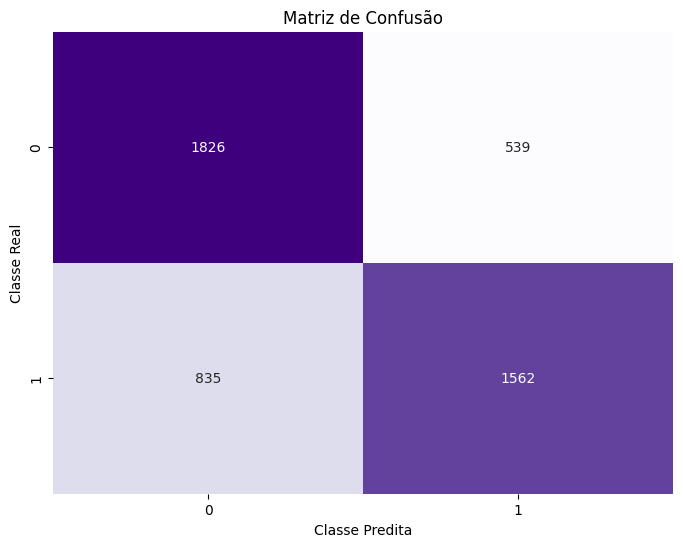

Acurácia: 0.7114657706845863
Precisão: 0.743455497382199
Recall: 0.6516478931998331


In [ ]:
#### vamos agora aplicar o modelo fitado na base de test

y_df_final_balanc_pred = logreg_1_balanceado.predict(X_df_final_balanc_test) ### aplicacao do modelo
y_df_final_balanc_pred_proba = logreg_1_balanceado.predict_proba(X_df_final_balanc_test)[:, 1] ### previsao da probabilidade

# Calcular matriz de confusão
cm_df_final_balanc = confusion_matrix(y_df_final_balanc_test, y_df_final_balanc_pred)

# Calcular métricas
accuracy_df_final_balanc = accuracy_score(y_df_final_balanc_test, y_df_final_balanc_pred)
precision_df_final_balanc = precision_score(y_df_final_balanc_test, y_df_final_balanc_pred)
recall_df_final_balanc = recall_score(y_df_final_balanc_test, y_df_final_balanc_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_final_balanc, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy_df_final_balanc)
print("Precisão:", precision_df_final_balanc)
print("Recall:", recall_df_final_balanc)

Lendo a matriz de confusão:

- Sofrem bullying na escola - dos que sofreram bullying na escola que meu modelo previu 1562 (VERDADEIRO POSITIVO) que efetivamente sofreram e 835 previu como se não tivessem sofrido(FALSO NEGATIVO), mas sofreram.

- não sofreram bullying na escola- dos que não sofreram bullying na escola que meu modelo previu, 1826 (VERDADEIRO NEGATIVO) efetivamente não sofreram e 539 previu como se tivessem sofrido (FALSO POSITIVO), mas não sofreram.

Então dos 2397 totais que sofreram bullying meu modelo previu 1562 corretamente;

E dos 2365 que não sofreram, meu modelo previu 1826 corretamente;

E apresentou um total de 835 falsos negativos.

# Análise das variáveis mais relevantes para o Modelo 1 balanceado:

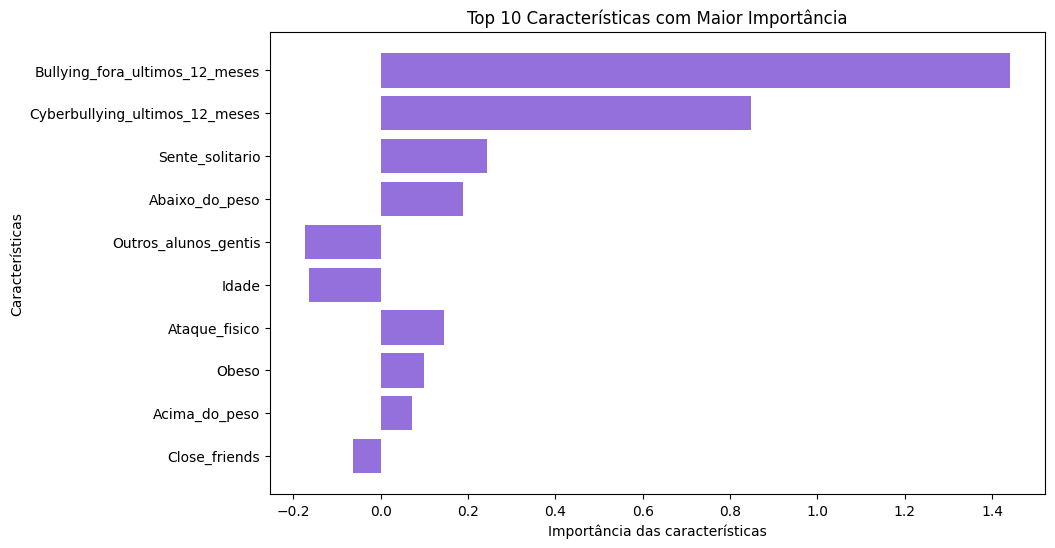

In [ ]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients_df_final_balanc= logreg_1_balanceado.coef_[0]
feature_df_final_balanc = X_df_final_balanc.columns

# Ordenando os índices das características pelos coeficientes
indices_df_final_balanc = np.argsort(np.abs(coefficients_df_final_balanc))

# Top 10 características com maior importância
top_features_df_final_balanc = feature_df_final_balanc[indices_df_final_balanc][-10:]
top_importances_df_final_balanc = coefficients_df_final_balanc[indices_df_final_balanc][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,6))
plt.barh(top_features_df_final_balanc, top_importances_df_final_balanc, color='#9370DB')
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância')
plt.show()

Análise das variáveis mais relevantes do Modelo 1 com balanceamento:

1. Bullying_fora_ultimos_12_meses: Essa é a característica com maior importância, indicando que o bullying fora dos últimos 12 meses é um fator muito relevante para o modelo.

2. Cyberbullying_ultimos_12_meses: Essa também é uma característica muito importante, mostrando que o cyberbullying nos últimos 12 meses é outro fator significativo.

3. Sente_solitario: Essa variável também apresenta uma importância considerável, sugerindo que o sentimento de solidão é um aspecto relevante no modelo.

4. Abaixo_do_peso: O peso abaixo do ideal também parece ser uma característica importante no modelo.

5. Ataque_fisico: Ter sofrido ataque físico também é uma variável relevante.

6. Obeso: Ser obseso também é uma variável relevante.

7. Acima_do_peso: Estar acima do peso também é uma variável relevante.

Portanto, as principais variáveis que se destacam como mais importantes para o modelo são o bullying fora da escola, o cyberbullying, o sentimento de solidão, o peso abaixo do ideal e ataque físico, seguido de ser obeso e estar acima do peso. Essas características devem ser consideradas como fatores-chave no modelo analisado.

# Balanceamento Modelo 2: df_removendo_nulos

In [ ]:
#Verificando colunas:
df_removendo_nulos.columns

Index(['ID', 'Bullying_escola_ultimos_12_meses',
       'Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso'],
      dtype='object')

In [ ]:
#Verificando quantitativo:
df_removendo_nulos['Bullying_escola_ultimos_12_meses'].value_counts()

Bullying_escola_ultimos_12_meses
0.0    28580
1.0     7472
Name: count, dtype: int64

In [ ]:
#Definindo classe minoritária e maioritária:
contagem_minoritaria_nulos = df_removendo_nulos[df_removendo_nulos['Bullying_escola_ultimos_12_meses'] == 1].shape[0]
contagem_maioritaria_nulos = df_removendo_nulos[df_removendo_nulos['Bullying_escola_ultimos_12_meses'] == 0].shape[0]

print("Contagem da classe minoritária (Bullying_escola_ultimos_12_meses=1):", contagem_minoritaria_nulos)
print("Contagem da classe majoritária (Bullying_escola_ultimos_12_meses=0):", contagem_maioritaria_nulos)

Contagem da classe minoritária (Bullying_escola_ultimos_12_meses=1): 7472
Contagem da classe majoritária (Bullying_escola_ultimos_12_meses=0): 28580


In [ ]:
# Calculando o número de amostras a serem subamostradas
undersample_size_nulos = contagem_minoritaria_nulos

# Realizando o undersampling
minority_train_nulos = df_removendo_nulos[df_removendo_nulos['Bullying_escola_ultimos_12_meses'] == 1].copy()
majority_train_nulos = df_removendo_nulos[df_removendo_nulos['Bullying_escola_ultimos_12_meses'] == 0].copy()

### seleciona aleatoriamente as observacoes da classe majoritaria
undersampled_majority_nulos = majority_train_nulos.sample(n=undersample_size_nulos, replace=False, random_state=42)

# Combinando as amostras da classe minoritária e subamostrada da classe majoritária
undersampled_train_features_nulos = pd.concat([undersampled_majority_nulos, minority_train_nulos], axis=0)
undersampled_train_labels_nulos = pd.concat([pd.Series([0]*undersample_size_nulos), pd.Series([1]*contagem_minoritaria_nulos)], axis=0)

# Verificando o novo balanceamento
print("Contagem de amostras após o undersampling:")
undersampled_train_labels_nulos.value_counts()

Contagem de amostras após o undersampling:


0    7472
1    7472
Name: count, dtype: int64

In [ ]:
#Visualizando dataframe:
undersampled_train_features_nulos

ID  Bullying_escola_ultimos_12_meses  \
5859    9984                               0.0   
25892  40672                               0.0   
131      202                               0.0   
17867  28226                               0.0   
30901  48281                               0.0   
...      ...                               ...   
36032  57057                               1.0   
36038  57070                               1.0   
36042  57080                               1.0   
36043  57081                               1.0   
36046  57086                               1.0   

       Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
5859                              0.0                             0.0   16.0   
25892                             0.0                             1.0   17.0   
131                               0.0                             1.0   16.0   
17867                             0.0                             0.0   17.0   
30901                             0.0                             0.0   14.0   
...                               ...                             ...    ...   
36032                             1.0                             0.0   14.0   
36038                             1.0                             1.0   15.0   
36042                             1.0                             0.0   17.0   
36043                             0.0                             0.0   16.0   
36046                             1.0                             0.0   16.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
5859   1.0            0.0           0.0              3.0            2.0   
25892  0.0            0.0           0.0              3.0            2.0   
131    0.0            0.0           0.0              2.0            3.0   
17867  1.0            0.0           0.0              3.0            3.0   
30901  0.0            0.0           0.0              0.0            3.0   
...    ...            ...           ...              ...            ...   
36032  0.0            0.0           0.0              2.0            3.0   
36038  1.0            1.0           2.5              1.0            3.0   
36042  0.0            0.0           0.0              2.0            2.0   
36043  1.0            0.0           0.0              1.0            3.0   
36046  1.0            0.0           0.0              3.0            3.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
5859                         11.0                   2.0   
25892                         1.5                   2.0   
131                           0.0                   4.0   
17867                         1.5                   3.0   
30901                         0.0                   3.0   
...                           ...                   ...   
36032                         7.5                   3.0   
36038                         1.5                   1.0   
36042                         0.0                   2.0   
36043                         1.5                   1.0   
36046                         0.0                   2.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
5859                       1.0                     1.0   
25892                      2.0                     1.0   
131                        0.0                     0.0   
17867                      1.0                     1.0   
30901                      3.0                     0.0   
...                        ...                     ...   
36032                      1.0                     0.0   
36038                      1.0                     0.0   
36042                      3.0                     0.0   
36043                      2.0                     0.0   
36046                      1.0                     1.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
5859                                 1.0             0.0    

In [ ]:
#Dando um info:
undersampled_train_features_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14944 entries, 5859 to 36046
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 14944 non-null  int64  
 1   Bullying_escola_ultimos_12_meses   14944 non-null  float64
 2   Bullying_fora_ultimos_12_meses     14944 non-null  float64
 3   Cyberbullying_ultimos_12_meses     14944 non-null  float64
 4   Idade                              14944 non-null  float64
 5   Sex                                14944 non-null  float64
 6   Ataque_fisico                      14944 non-null  float64
 7   Briga_fisica                       14944 non-null  float64
 8   Sente_solitario                    14944 non-null  float64
 9   Close_friends                      14944 non-null  float64
 10  Falta_escola_Sem_permissao         14944 non-null  float64
 11  Outros_alunos_gentis               14944 non-null  float

In [ ]:
#Verificando quantitativo:
undersampled_train_features_nulos['Bullying_escola_ultimos_12_meses'].value_counts()

Bullying_escola_ultimos_12_meses
0.0    7472
1.0    7472
Name: count, dtype: int64

# Regressão Logística do Modelo 2 balanceado:

In [ ]:
#### Cria vetores X e y com base nos dados
###### x contem as variaveis explicativas
X_nulos_balanc = undersampled_train_features_nulos[['Bullying_fora_ultimos_12_meses', 'Cyberbullying_ultimos_12_meses',
       'Idade', 'Sex', 'Ataque_fisico', 'Briga_fisica', 'Sente_solitario',
       'Close_friends', 'Falta_escola_Sem_permissao', 'Outros_alunos_gentis',
       'Pais_entendem_problemas', 'Sempre_sente_solitario',
       'Perdeu_aulas_escola_Sem_permissao', 'Abaixo_do_peso', 'Acima_do_peso',
       'Obeso']]

###### y contem a variavel de interesse
y_nulos_balanc = undersampled_train_features_nulos[[ 'Bullying_escola_ultimos_12_meses']]

###### vamos usar train_test split do pacote sklearn para a separacao dos dados deixando 80% treino 20% teste

X_nulos_balanc_train, X_nulos_balanc_test, y_nulos_balanc_train, y_nulos_balanc_test = train_test_split(X_nulos_balanc, y_nulos_balanc, test_size=0.2, random_state=2)

# fit do modelo
logreg_nulos_balanc = LogisticRegression()
logreg_nulos_balanc.fit(X_nulos_balanc_train, y_nulos_balanc_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Performance do Modelo 2 balanceado:

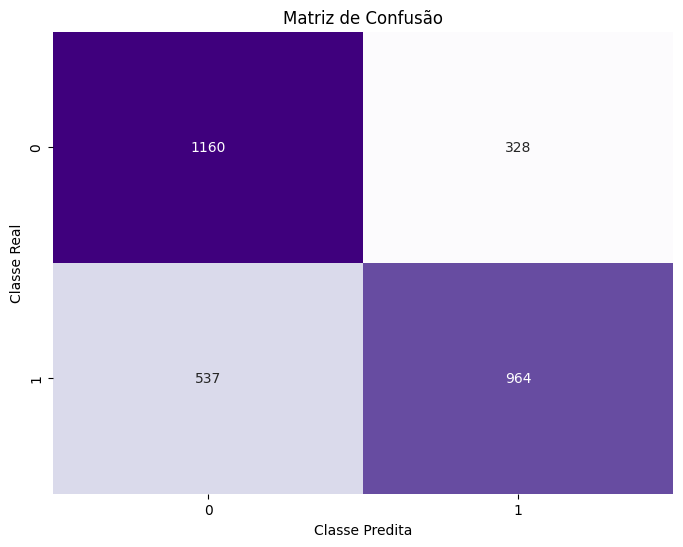

Acurácia: 0.7106055536968886
Precisão: 0.7461300309597523
Recall: 0.642238507661559


In [ ]:
#### vamos agora aplicar o modelo fitado na base de test

y_nulos_balanc_pred = logreg_nulos_balanc.predict(X_nulos_balanc_test) ### aplicacao do modelo
y_nulos_balanc_pred_proba = logreg_nulos_balanc.predict_proba(X_nulos_balanc_test)[:, 1] ### previsao da probabilidade

# Calcular matriz de confusão
cm_nulos_balanc = confusion_matrix(y_nulos_balanc_test, y_nulos_balanc_pred)

# Calcular métricas
accuracy_nulos_balanc = accuracy_score(y_nulos_balanc_test, y_nulos_balanc_pred)
precision_nulos_balanc = precision_score(y_nulos_balanc_test, y_nulos_balanc_pred)
recall_nulos_balanc = recall_score(y_nulos_balanc_test, y_nulos_balanc_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nulos_balanc, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimir métricas
print("Acurácia:", accuracy_nulos_balanc)
print("Precisão:", precision_nulos_balanc)
print("Recall:", recall_nulos_balanc)

Lendo a matriz de confusão:

- Sofrem bullying na escola - dos que sofreram bullying na escola que meu modelo previu 964 (VERDADEIRO POSITIVO) que efetivamente sofreram e 537 previu como se não tivessem sofrido(FALSO NEGATIVO), mas sofreram.

- Não sofreram bullying na escola- dos que não sofreram bullying na escola que meu modelo previu, 1160 (VERDADEIRO NEGATIVO) efetivamente não sofreram e 328 previu como se tivessem sofrido (FALSO POSITIVO), mas não sofreram.

Então dos 1501 totais que sofreram bullying meu modelo previu 964 corretamente;

E dos 1488 que não sofreram, meu modelo previu 1160 corretamente;

E apresentou um total de 537 falsos negativos.

# Análise das variáveis mais relevantes do Modelo 2 balanceado:

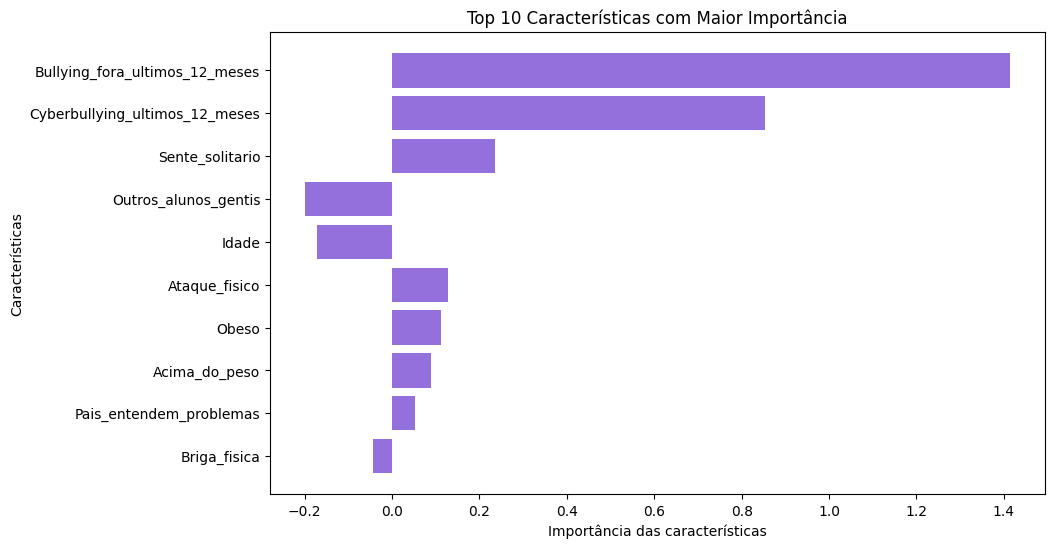

In [ ]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients_nulos_balanc = logreg_nulos_balanc.coef_[0]
feature_names_nulos_balanc = X_nulos_balanc.columns

# Ordenando os índices das características pelos coeficientes
indices_nulos_balanc = np.argsort(np.abs(coefficients_nulos_balanc))

# Top 10 características com maior importância
top_features_nulos_balanc = feature_names_nulos_balanc[indices_nulos_balanc][-10:]
top_importances_nulos_balanc = coefficients_nulos_balanc[indices_nulos_balanc][-10:]

# Plotando as top features com suas importâncias
plt.figure(figsize=(10,6))
plt.barh(top_features_nulos_balanc, top_importances_nulos_balanc, color='#9370DB')
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância')
plt.show()

Análise das variáveis mais relevantes do Modelo 1 com balanceamento:

1. Bullying_fora_ultimos_12_meses: Essa é a característica com maior importância, indicando que o bullying fora dos últimos 12 meses é um fator muito relevante para o modelo.

2. Cyberbullying_ultimos_12_meses: Essa também é uma característica muito importante, mostrando que o cyberbullying nos últimos 12 meses é outro fator significativo.

3. Sente_solitario: Essa variável também apresenta uma importância considerável, sugerindo que o sentimento de solidão é um aspecto relevante no modelo.

4. Ataque_fisico: Ter sofrido ataque físico também é uma variável relevante.

5. Obeso: Ser obeso também é uma variável relevante.

6. Acima_do_peso: Estar acima do peso também é uma variável relevante.

7. Pais_entendem_problemas: Os pais entederem os problemas dos filhos também é uma variável relevante.


Portanto, as principais variáveis que se destacam como mais importantes para o modelo são o bullying fora da escola, o cyberbullying, o sentimento de solidão, ataque físico e obesidade, seguido de estar acima do peso e dos pais entenderem os problemas dos filhos. Essas características devem ser consideradas como fatores-chave no modelo analisado.

# -> Comparação dos Modelos:

MODELO 1 COM BALANCEAMENTO (DF_FINAL) X  MODELO 2 COM BALANCEAMENTO (DF_REMOVENDO_NULOS)

Modelo 1 com balanceamento:

Acurácia: 0.7114657706845863

Precisão: 0.743455497382199

Recall: 0.6516478931998331

taxa de falsos negativos: aprox. 34.83%

Modelo 2 com balanceamento:

Acurácia: 0.7106055536968886

Precisão: 0.7461300309597523

Recall: 0.642238507661559

taxa de falsos negativos: aprox. 35.77%

Em termos de acurácia, precisão e recall, os dois modelos apresentam resultados muito próximos, com o Modelo 1 tendo um desempenho ligeiramente superior.Juntamente com a análise da taxa de falsos negativos, o Modelo 1 com balanceamento é o mais eficaz entre os dois, pois apresenta uma menor taxa de erros desse tipo, que é o foco dessa análise.

MODELO 1 SEM BALANCEAMENTO (DF_FINAL) x MODELO 1 COM BALANCEAMENTO(DF_FINAL)

Modelo 1

sem balanceamento:

Acurácia: 0.8097745020619461

Precisão: 0.6019983347210658

Recall: 0.2996270203066722

Taxa de falsos Negativos: aprox. 70.03 %

com balanceamento:

Acurácia: 0.7114657706845863

Precisão: 0.743455497382199

Recall: 0.6516478931998331

Taxa de falsos negativos: aprox. 34.83%

Conclusão:
Apesar de uma diminuição da acurácia geral, o balanceamento da base de treinamento melhorou significativamente a capacidade do modelo de identificar corretamente os casos positivos (bullying na escola), demonstrado pelo aumento do Recall. Assim como diminuiu erros significativamente, com uma queda da taxa de falsos negativos com o balanceamento, que é precisamente o que priorizamos nessa análise.

MELHOR MODELO: MODELO 1 COM BALANCEAMENTO.

MODELO 2 SEM BALANCEAMENTO(DF_REMOVENDO_NULOS) x MODELO 2 COM BALANCEAMENTO(DF_REMOVENDO_NULOS)

Modelo 2

sem balanceamento:

Acurácia: 0.8161142698654833

Precisão: 0.5801952580195258

Recall: 0.2886884108258154

Taxa de falsos negativos: aprox. 71.13 %

com balanceamento:

Acurácia: 0.7106055536968886

Precisão: 0.7461300309597523

Recall: 0.642238507661559

Taxa de falsos negativos: aprox. 35.77%

Conclusão:
Assim como no Modelo 1, o balanceamento da base de treinamento melhorou significativamente a capacidade do Modelo 2 de identificar corretamente os casos positivos (bullying na escola), como demonstrado pelo aumento do Recall, apesar de diminuir a acurácia geral. Assim como a taxa de falsos negativos diminuíu significativamente, demonstrando uma melhor performance do modelo.

Dessa forma:

Modelo 1 sem balanceamento:
Taxa de falsos Negativos: aprox. 70.03 %

Modelo 1 sem variáveis:
Taxa de falsos negativos: aprox. 70.12%

Modelo 1 com balanceamento:
Taxa de falsos negativos: aprox. 34.83%


Modelo 2 sem balanceamento:
Taxa de falsos negativos: aprox. 71.13 %

Modelo 2 sem variáveis:
Taxa de falsos negativos: aprox. 70.71%

Modelo 2 com balanceamento:
Taxa de falsos negativos: aprox. 35.77%


MELHOR MODELO GERAL: MODELO 1 COM BALANCEAMENTO.

# -> Aplicando Modelo 1 com balanceamento para a previsão:

Agora irei aplicar o Modelo 1 com balanceamento no dataframe df_final sem a variável target para verificar como será realizada as previsões:

In [ ]:
#Criando cópia do df_final sem target:

df_final_sem_target = df_final.drop(['Bullying_escola_ultimos_12_meses', 'ID'], axis=1)
df_final_sem_target

Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
0                                 1.0                             0.0   13.0   
1                                 0.0                             0.0   13.0   
2                                 0.0                             0.0   14.0   
3                                 0.0                             0.0   16.0   
4                                 0.0                             0.0   13.0   
...                               ...                             ...    ...   
56976                             1.0                             0.0   16.0   
56977                             0.0                             0.0   16.0   
56978                             0.0                             0.0   16.0   
56979                             1.0                             0.0   16.0   
56980                             1.0                             1.0   16.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
0      0.0            0.0           0.0              4.0            2.0   
1      0.0            0.0           0.0              0.0            3.0   
2      1.0            0.0           0.0              0.0            3.0   
3      1.0            0.0           2.5              0.0            3.0   
4      0.0            0.0           0.0              1.0            3.0   
...    ...            ...           ...              ...            ...   
56976  1.0            0.0           4.5              2.0            3.0   
56977  1.0            0.0           0.0              1.0            1.0   
56978  1.0            0.0           0.0              2.0            3.0   
56979  0.0            0.0           0.0              2.0            2.0   
56980  0.0            0.0           0.0              4.0            2.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
0                            11.0                   0.0   
1                             0.0                   2.0   
2                             0.0                   2.0   
3                             0.0                   2.0   
4                             0.0                   3.0   
...                           ...                   ...   
56976                         0.0                   2.0   
56977                         0.0                   2.0   
56978                         0.0                   1.0   
56979                         0.0                   3.0   
56980                         1.5                   1.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
0                          4.0                     1.0   
1                          4.0                     0.0   
2                          4.0                     0.0   
3                          4.0                     0.0   
4                          3.0                     0.0   
...                        ...                     ...   
56976                      2.0                     0.0   
56977                      0.0                     0.0   
56978                      2.0                     0.0   
56979                      1.0                     0.0   
56980                      0.0                     1.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  Obeso  
0                                    1.0             0.0            0.0    0.0  
1                                    0.0             0.0            0.0    0.0  
2                                    0.0             0.0            0.0    0.0  
3                                    0.0             0.0            0.0    0.0  
4                                    0.0             0.0            0.0    0.0  
...                                  ...             ...            ...    ...  
56976                                0.0             0.0            1.0    0.0  
56977                                0.0             0.0            0.0    0.0  
56978     

In [ ]:
#### vamos agora aplicar o modelo fitado na base de test

previsao = logreg_1_balanceado.predict(df_final_sem_target) ### aplicacao do modelo
probabilidade = logreg_1_balanceado.predict_proba(df_final_sem_target)[:, 1] ### previsao da probabilidade

In [ ]:
#Inserindo previsão e probabilidade no df_final_sem_target
df_final_sem_target["Previsao_Modelo"] = previsao
df_final_sem_target["Probabilidade_Bullying_Escola"] = probabilidade

In [ ]:
#Visualizando
df_final_sem_target

Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
0                                 1.0                             0.0   13.0   
1                                 0.0                             0.0   13.0   
2                                 0.0                             0.0   14.0   
3                                 0.0                             0.0   16.0   
4                                 0.0                             0.0   13.0   
...                               ...                             ...    ...   
56976                             1.0                             0.0   16.0   
56977                             0.0                             0.0   16.0   
56978                             0.0                             0.0   16.0   
56979                             1.0                             0.0   16.0   
56980                             1.0                             1.0   16.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
0      0.0            0.0           0.0              4.0            2.0   
1      0.0            0.0           0.0              0.0            3.0   
2      1.0            0.0           0.0              0.0            3.0   
3      1.0            0.0           2.5              0.0            3.0   
4      0.0            0.0           0.0              1.0            3.0   
...    ...            ...           ...              ...            ...   
56976  1.0            0.0           4.5              2.0            3.0   
56977  1.0            0.0           0.0              1.0            1.0   
56978  1.0            0.0           0.0              2.0            3.0   
56979  0.0            0.0           0.0              2.0            2.0   
56980  0.0            0.0           0.0              4.0            2.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
0                            11.0                   0.0   
1                             0.0                   2.0   
2                             0.0                   2.0   
3                             0.0                   2.0   
4                             0.0                   3.0   
...                           ...                   ...   
56976                         0.0                   2.0   
56977                         0.0                   2.0   
56978                         0.0                   1.0   
56979                         0.0                   3.0   
56980                         1.5                   1.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
0                          4.0                     1.0   
1                          4.0                     0.0   
2                          4.0                     0.0   
3                          4.0                     0.0   
4                          3.0                     0.0   
...                        ...                     ...   
56976                      2.0                     0.0   
56977                      0.0                     0.0   
56978                      2.0                     0.0   
56979                      1.0                     0.0   
56980                      0.0                     1.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  \
0                                    1.0             0.0            0.0   
1                                    0.0             0.0            0.0   
2                                    0.0             0.0            0.0   
3                                    0.0             0.0            0.0   
4                                    0.0             0.0            0.0   
...                                  ...             ...            ...   
56976                                0.0             0.0            1.0   
56977                                0.0             0.0            0.0   
56978                                0.0             0.0        

In [ ]:
#Fazendo uma cópia para inserir nome mais intuitivo ao df:
df_final_previsoes = df_final_sem_target.copy()
df_final_previsoes

Bullying_fora_ultimos_12_meses  Cyberbullying_ultimos_12_meses  Idade  \
0                                 1.0                             0.0   13.0   
1                                 0.0                             0.0   13.0   
2                                 0.0                             0.0   14.0   
3                                 0.0                             0.0   16.0   
4                                 0.0                             0.0   13.0   
...                               ...                             ...    ...   
56976                             1.0                             0.0   16.0   
56977                             0.0                             0.0   16.0   
56978                             0.0                             0.0   16.0   
56979                             1.0                             0.0   16.0   
56980                             1.0                             1.0   16.0   

       Sex  Ataque_fisico  Briga_fisica  Sente_solitario  Close_friends  \
0      0.0            0.0           0.0              4.0            2.0   
1      0.0            0.0           0.0              0.0            3.0   
2      1.0            0.0           0.0              0.0            3.0   
3      1.0            0.0           2.5              0.0            3.0   
4      0.0            0.0           0.0              1.0            3.0   
...    ...            ...           ...              ...            ...   
56976  1.0            0.0           4.5              2.0            3.0   
56977  1.0            0.0           0.0              1.0            1.0   
56978  1.0            0.0           0.0              2.0            3.0   
56979  0.0            0.0           0.0              2.0            2.0   
56980  0.0            0.0           0.0              4.0            2.0   

       Falta_escola_Sem_permissao  Outros_alunos_gentis  \
0                            11.0                   0.0   
1                             0.0                   2.0   
2                             0.0                   2.0   
3                             0.0                   2.0   
4                             0.0                   3.0   
...                           ...                   ...   
56976                         0.0                   2.0   
56977                         0.0                   2.0   
56978                         0.0                   1.0   
56979                         0.0                   3.0   
56980                         1.5                   1.0   

       Pais_entendem_problemas  Sempre_sente_solitario  \
0                          4.0                     1.0   
1                          4.0                     0.0   
2                          4.0                     0.0   
3                          4.0                     0.0   
4                          3.0                     0.0   
...                        ...                     ...   
56976                      2.0                     0.0   
56977                      0.0                     0.0   
56978                      2.0                     0.0   
56979                      1.0                     0.0   
56980                      0.0                     1.0   

       Perdeu_aulas_escola_Sem_permissao  Abaixo_do_peso  Acima_do_peso  \
0                                    1.0             0.0            0.0   
1                                    0.0             0.0            0.0   
2                                    0.0             0.0            0.0   
3                                    0.0             0.0            0.0   
4                                    0.0             0.0            0.0   
...                                  ...             ...            ...   
56976                                0.0             0.0            1.0   
56977                                0.0             0.0            0.0   
56978                                0.0             0.0        

In [ ]:
#Dando um info:
df_final_previsoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bullying_fora_ultimos_12_meses     56981 non-null  float64
 1   Cyberbullying_ultimos_12_meses     56981 non-null  float64
 2   Idade                              56981 non-null  float64
 3   Sex                                56981 non-null  float64
 4   Ataque_fisico                      56981 non-null  float64
 5   Briga_fisica                       56981 non-null  float64
 6   Sente_solitario                    56981 non-null  float64
 7   Close_friends                      56981 non-null  float64
 8   Falta_escola_Sem_permissao         56981 non-null  float64
 9   Outros_alunos_gentis               56981 non-null  float64
 10  Pais_entendem_problemas            56981 non-null  float64
 11  Sempre_sente_solitario             56981 non-null  flo

# Comparando valores reais X previstos:

In [ ]:
#Verificando quantitativo do df_final_previsoes:

df_final_previsoes['Previsao_Modelo'].value_counts()

Previsao_Modelo
0.0    38948
1.0    18033
Name: count, dtype: int64

In [ ]:
#Revendo quantitativo df_final:
df_final['Bullying_escola_ultimos_12_meses'].value_counts()

Bullying_escola_ultimos_12_meses
0.0    45078
1.0    11903
Name: count, dtype: int64

<ipython-input-111-c605633639c4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_final_previsoes, x="Previsao_Modelo", palette=custom_palette)
<ipython-input-111-c605633639c4>:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(df_final_previsoes, x="Previsao_Modelo", palette=custom_palette)


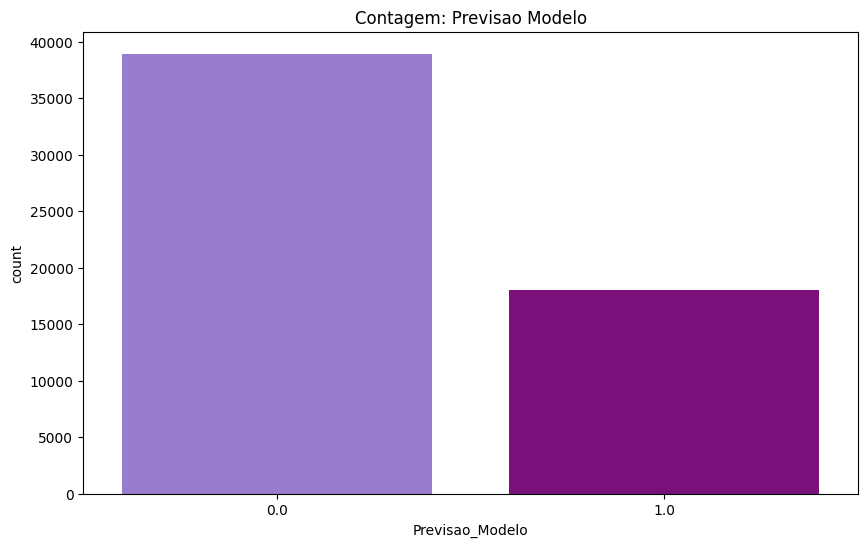

In [ ]:
#PREVISÕES:

import matplotlib.pyplot as plt
import seaborn as sns

# Definir a paleta de cores
custom_palette = ["#9370DB", "#8B008B", "#6A5ACD", "#7B68EE", "#BA55D3"]

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.countplot(df_final_previsoes, x="Previsao_Modelo", palette=custom_palette)
plt.title('Contagem: Previsao Modelo')
plt.show()



<ipython-input-112-8aa44401aeea>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentages.index, y=percentages, palette=custom_palette)
<ipython-input-112-8aa44401aeea>:15: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.barplot(x=percentages.index, y=percentages, palette=custom_palette)


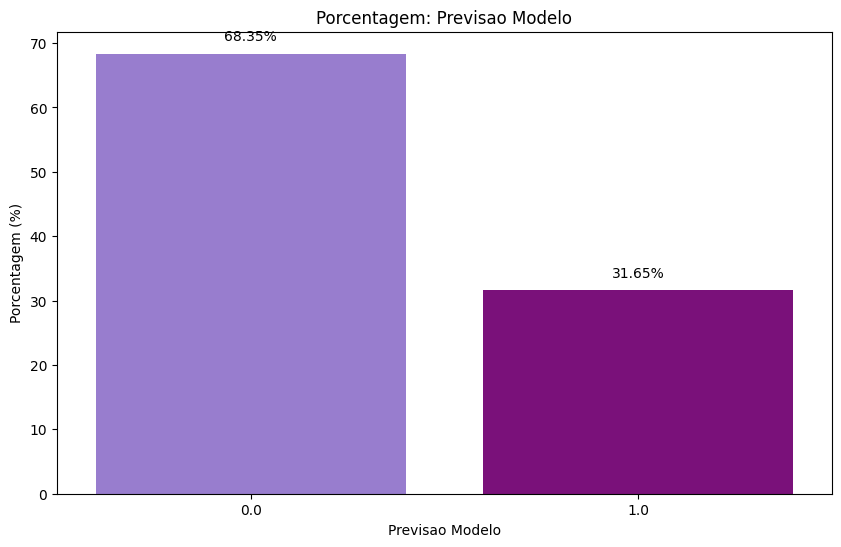

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obter as contagens de cada categoria
counts = df_final_previsoes['Previsao_Modelo'].value_counts()

# Calcular as porcentagens
percentages = (counts / counts.sum()) * 100

# Definir a paleta de cores personalizada
custom_palette = ["#9370DB", "#8B008B", "#6A5ACD", "#7B68EE", "#BA55D3"]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentages.index, y=percentages, palette=custom_palette)
ax.set_title('Porcentagem: Previsao Modelo')
ax.set_xlabel('Previsao Modelo')
ax.set_ylabel('Porcentagem (%)')

# Adicionar os valores de porcentagem acima das barras
for i, v in enumerate(percentages):
    ax.text(i, v + 2, f"{v:.2f}%", ha='center', fontsize=10)

plt.show()


<ipython-input-114-5aafbf24f6fa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_final, x="Bullying_escola_ultimos_12_meses", palette=custom_palette)
<ipython-input-114-5aafbf24f6fa>:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(df_final, x="Bullying_escola_ultimos_12_meses", palette=custom_palette)


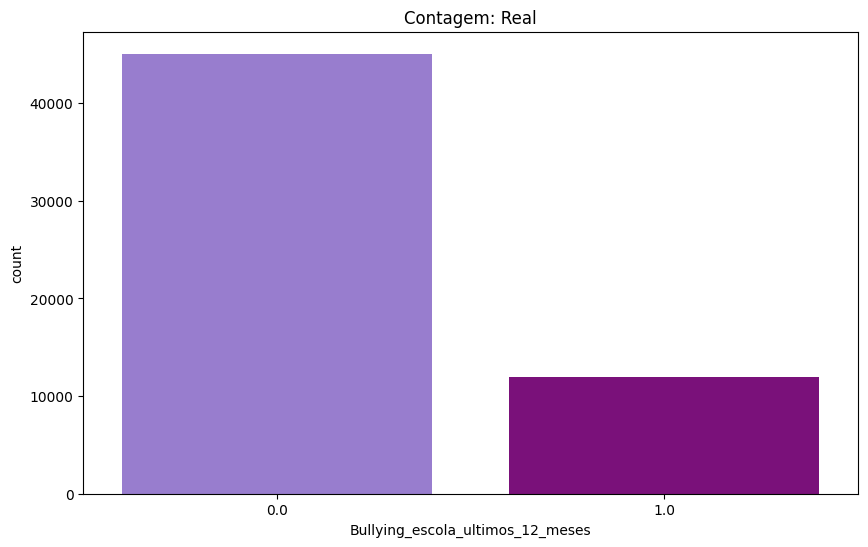

In [ ]:
#VALORES REAIS

import matplotlib.pyplot as plt
import seaborn as sns

# Definir a paleta de cores personalizada
custom_palette = ["#9370DB", "#8B008B", "#6A5ACD", "#7B68EE", "#BA55D3"]

# Criar o gráfico de contagem
plt.figure(figsize=(10, 6))
sns.countplot(df_final, x="Bullying_escola_ultimos_12_meses", palette=custom_palette)
plt.title('Contagem: Real')
plt.show()


<ipython-input-115-72cb0021684f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentages.index, y=percentages, palette=custom_palette)
<ipython-input-115-72cb0021684f>:15: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.barplot(x=percentages.index, y=percentages, palette=custom_palette)


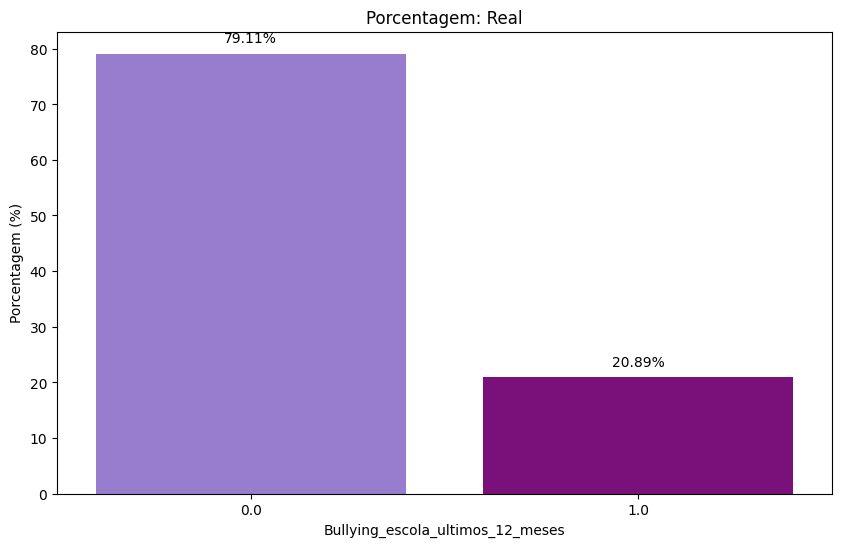

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obter as contagens de cada categoria
counts = df_final['Bullying_escola_ultimos_12_meses'].value_counts()

# Calcular as porcentagens
percentages = (counts / counts.sum()) * 100

# Definir a paleta de cores personalizada
custom_palette = ["#9370DB", "#8B008B", "#6A5ACD", "#7B68EE", "#BA55D3"]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentages.index, y=percentages, palette=custom_palette)
ax.set_title('Porcentagem: Real')
ax.set_xlabel('Bullying_escola_ultimos_12_meses')
ax.set_ylabel('Porcentagem (%)')

# Adicionar os valores de porcentagem acima das barras
for i, v in enumerate(percentages):
    ax.text(i, v + 2, f"{v:.2f}%", ha='center', fontsize=10)

plt.show()


É possível perceber pela diferença percentual pequena que o modelo apresentou uma boa performance nas previsões.

Exportando dataframe com as previsões:

In [ ]:
# Exportar o dataframe final previsões em formato CSV
df_final_previsoes.to_csv('df_final_previsoes.csv', index=False)

# ✔️ Conclusão

O bullying, em sua essência, é caracterizado por atos repetidos de violência física ou psicológica, praticados por um ou mais indivíduos contra outra pessoa, que se encontra em situação de vulnerabilidade. Já o cyberbullying potencializa essas agressões ao utilizarem as tecnologias, como redes sociais e e-mails.

Alunos que sofrem bullying podem apresentar queda no desempenho escolar, isolamento social, baixa autoestima e até mesmo sintomas de ansiedade e depressão. No caso do cyberbullying, o sofrimento ultrapassa as barreiras físicas da escola e invade os espaços pessoais, transformando o lar, que deveria ser um refúgio, em mais um cenário de dor.

Prevenir e combater o bullying é uma responsabilidade coletiva. Precisa ser criado um ambiente escolar onde o respeito, a empatia e a inclusão sejam valores cultivados diariamente. Para realizar, primeiramente, é necessário a conscientização. Os alunos devem compreender que palavras e ações têm impacto, e que todos nós somos diferentes, mas igualmente merecedores de respeito. Para os professores e gestores escolares, é essencial implementar programas de prevenção, identificar sinais de bullying e intervir rapidamente quando ele ocorre.

Quanto ao cyberbullying, educar as crianças e adolescentes sobre o uso consciente das tecnologias é fundamental. Ensinar boas práticas online, como não compartilhar conteúdo ofensivo e proteger a privacidade, ajuda a criar uma cultura digital mais segura. E, claro, é imprescindível que as famílias estejam atentas ao que seus filhos fazem e enfrentam no mundo virtual.

Mas não podemos nos esquecer de uma lição essencial: ouvir. Dar voz às vítimas, oferecer apoio e criar espaços para que elas se sintam seguras para compartilhar suas experiências é um passo crucial. Além disso, é importante lembrar que quem pratica bullying também precisa de intervenção e orientação, pois muitas vezes essas atitudes são reflexo de problemas pessoais ou sociais.

